In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('project_till_knn.xlsx')

In [4]:
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [5]:
df

Unnamed: 0  index       Revenue  Revenue Growth  Cost of Revenue  \
0               0      0  7.440100e+10         -0.0713     3.903000e+10   
1               1      1  3.734148e+09          1.1737     2.805625e+09   
2               2      2  9.837500e+10          0.0182     7.813800e+10   
3               3      3  2.552641e+10          0.0053     1.820268e+10   
4               4      4  1.790960e+10          0.0076     1.153980e+10   
...           ...    ...           ...             ...              ...   
22059       22059  22059  0.000000e+00          0.0000     0.000000e+00   
22060       22060  22060  5.560000e+05         -0.4110     0.000000e+00   
22061       22061  22061  5.488438e+07          0.2210     3.659379e+07   
22062       22062  22062  0.000000e+00          0.0000     0.000000e+00   
22063       22063  22063  5.301900e+07          0.0243     0.000000e+00   

       Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
0      3.537100e+10  0.000000e+00  2.146100e+10        2.146100e+10   
1      9.285226e+08  1.083303e+08  3.441414e+08        7.939267e+08   
2      2.023700e+10  0.000000e+00  1.519600e+10        1.751200e+10   
3      7.323734e+09  0.000000e+00  6.561162e+09        6.586482e+09   
4      6.369800e+09  0.000000e+00  3.474300e+09        3.412400e+09   
...             ...           ...           ...                 ...   
22059  0.000000e+00  0.000000e+00  3.755251e+06        3.755251e+06   
22060  5.560000e+05  4.759000e+06  5.071000e+06        9.830000e+06   
22061  1.829059e+07  1.652633e+06  7.020320e+06        8.672953e+06   
22062  0.000000e+00  1.031715e+07  4.521349e+06        1.664863e+07   
22063  5.301900e+07  5.668400e+07  2.945700e+07        8.614600e+07   

       Operating Income  Interest Expense  Earnings before Tax  \
0          1.391000e+10      7.090000e+08         1.449400e+10   
1          1.345959e+08      1.214869e+07         1.753823e+08   
2          2.725000e+09      4.430000e+08         2.270000e+09   
3          7.372520e+08      4.245910e+08         2.502180e+08   
4          2.957400e+09      3.024000e+08         2.707700e+09   
...                 ...               ...                  ...   
22059     -3.755251e+06      1.105849e+07        -1.482451e+07   
22060     -9.274000e+06      0.000000e+00        -9.170000e+06   
22061      9.617636e+06      1.239170e+06         8.416324e+06   
22062     -1.664863e+07      0.000000e+00        -1.664769e+07   
22063     -3.312700e+07      1.660000e+05        -3.438500e+07   

       Income Tax Expense  Net Income - Non-Controlling int  \
0            2.851000e+09                      1.420000e+08   
1            3.955957e+07                     -1.431918e+07   
2            7.510000e+08                      1.200000e+07   
3            8.040000e+05                      0.000000e+00   
4            8.833000e+08                      3.690000e+07   
...                   ...                               ...   
22059       -1.108025e+06                      0.000000e+00   
22060        0.000000e+00                      0.000000e+00   
22061        1.398210e+06                      8.494300e+04   
22062        0.000000e+00                      0.000000e+00   
22063        2.171000e+06                      0.000000e+00   

       Net Income - Discontinued ops    Net Income  Preferred Dividends  \
0                      -1.127000e+09  1.164300e+10                  0.0   
1                       0.000000e+00  1.358227e+08                  0.0   
2                       0.000000e+00  1.519000e+09                  0.0   
3                       0.000000e+00  2.494140e+08           33998000.0   
4                       0.000000e+00  1.824400e+09                  0.0   
...                              ...           ...                  ...   
22059                   0.000000e+00 -1.371648e+07                  0.0   
22060                   0.000000e+00 -9.170000e+06                  0.0   
22061                   0.00

In [87]:
df = df.drop('index',1)  

In [88]:
df = df.drop('Unnamed: 0',1)
# index

In [89]:

company = df['Unnamed: 0.1']

In [90]:
df = df.drop('Unnamed: 0.1',1)

### outlier treatment

In [17]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP

In [91]:
import warnings
warnings.simplefilter("ignore")

In [58]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

In [93]:
sector = df['Sector']

In [94]:
df = df.drop('Sector',1)

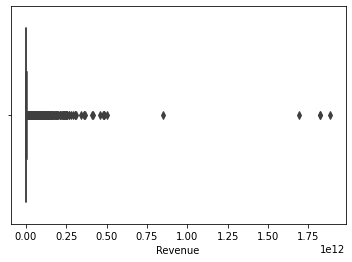

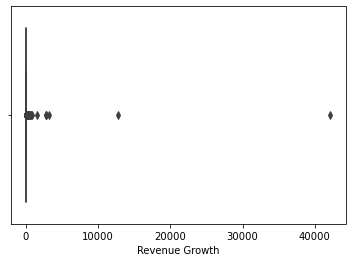

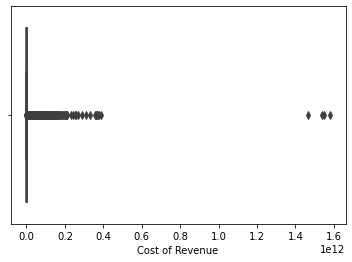

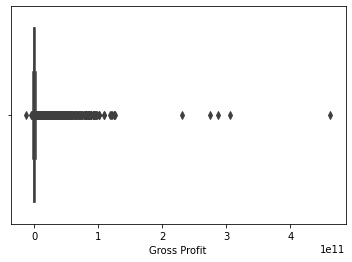

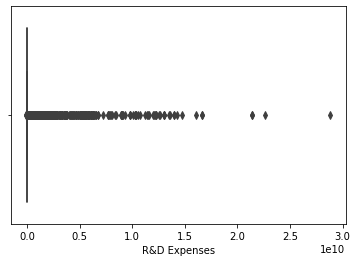

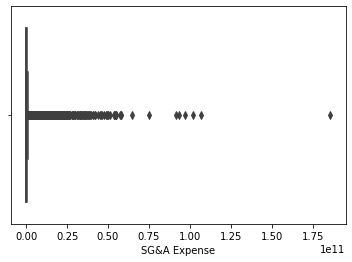

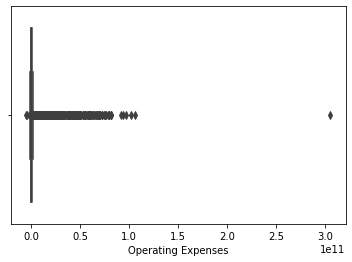

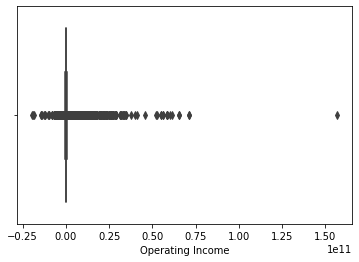

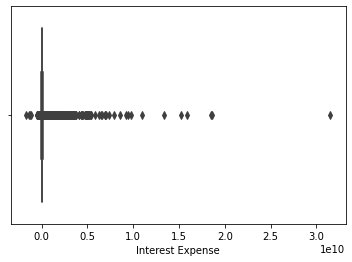

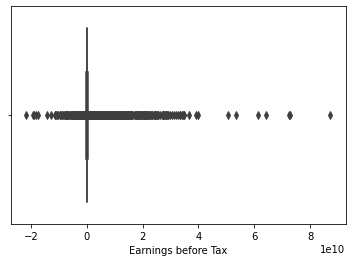

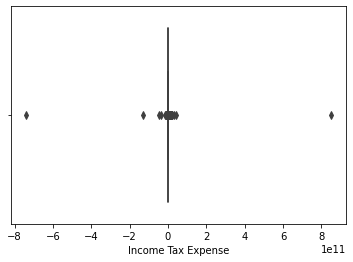

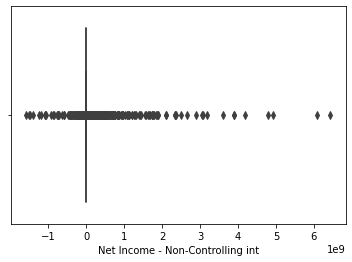

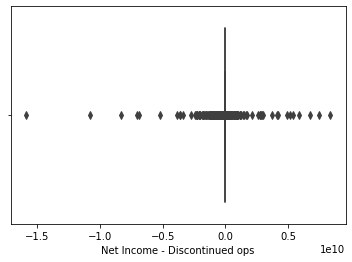

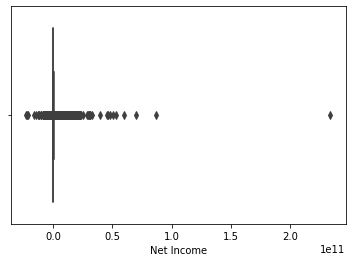

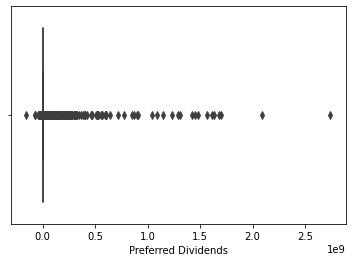

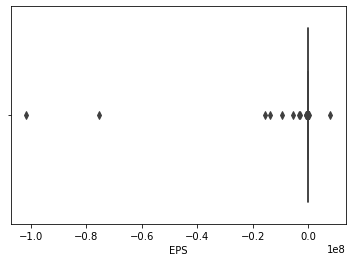

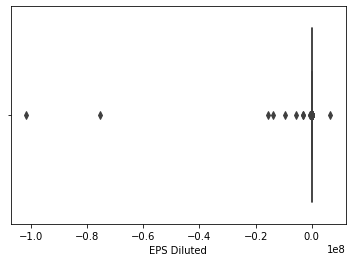

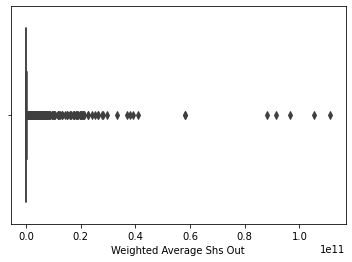

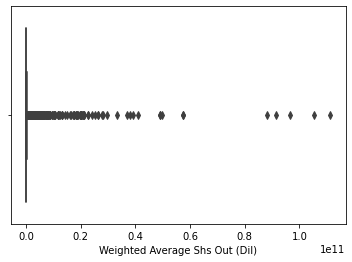

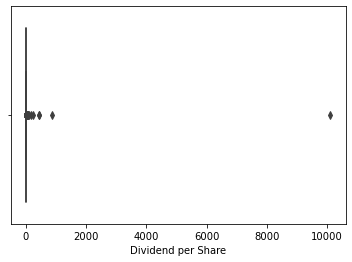

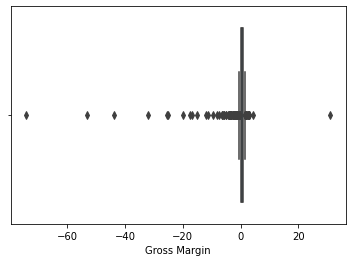

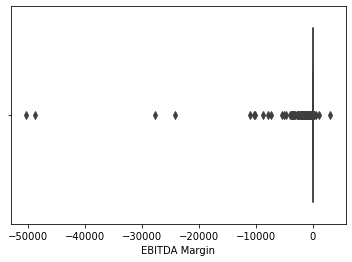

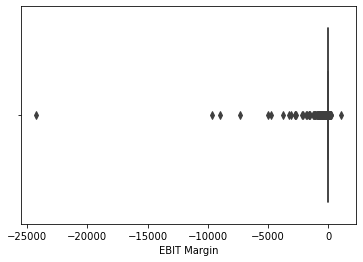

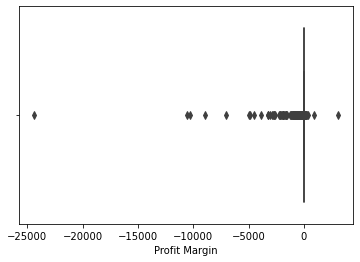

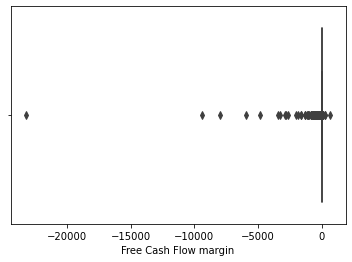

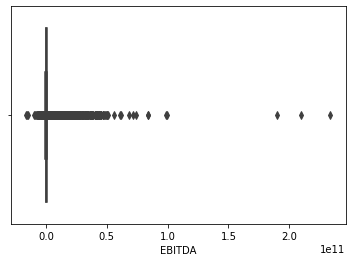

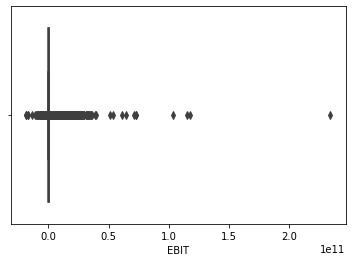

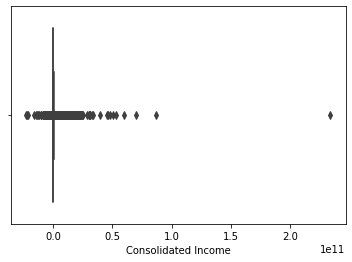

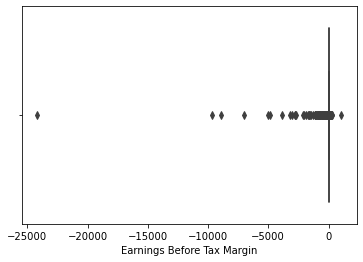

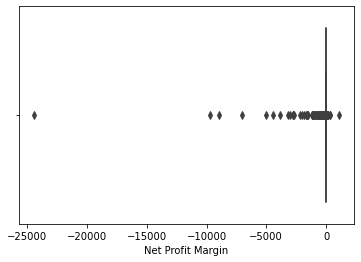

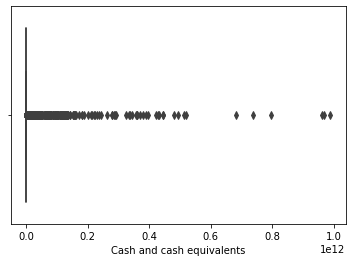

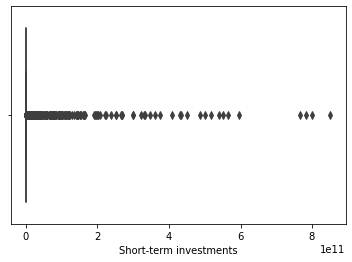

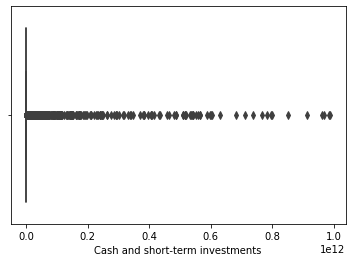

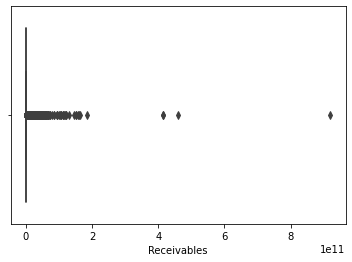

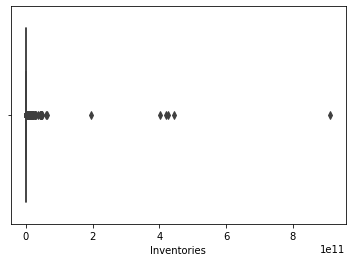

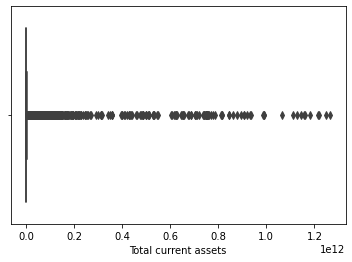

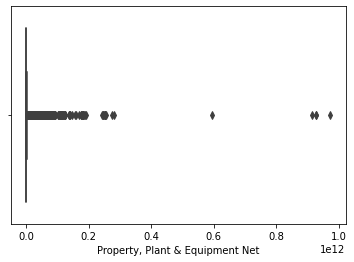

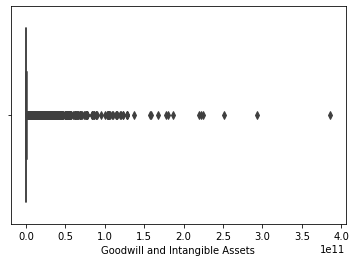

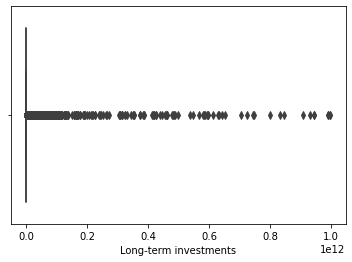

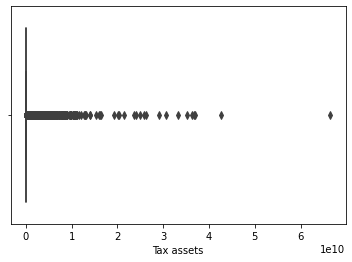

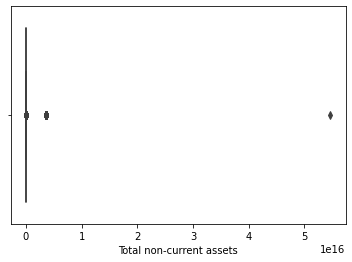

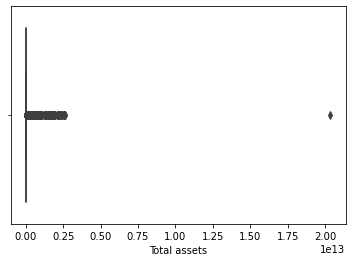

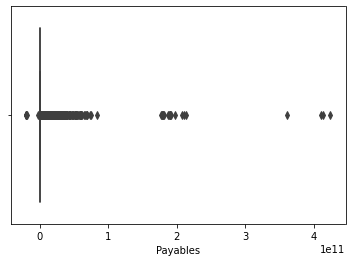

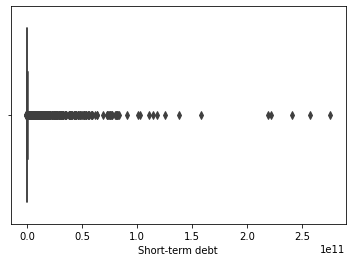

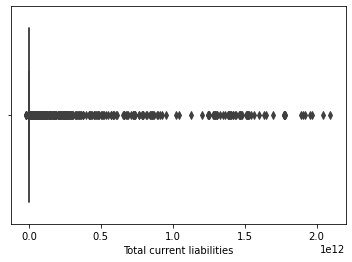

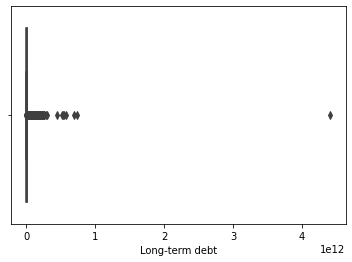

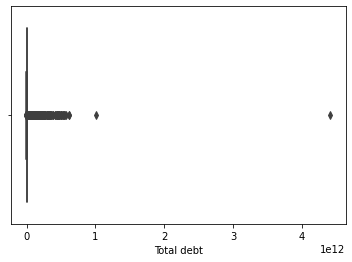

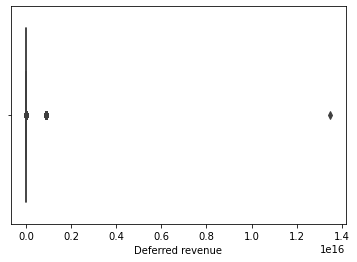

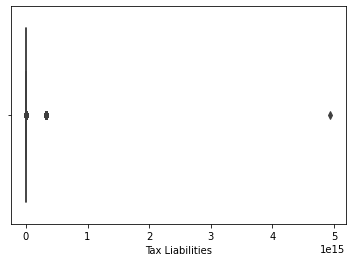

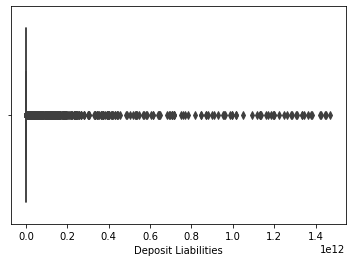

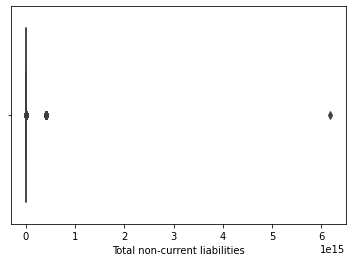

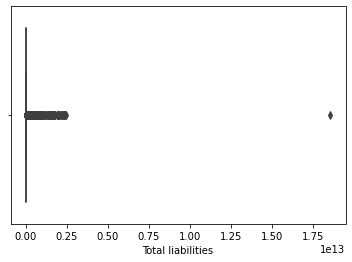

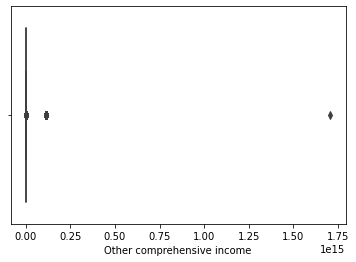

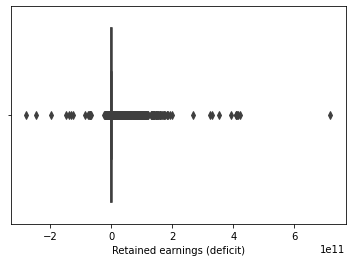

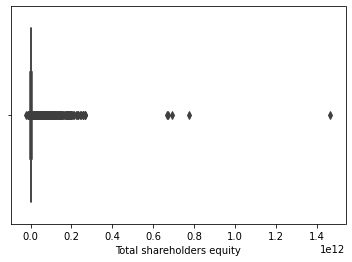

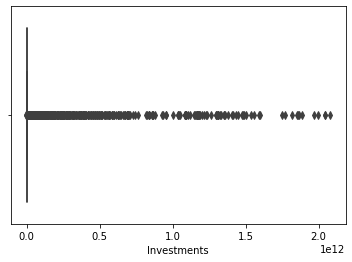

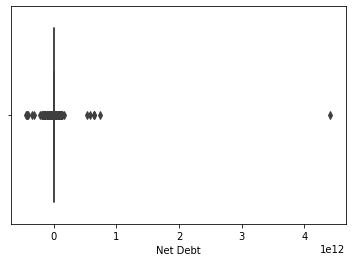

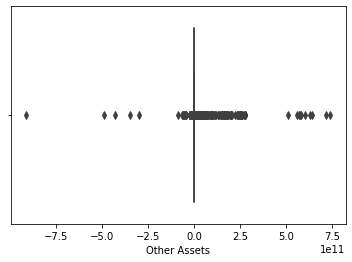

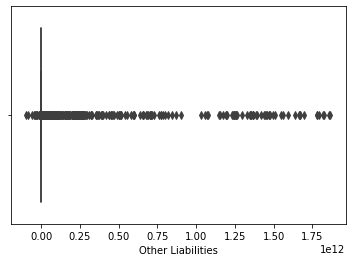

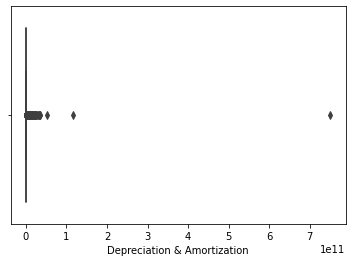

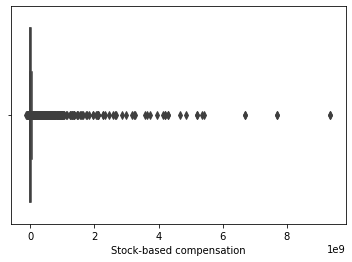

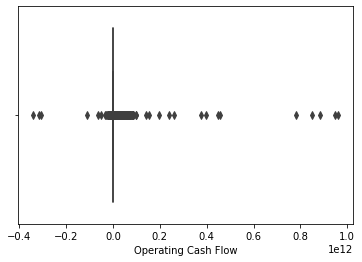

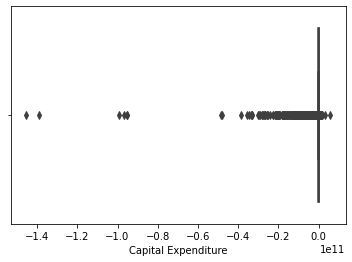

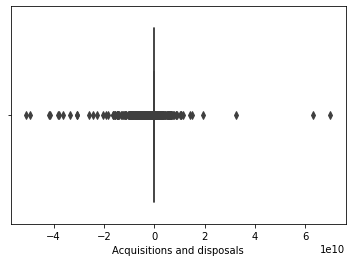

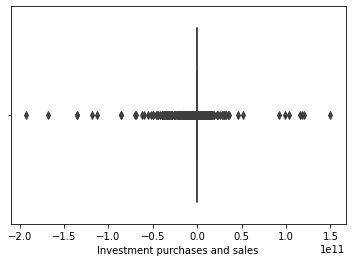

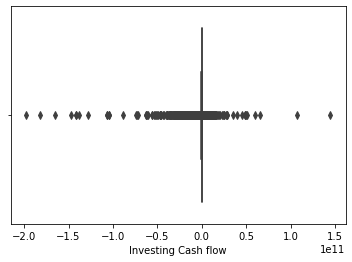

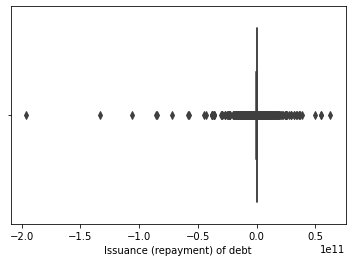

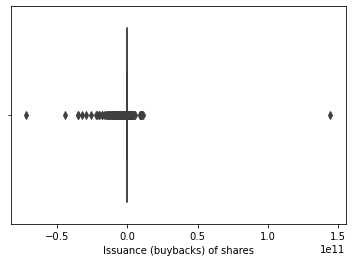

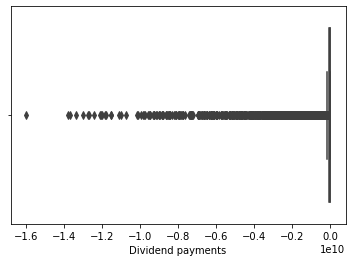

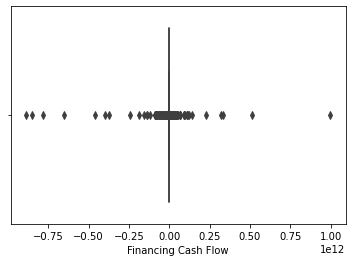

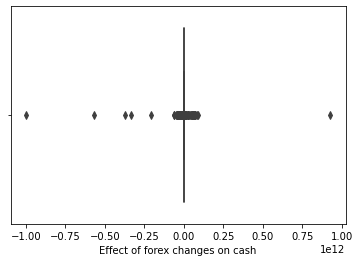

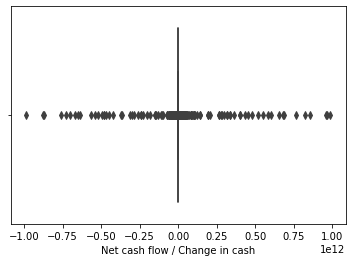

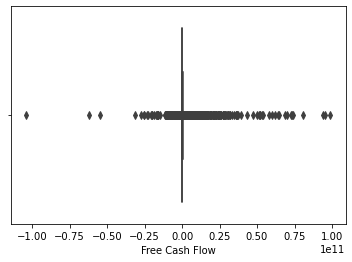

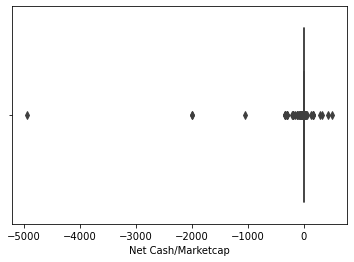

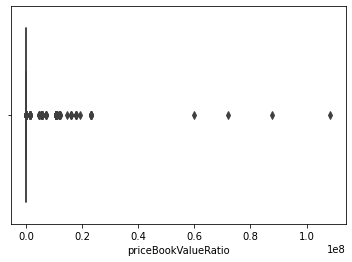

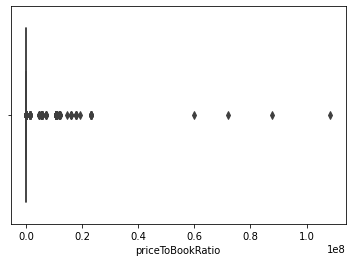

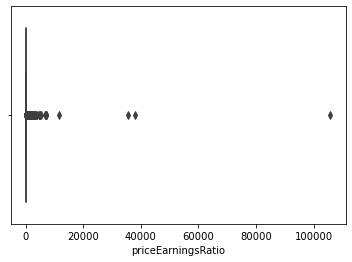

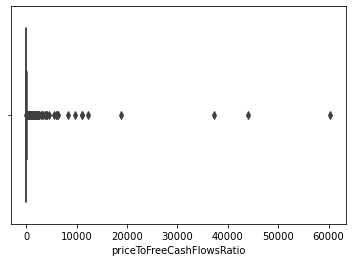

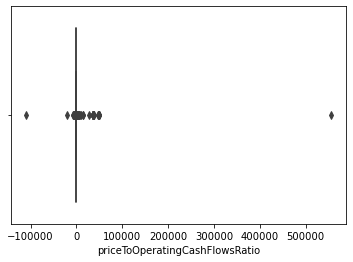

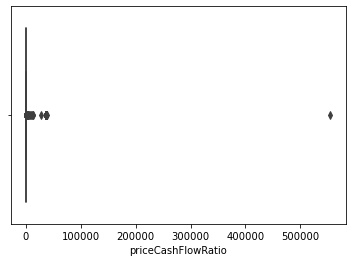

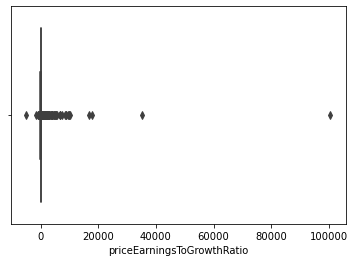

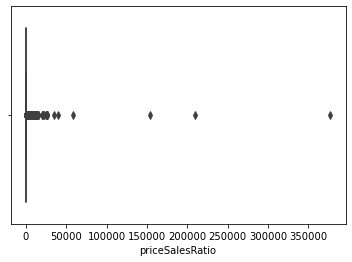

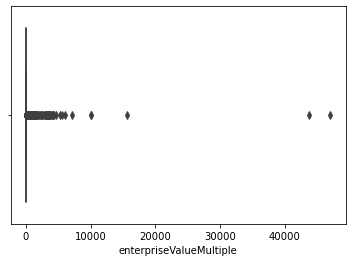

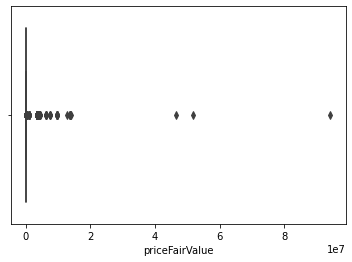

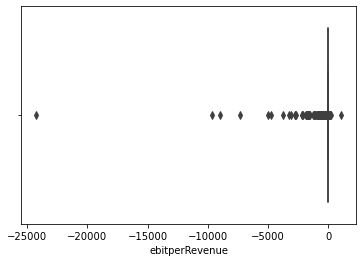

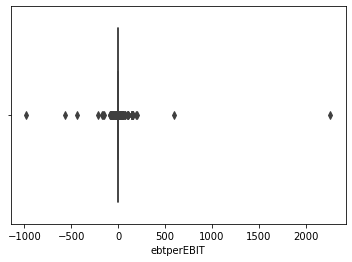

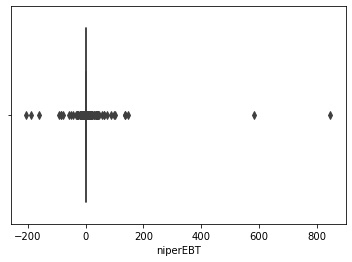

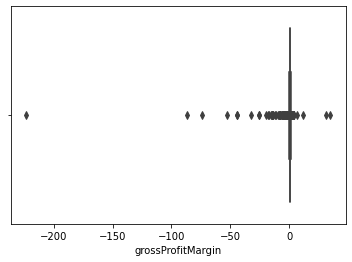

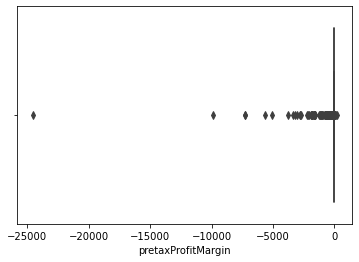

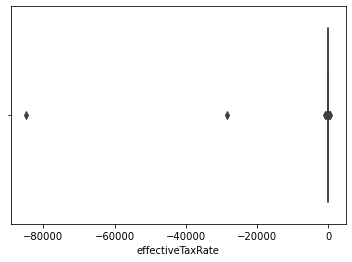

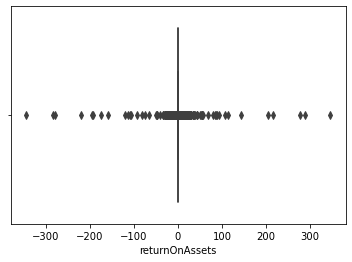

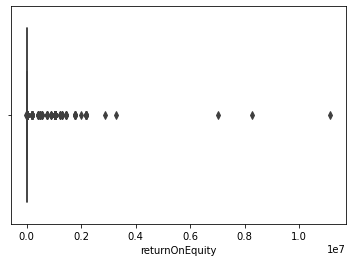

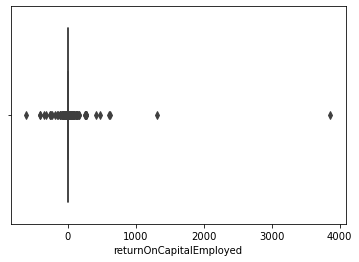

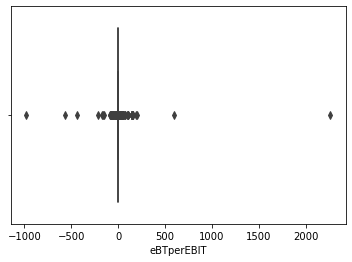

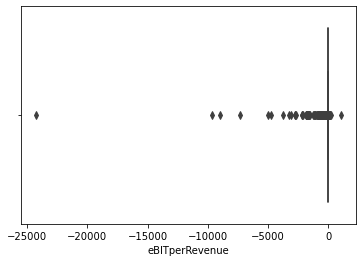

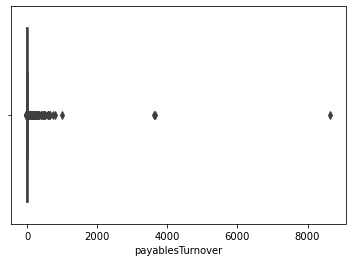

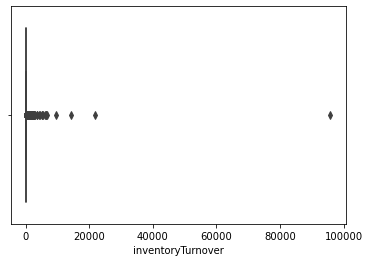

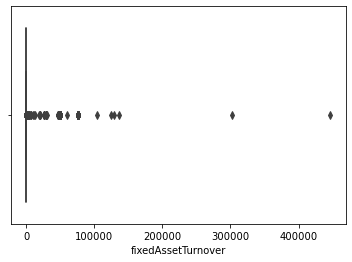

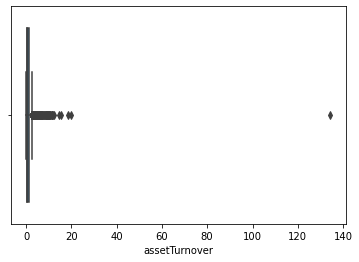

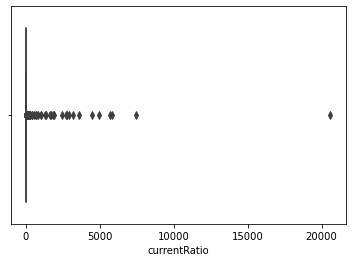

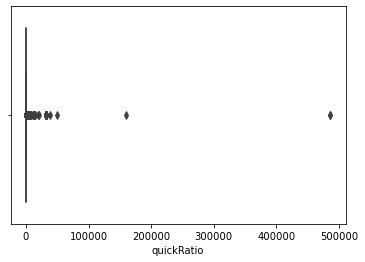

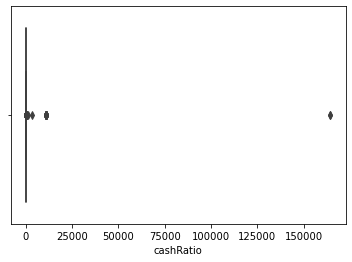

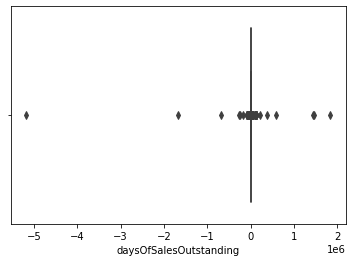

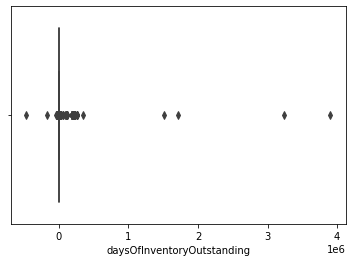

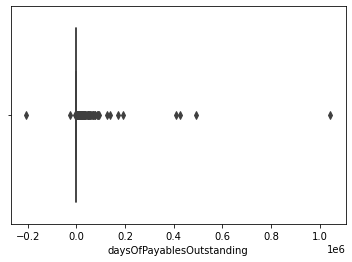

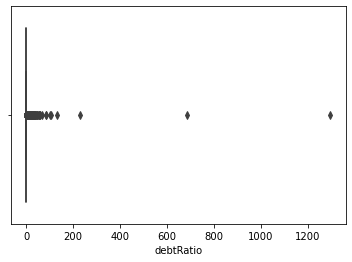

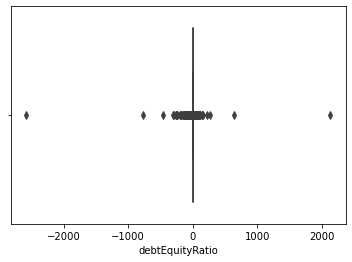

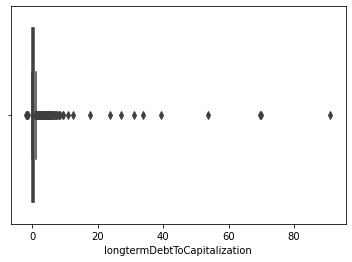

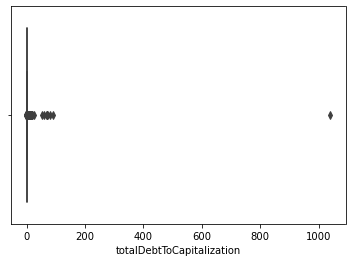

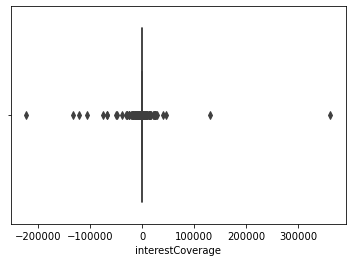

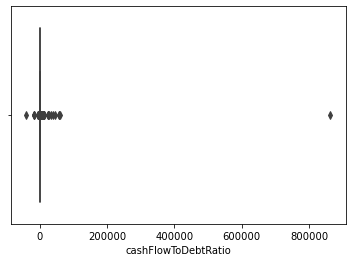

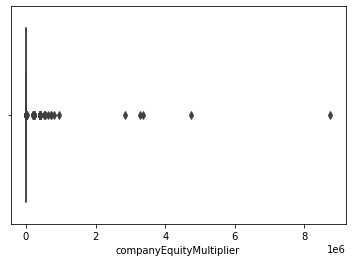

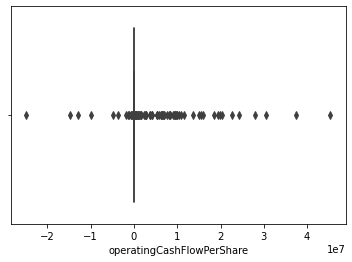

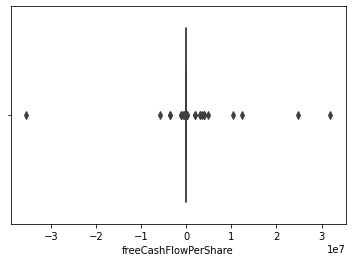

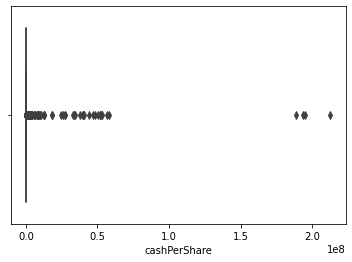

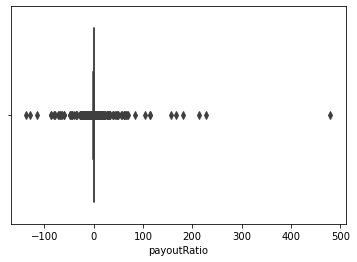

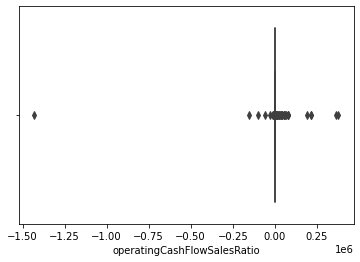

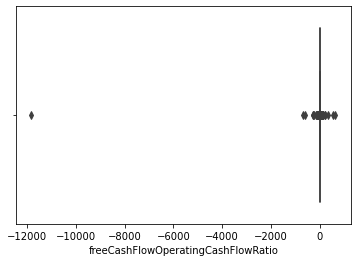

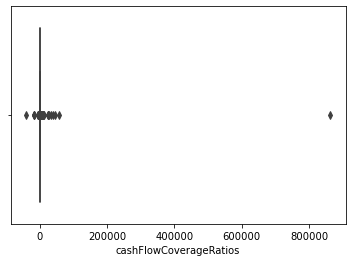

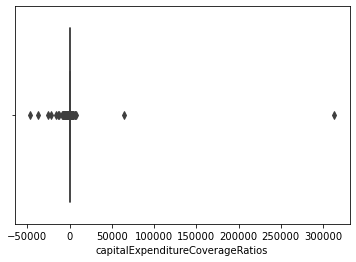

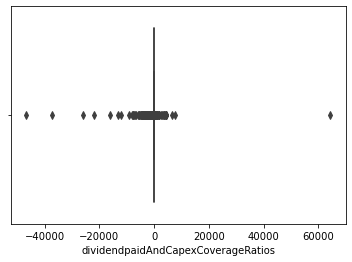

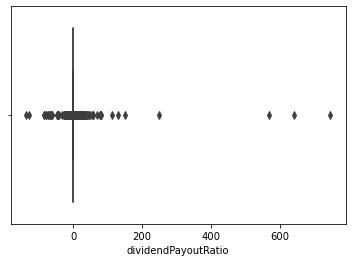

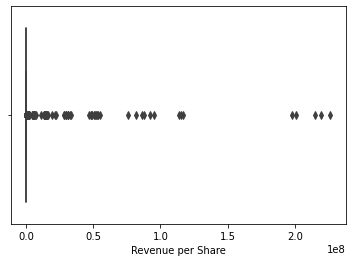

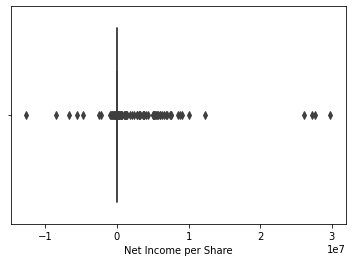

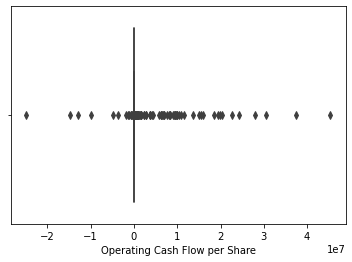

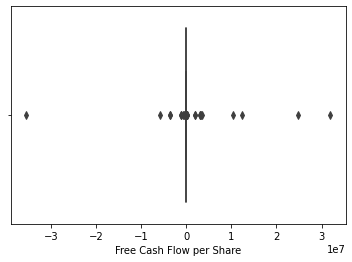

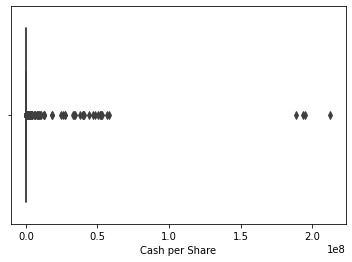

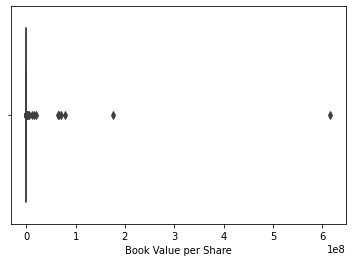

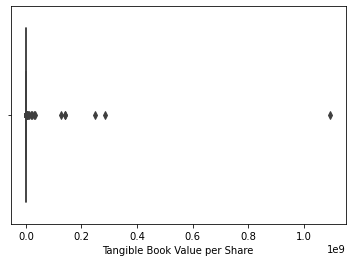

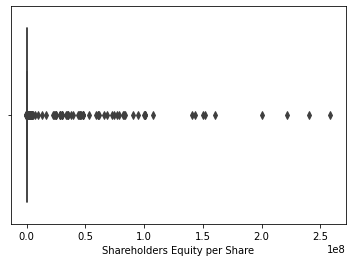

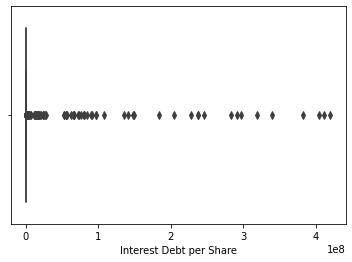

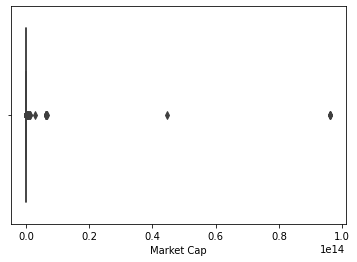

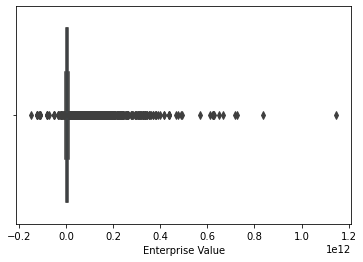

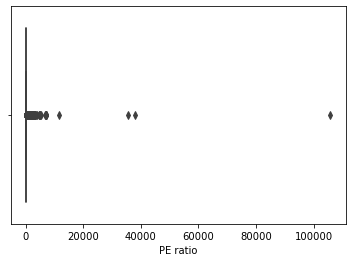

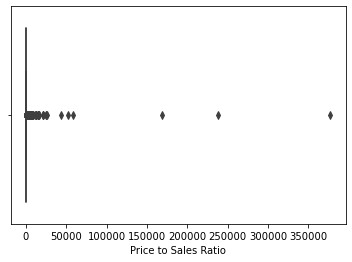

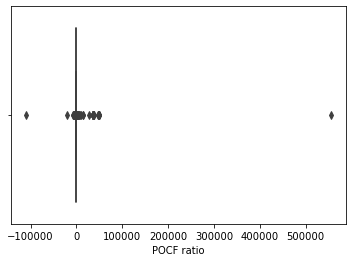

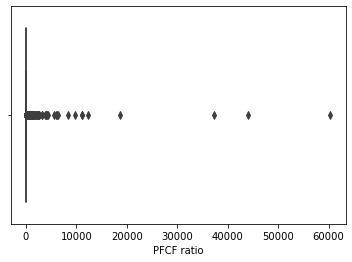

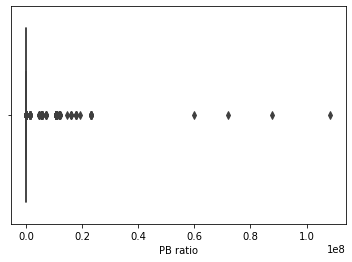

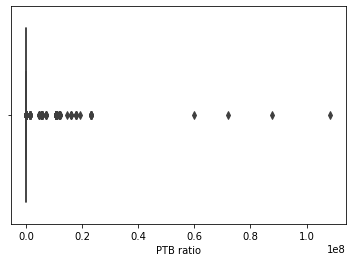

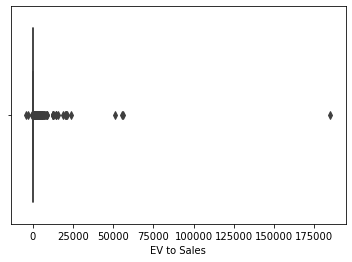

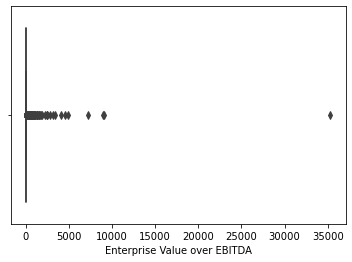

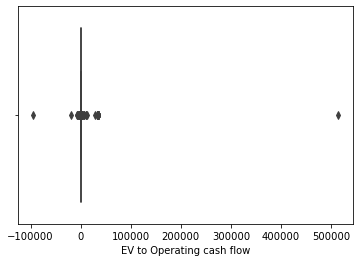

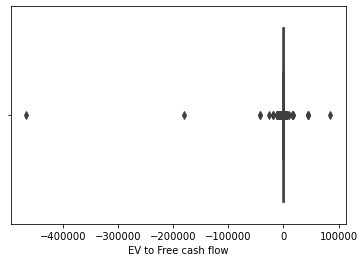

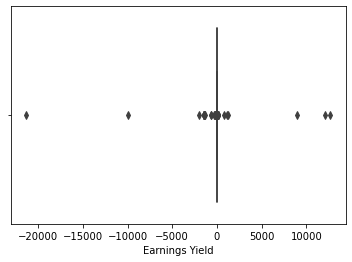

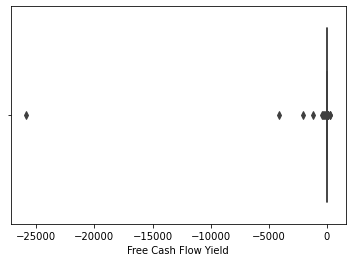

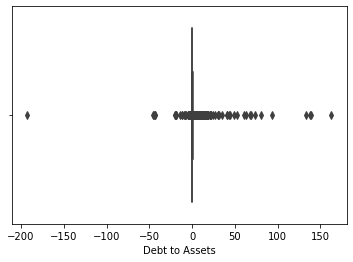

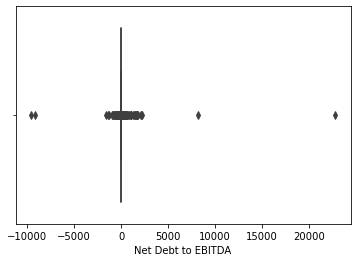

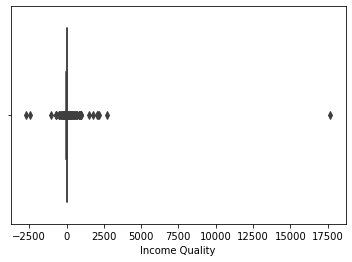

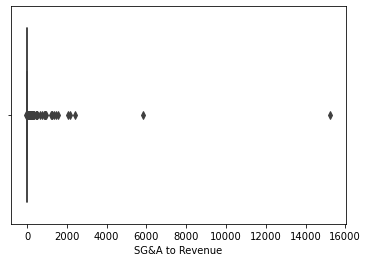

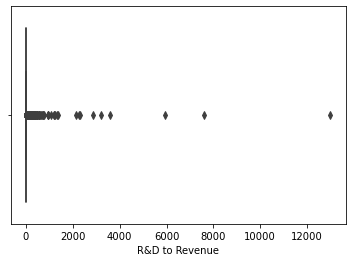

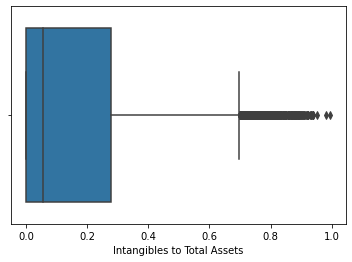

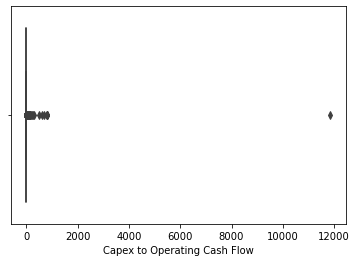

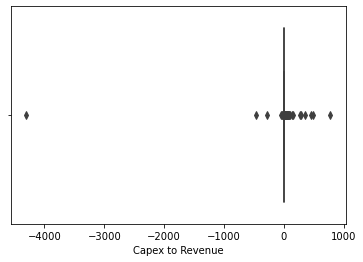

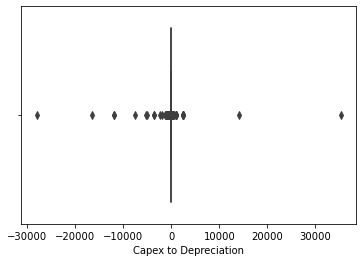

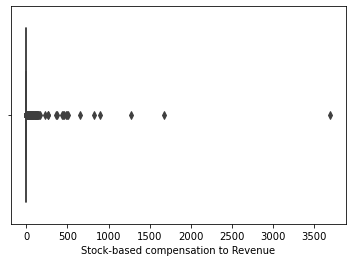

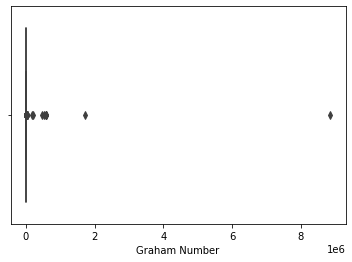

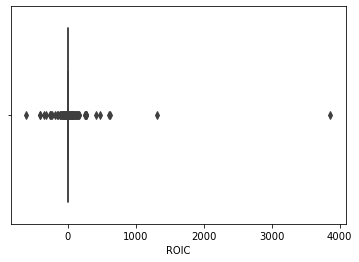

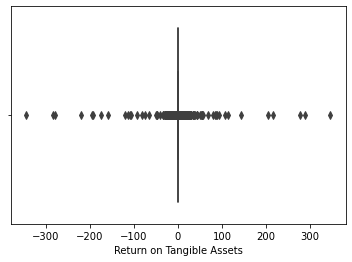

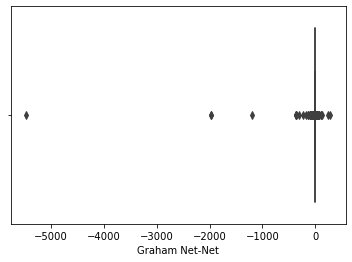

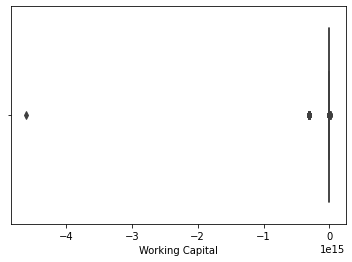

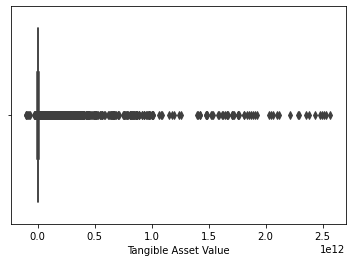

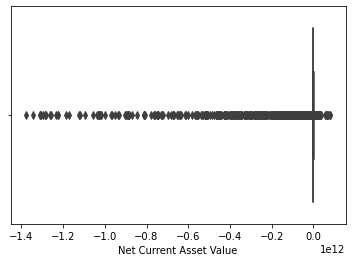

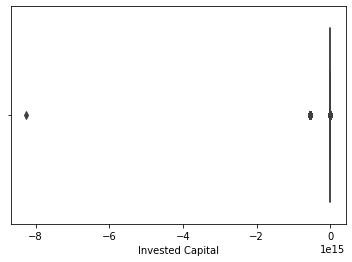

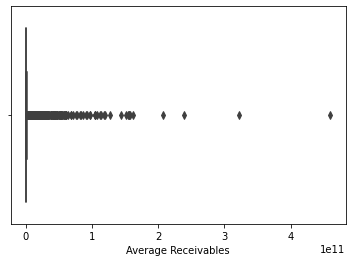

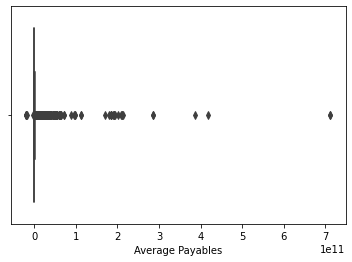

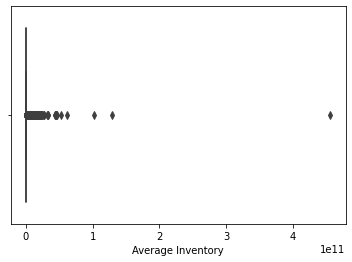

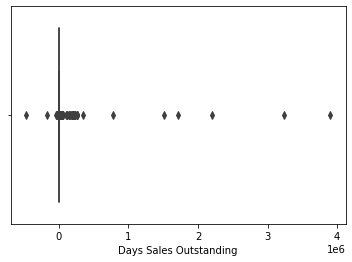

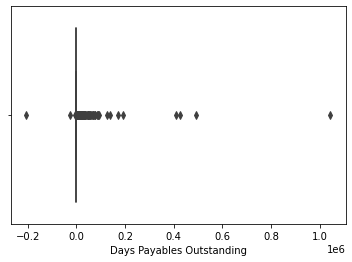

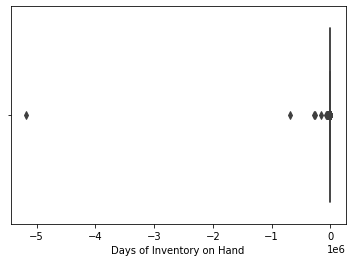

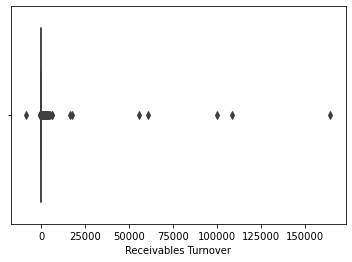

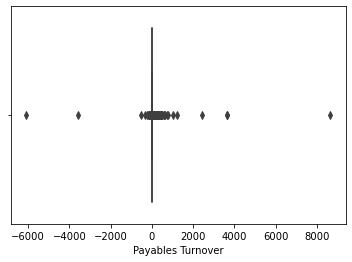

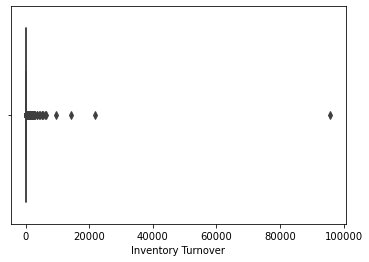

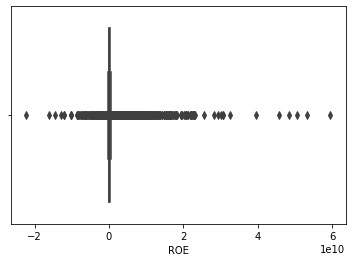

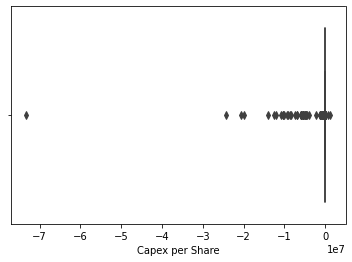

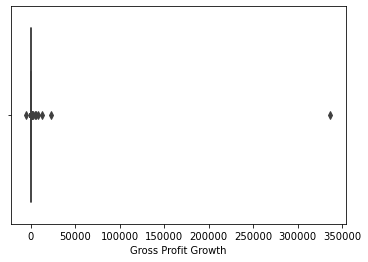

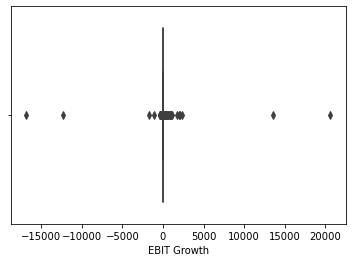

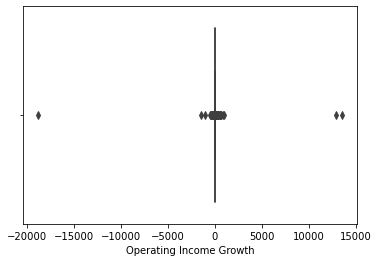

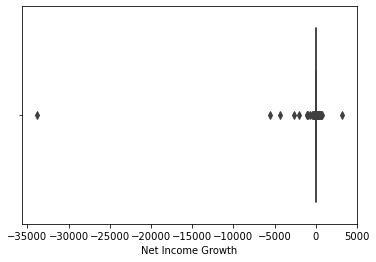

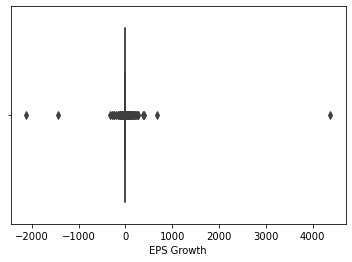

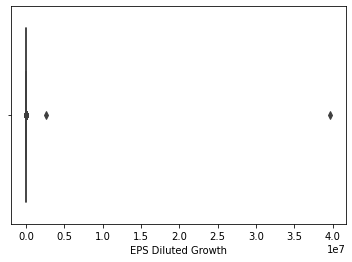

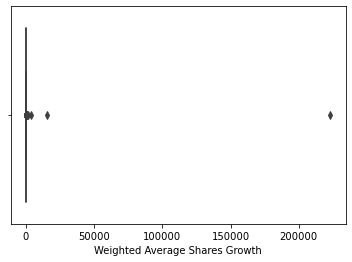

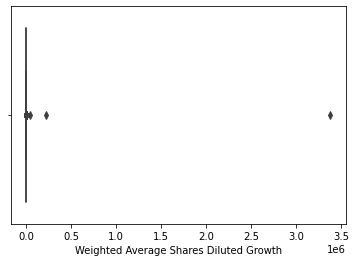

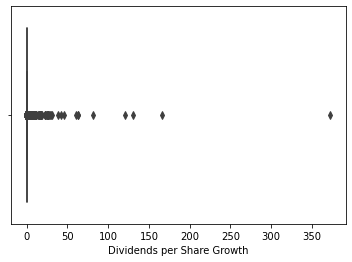

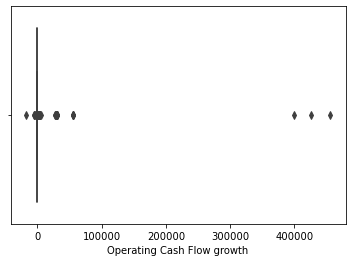

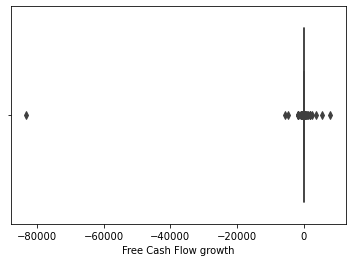

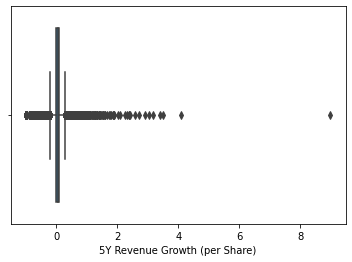

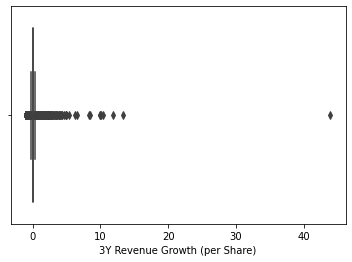

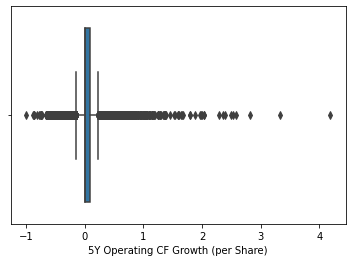

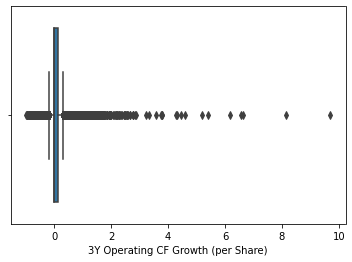

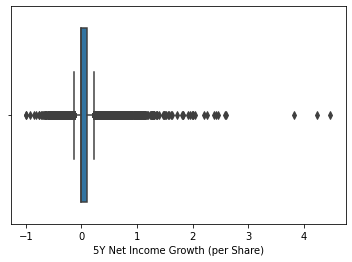

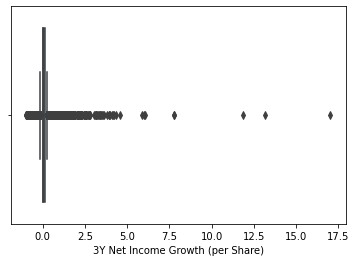

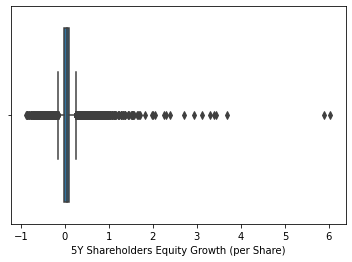

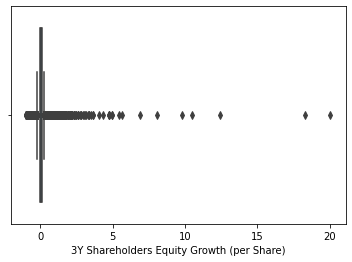

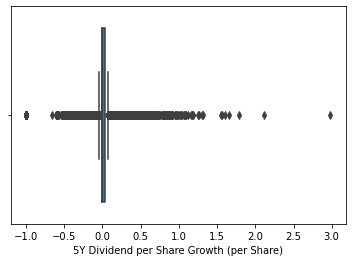

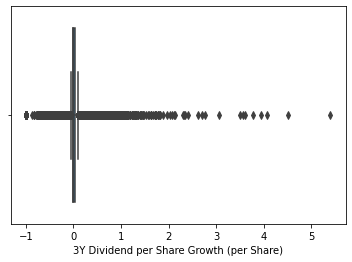

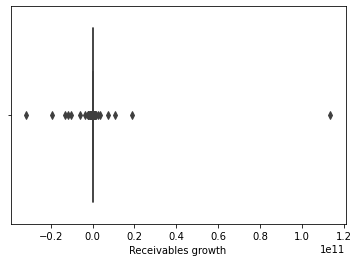

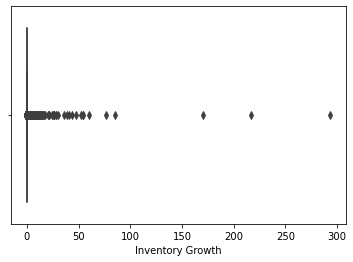

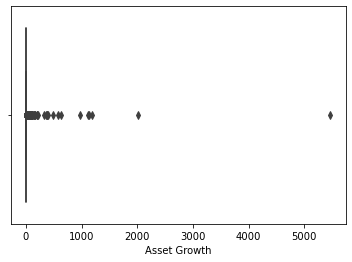

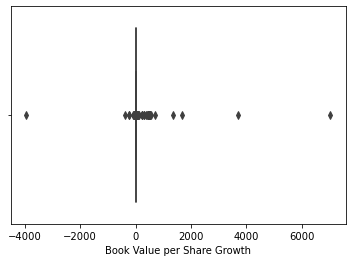

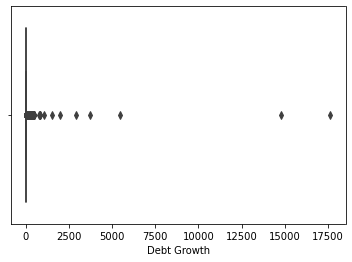

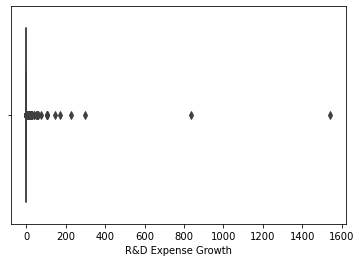

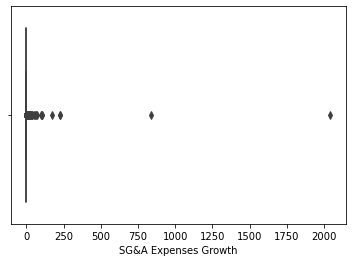

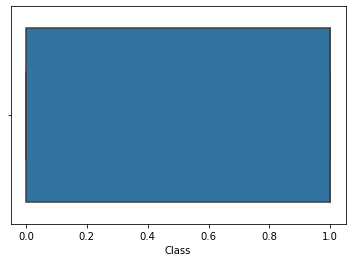

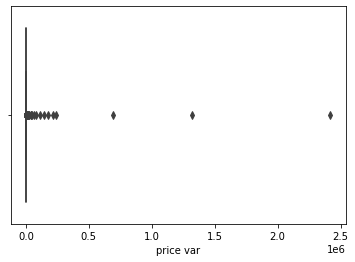

In [50]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
### power transformation

In [95]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(df)
df2 = pd.DataFrame(x,columns=df.columns)
df2

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  R&D Expenses  \
0      2.850051       -0.193690         1.757160      3.855588     -0.130069   
1      0.005840        0.683636         0.021020     -0.114396      0.102615   
2      3.660367       -0.104988         3.376190      2.198334     -0.130069   
3      1.023215       -0.117380         0.816128      0.703247     -0.130069   
4      0.697871       -0.115161         0.490842      0.587120     -0.130069   
...         ...             ...              ...           ...           ...   
22059 -0.252540       -0.122509        -0.169613     -0.256882     -0.130069   
22060 -0.252369       -0.587381        -0.169613     -0.256731     -0.113350   
22061 -0.244782        0.074542        -0.165404     -0.253095     -0.123211   
22062 -0.252540       -0.122509        -0.169613     -0.256882     -0.097980   
22063 -0.245002       -0.099174        -0.169613     -0.246761      0.004755   

       SG&A Expense  Operating Expenses  Operating Income  Interest Expense  \
0          5.567222            3.655772          3.763703          1.255813   
1         -0.110574           -0.084300         -0.119494         -0.178492   
2          4.107876            2.985601          0.649725          0.732351   
3          1.897699            1.052452          0.066222          0.695512   
4          0.997264            0.450643          0.716648          0.448252   
...             ...                 ...               ...               ...   
22059     -0.297538           -0.272471         -0.167782         -0.181214   
22060     -0.296255           -0.270508         -0.173533         -0.210719   
22061     -0.294454           -0.270872         -0.160579         -0.206939   
22062     -0.296783           -0.268425         -0.181406         -0.210719   
22063     -0.277070           -0.249257         -0.199393         -0.210146   

       Earnings before Tax  ...  3Y Dividend per Share Growth (per Share)  \
0                 4.809041  ...                                  0.278720   
1                -0.075227  ...                                  0.504933   
2                 0.674515  ...                                  0.640234   
3                -0.047205  ...                                 -0.032850   
4                 0.827293  ...                                  0.440367   
...                    ...  ...                                       ...   
22059            -0.158117  ...                                 -0.032850   
22060            -0.152297  ...                                 -0.032850   
22061            -0.139632  ...                                 -0.032850   
22062            -0.160008  ...                                 -0.312513   
22063            -0.178655  ...                                 -0.032850   

       Receivables growth  Inventory Growth  Asset Growth  \
0                0.005812         -0.143416     -0.098411   
1                0.005812          0.148389      0.232673   
2                0.005812          0.263056      0.338018   
3                0.005812         -0.253688     -0.285709   
4                0.005812         -0.032667     -0.145817   
...                   ...               ...           ...   
22059            0.005812         -0.064631     -0.403713   
22060            0.005812         -0.064631     -1.211156   
22061            0.005812          1.740049      0.482828   
22062            0.005812         -0.064631      0.255999   
22063            0.005812         -0.064631      1.439252   

       Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                        -0.067388     0.176958           -0.129421   
1                        -0.060936     0.445065            2.772840   
2                        -0.063023     0.406739           -0.129421   
3                        -0.064943    -0.140531           -0.129421   
4                        -0.067451     0.142567           -0.129421   
...           

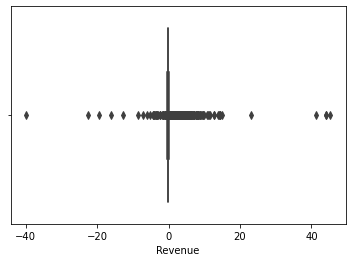

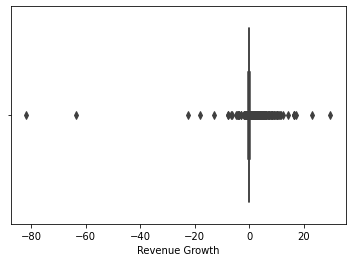

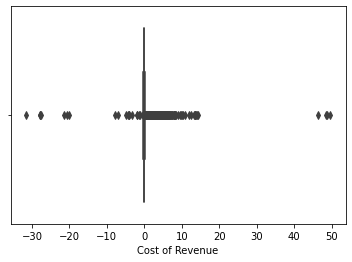

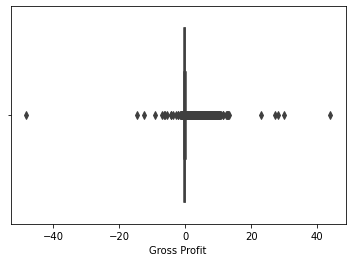

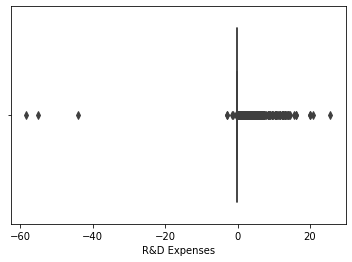

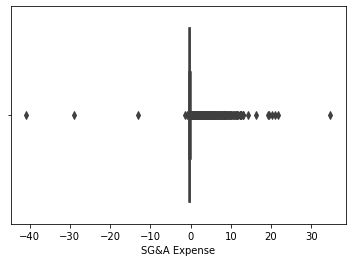

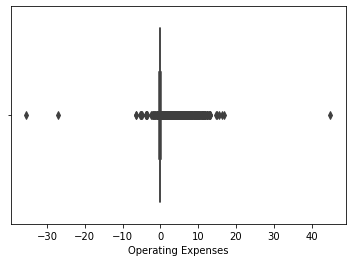

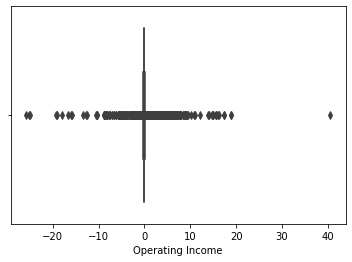

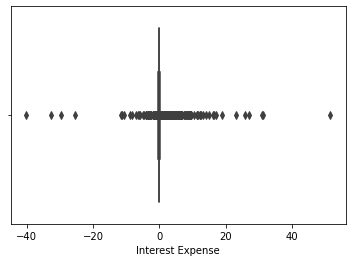

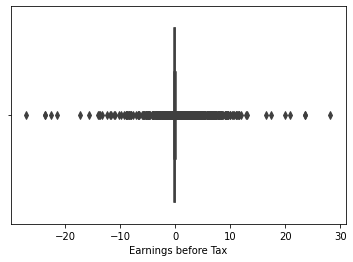

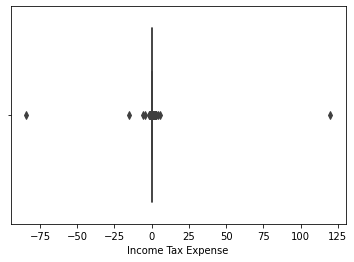

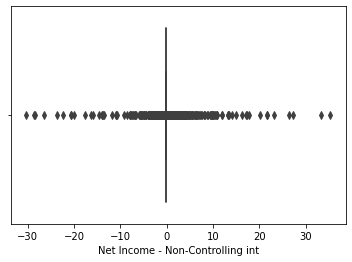

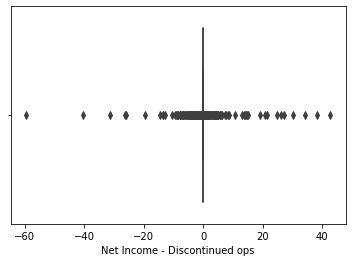

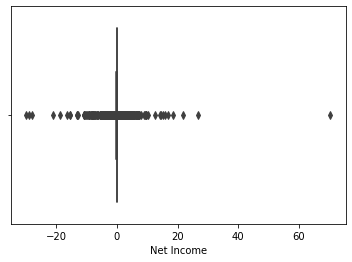

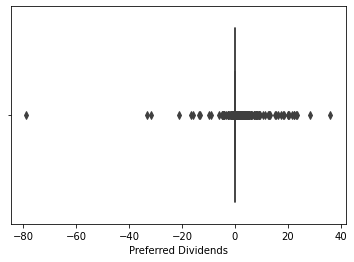

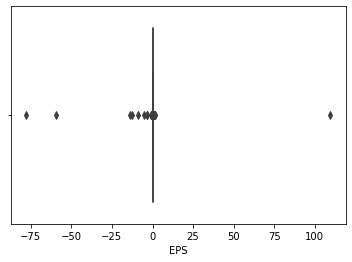

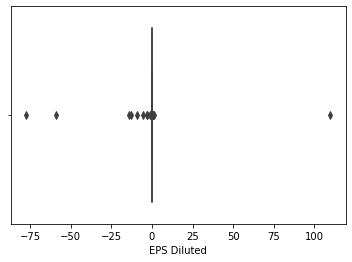

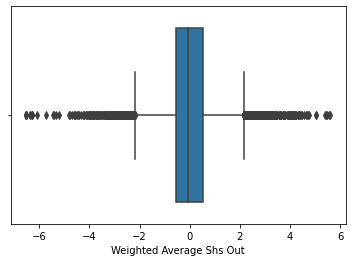

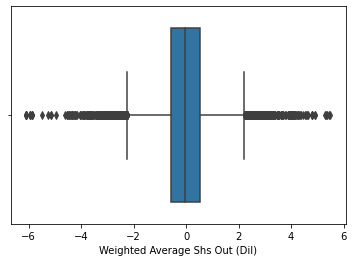

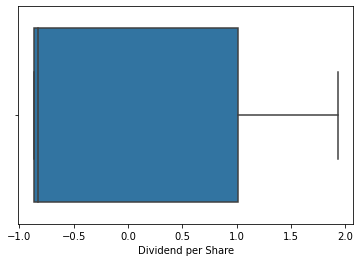

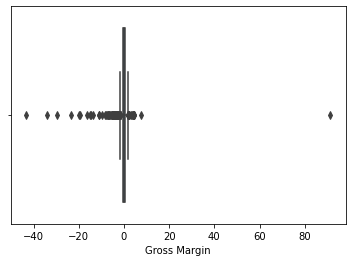

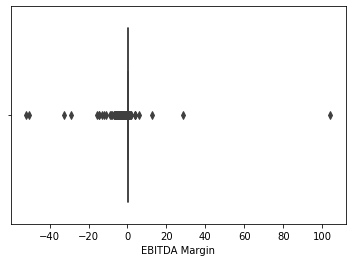

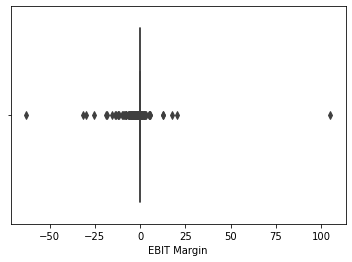

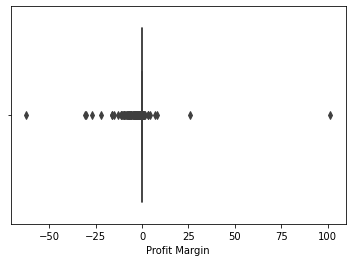

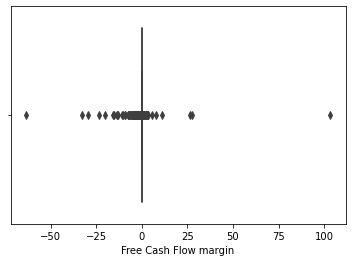

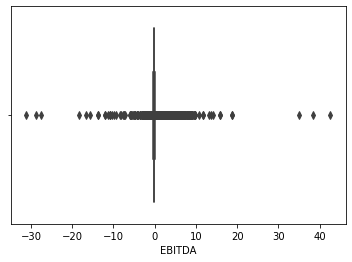

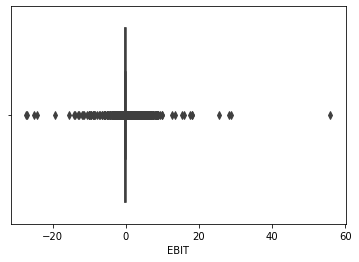

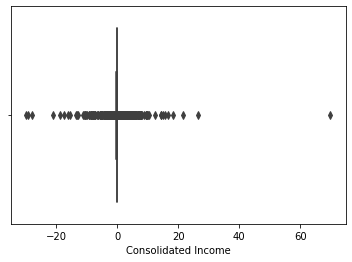

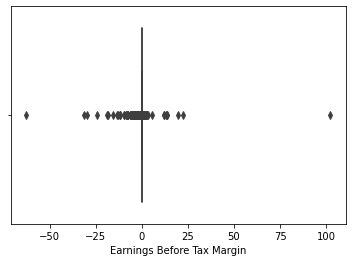

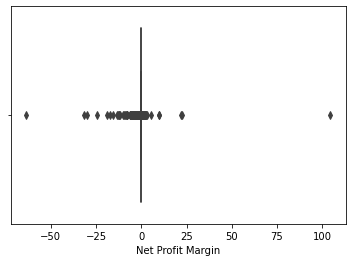

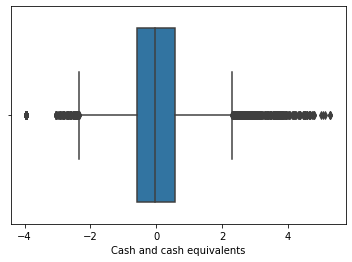

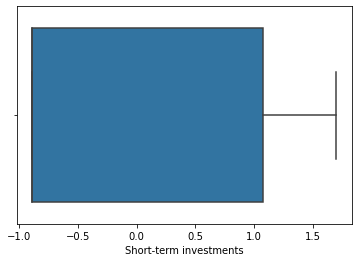

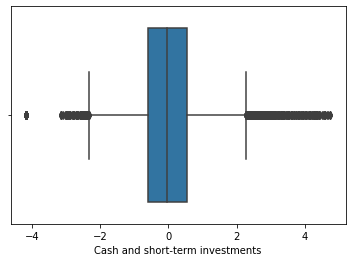

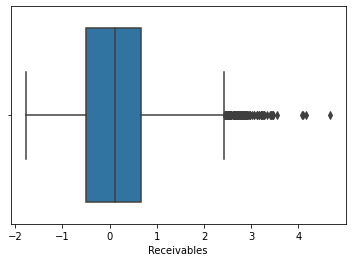

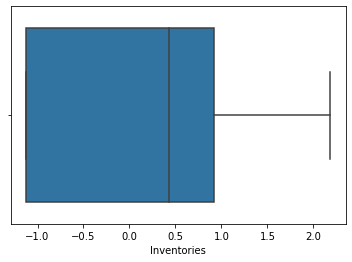

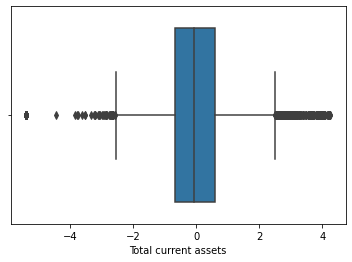

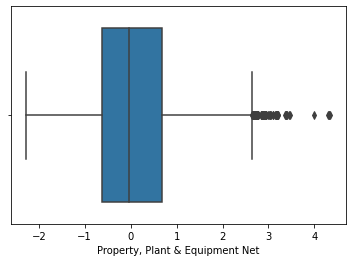

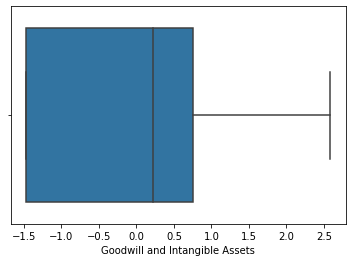

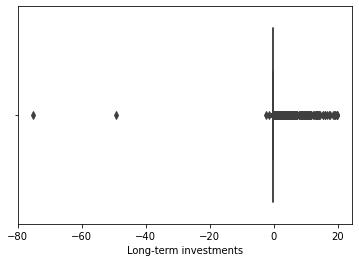

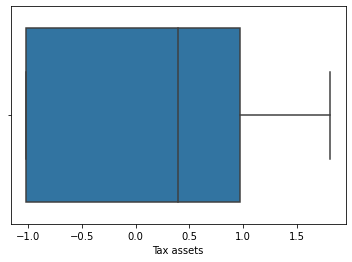

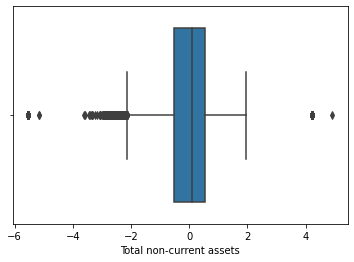

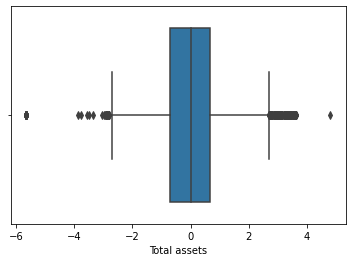

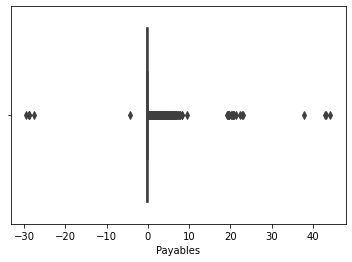

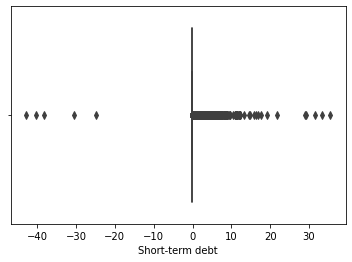

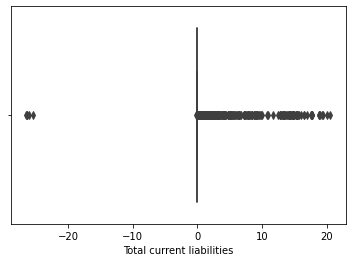

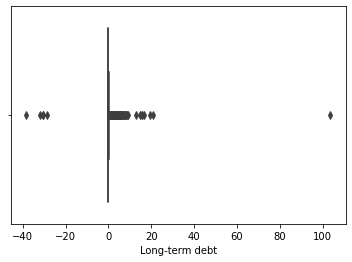

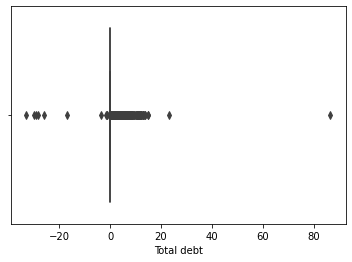

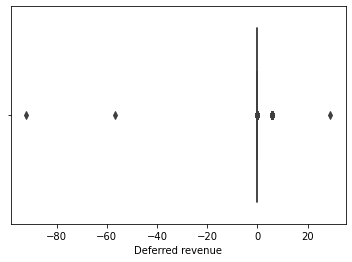

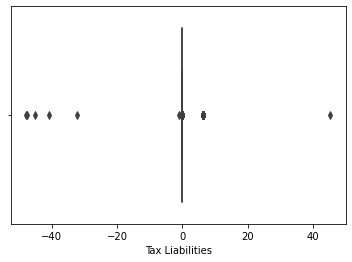

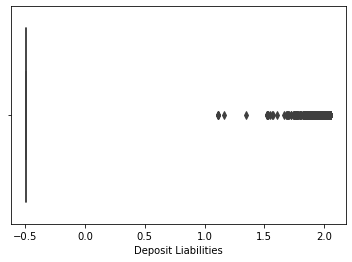

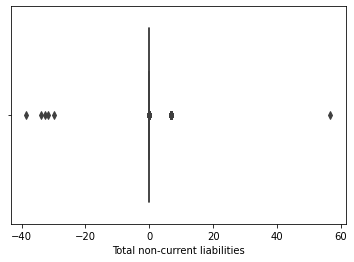

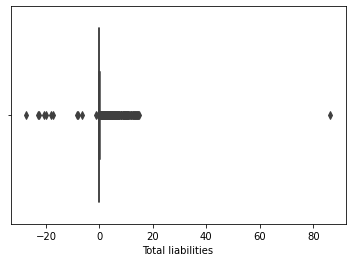

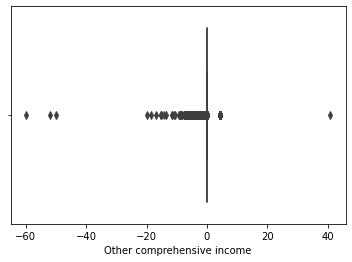

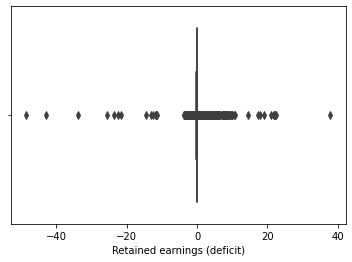

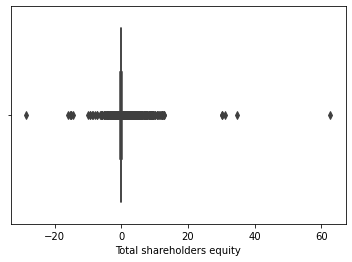

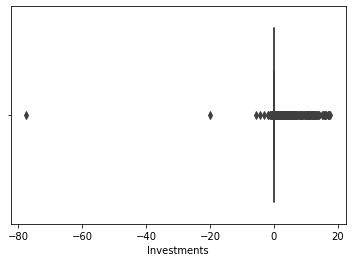

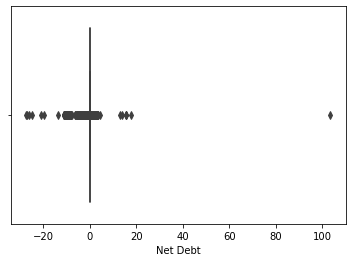

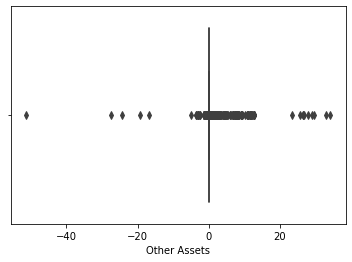

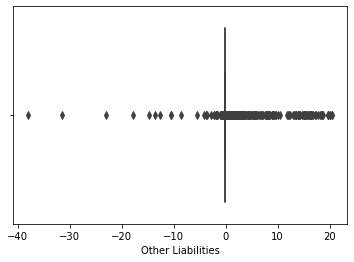

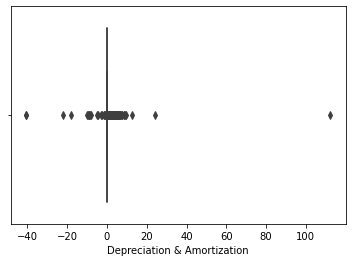

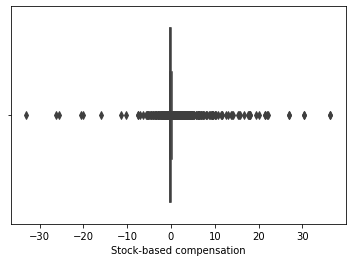

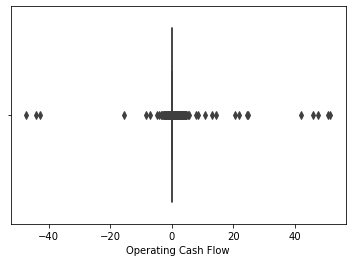

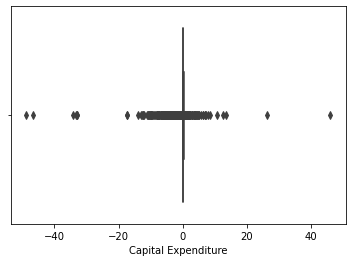

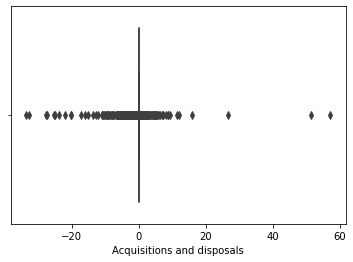

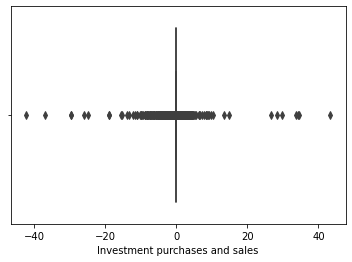

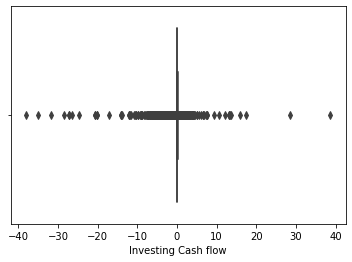

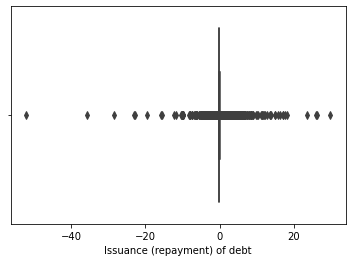

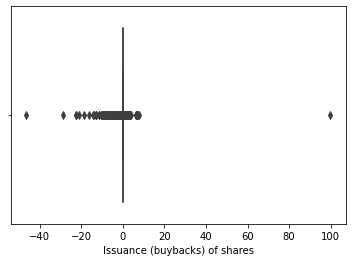

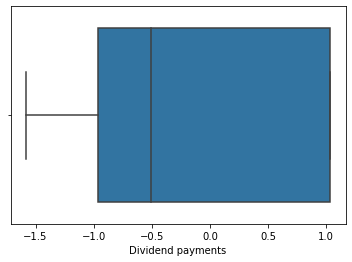

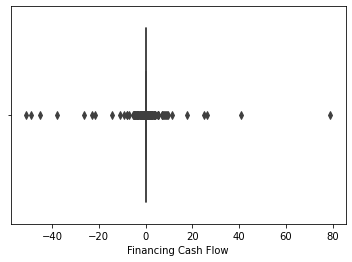

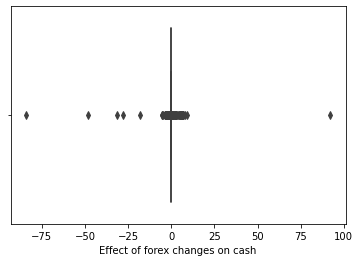

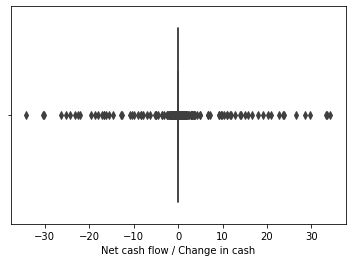

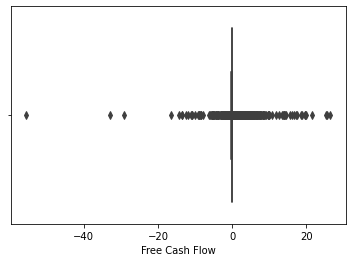

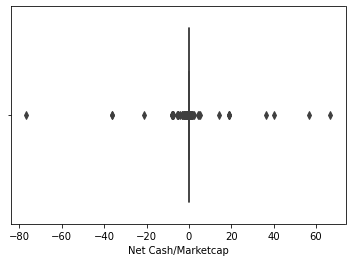

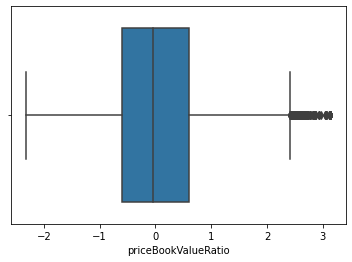

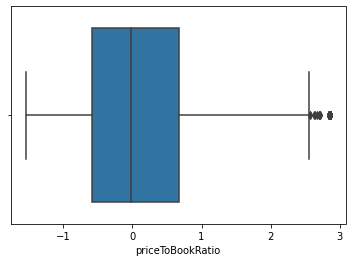

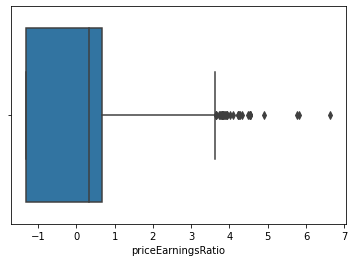

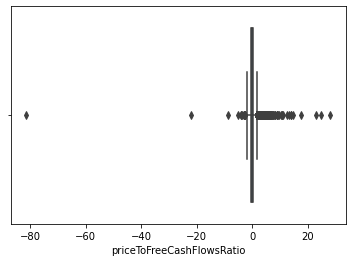

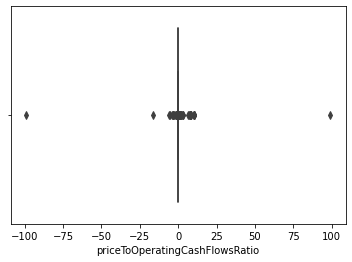

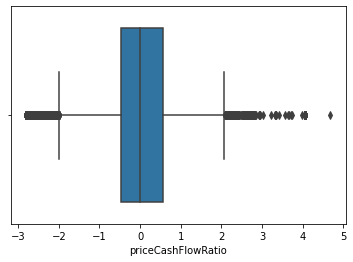

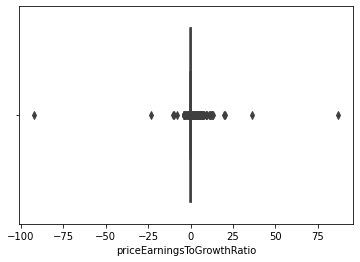

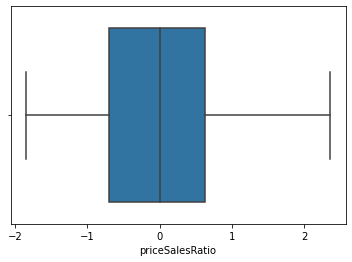

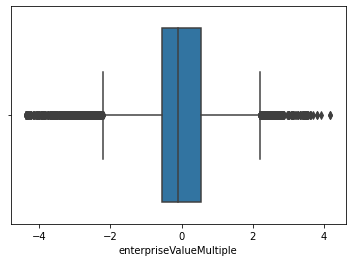

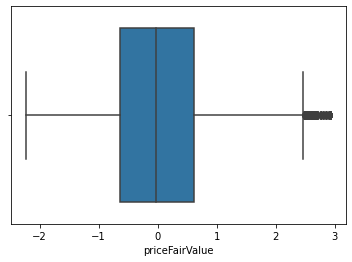

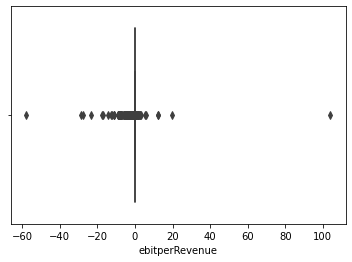

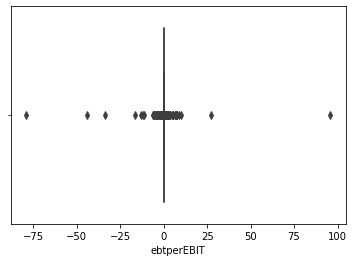

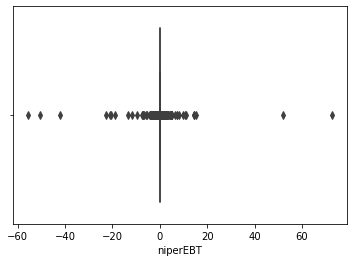

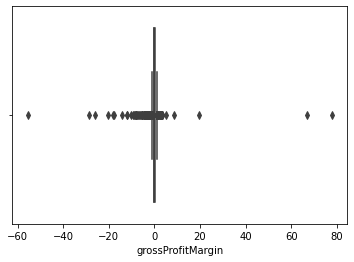

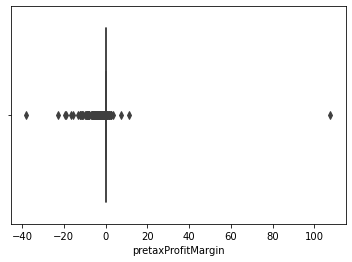

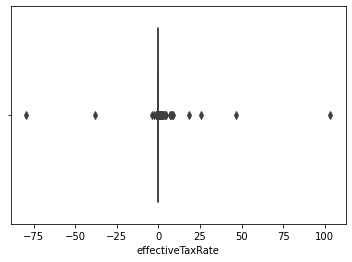

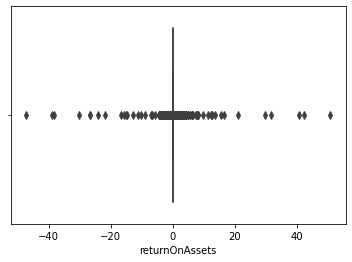

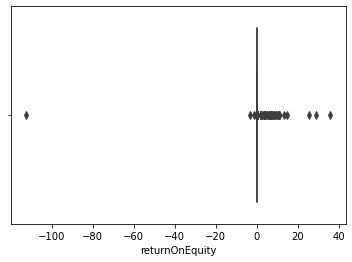

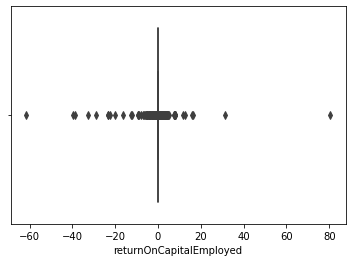

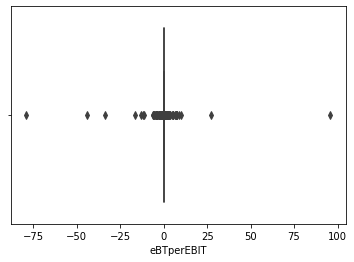

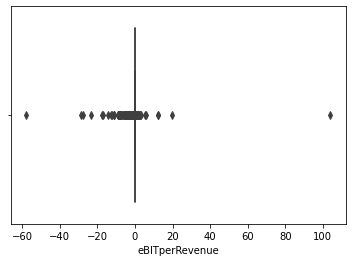

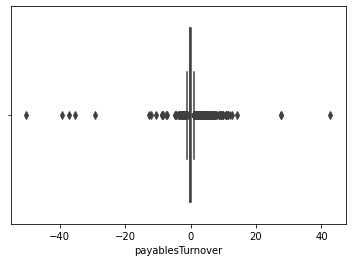

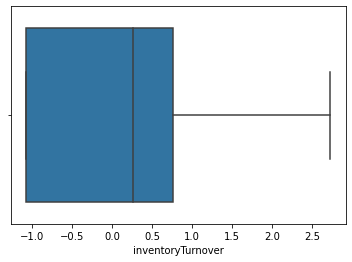

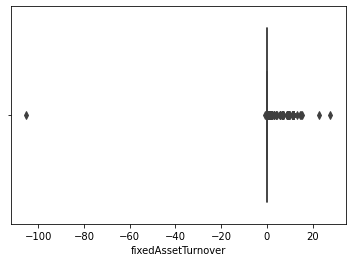

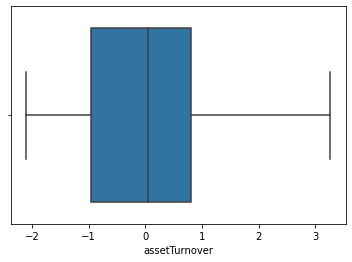

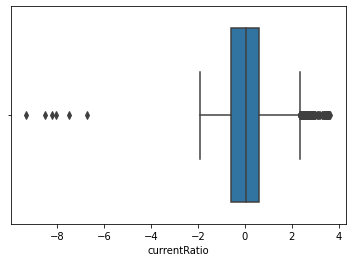

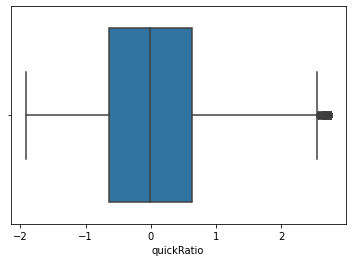

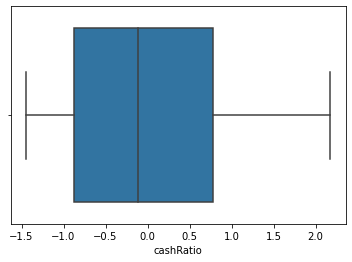

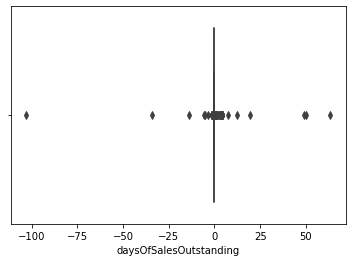

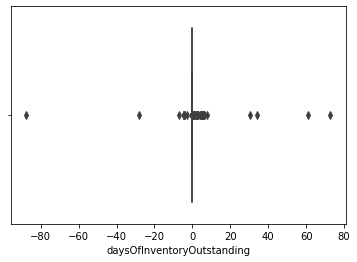

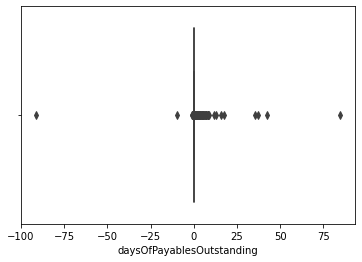

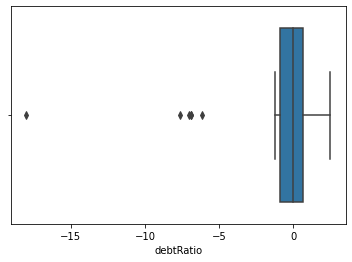

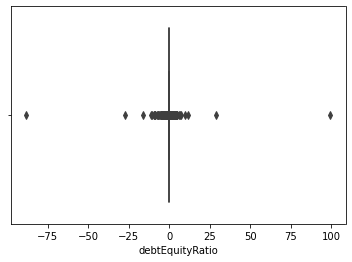

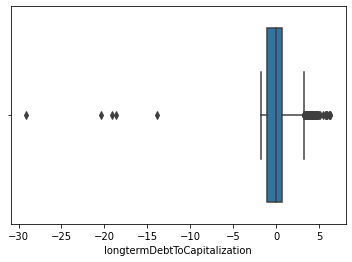

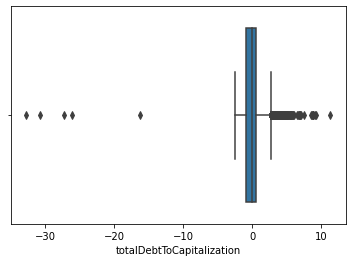

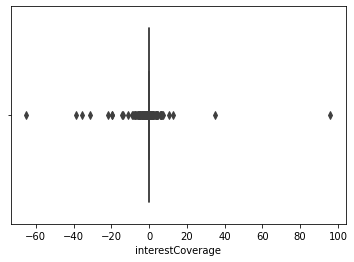

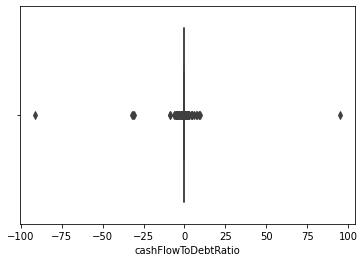

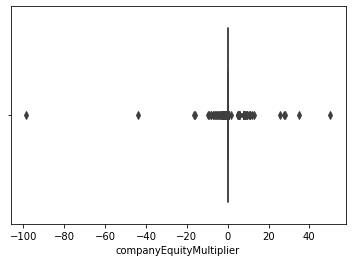

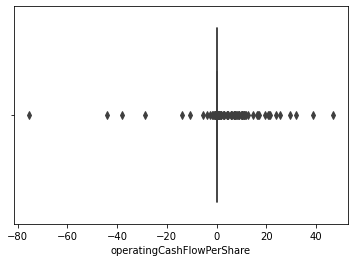

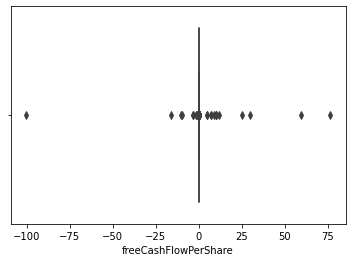

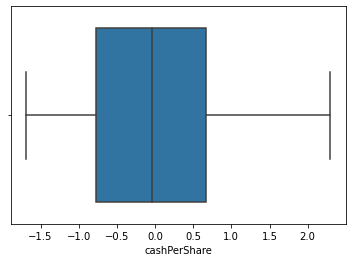

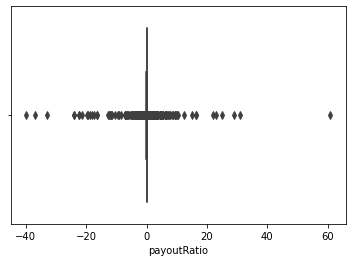

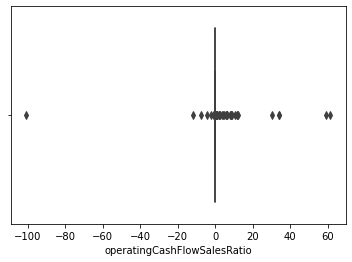

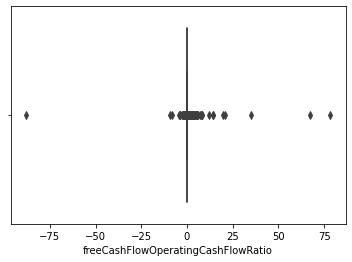

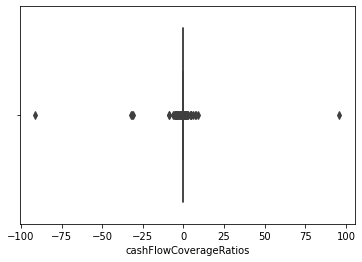

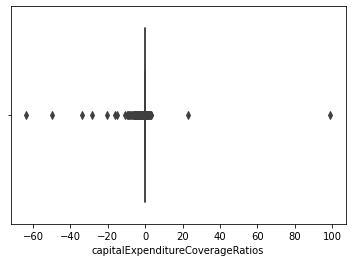

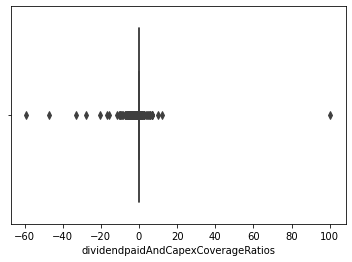

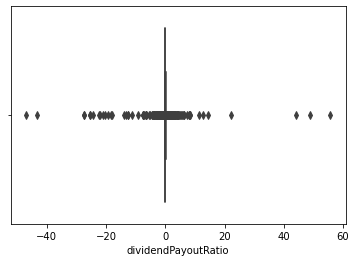

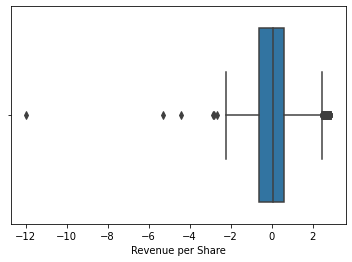

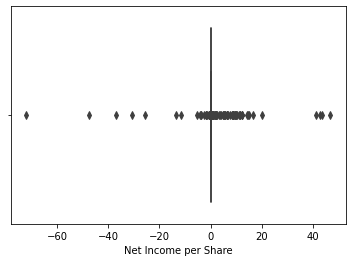

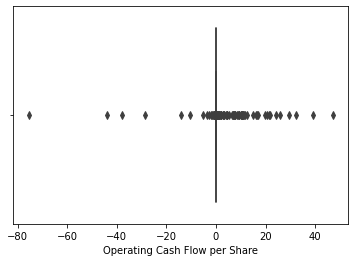

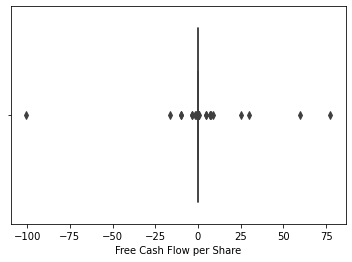

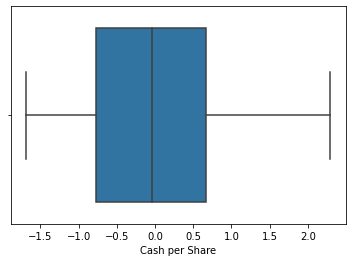

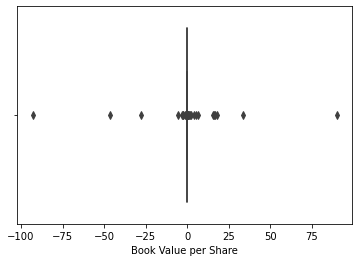

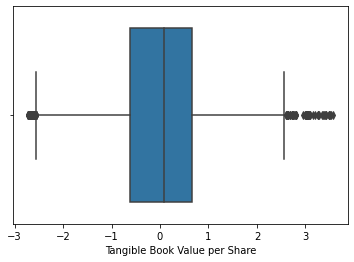

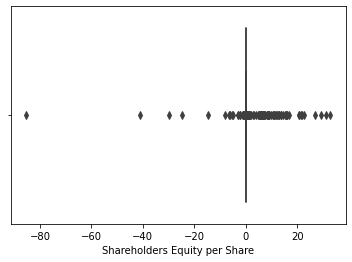

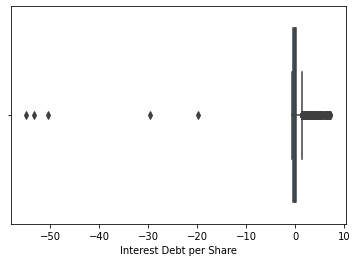

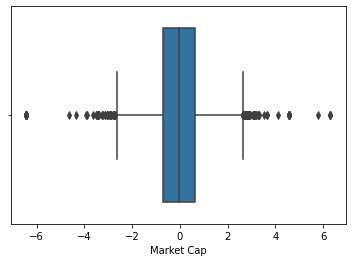

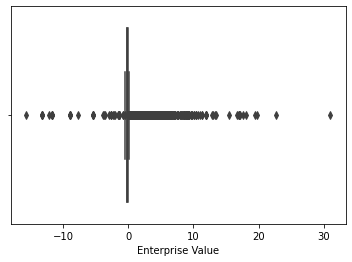

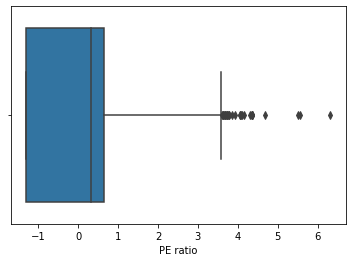

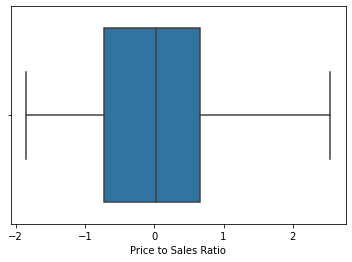

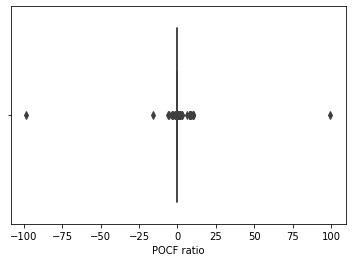

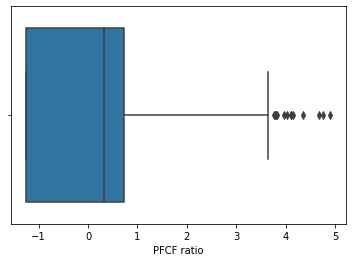

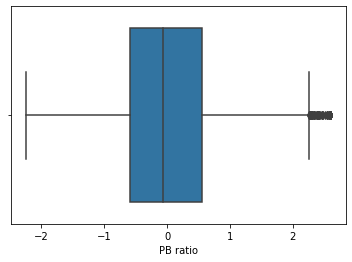

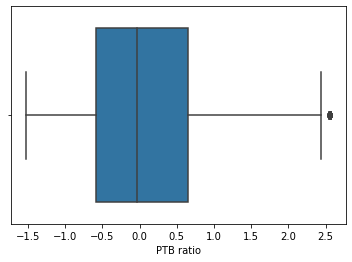

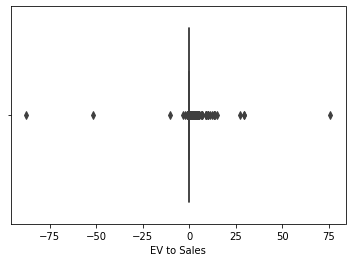

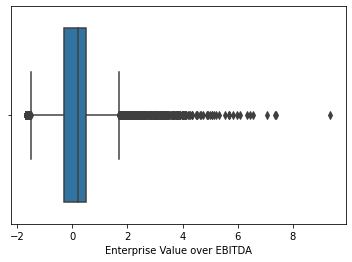

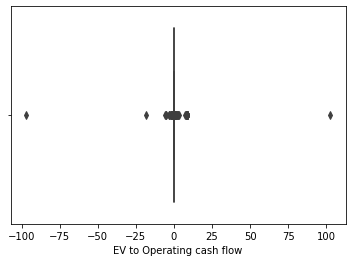

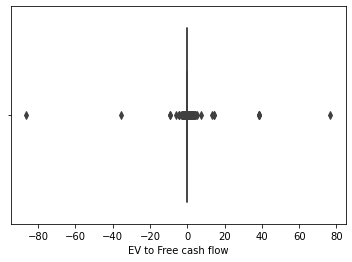

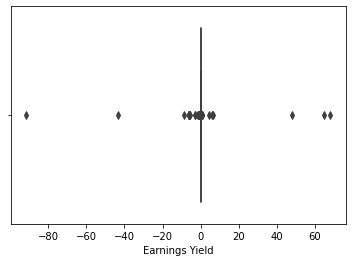

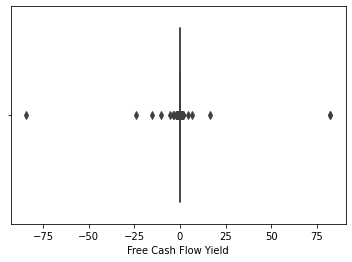

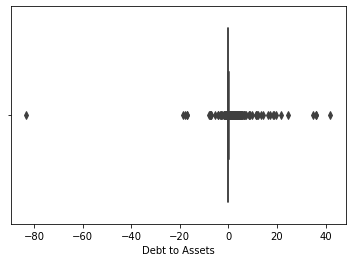

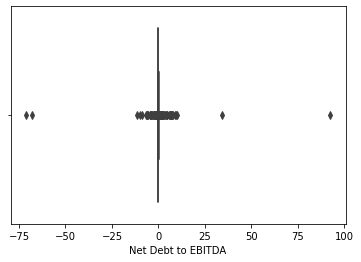

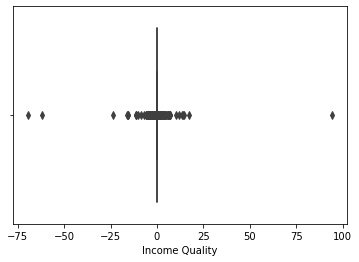

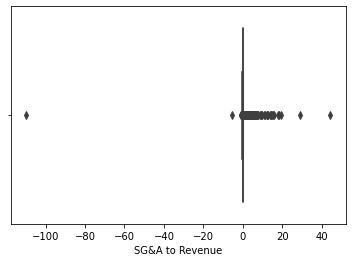

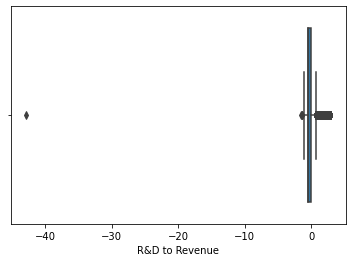

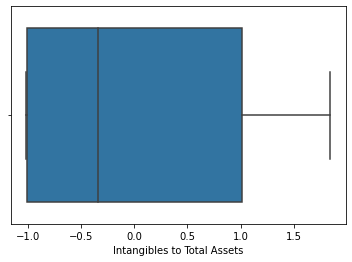

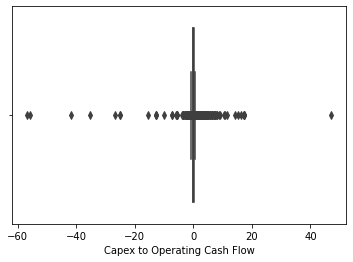

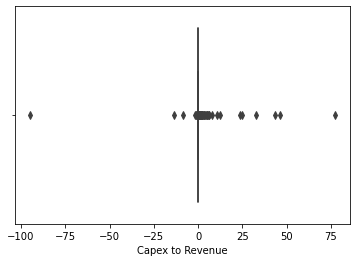

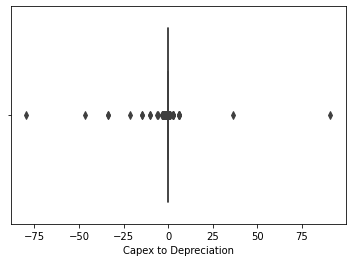

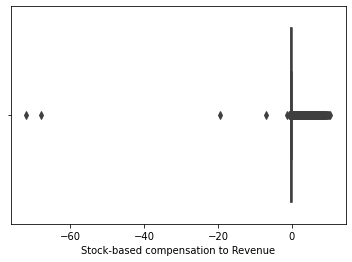

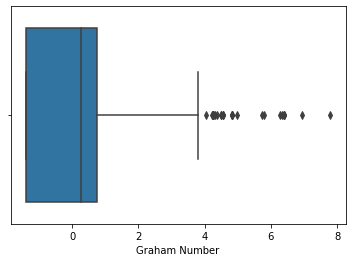

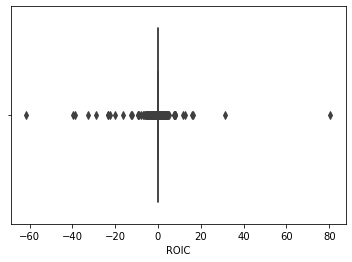

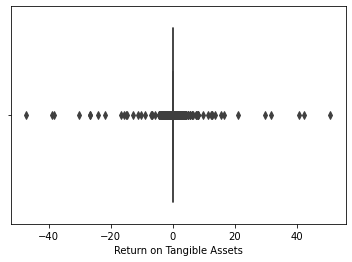

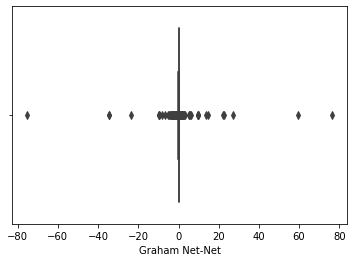

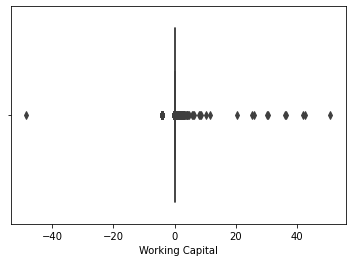

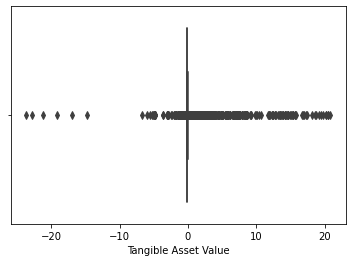

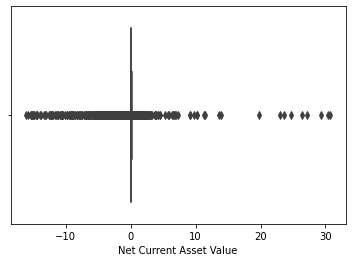

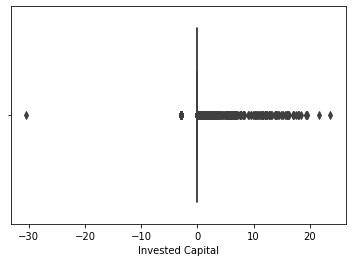

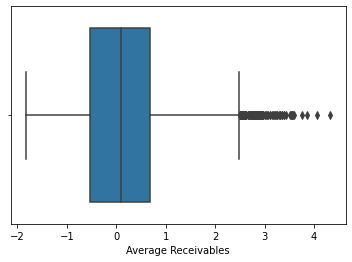

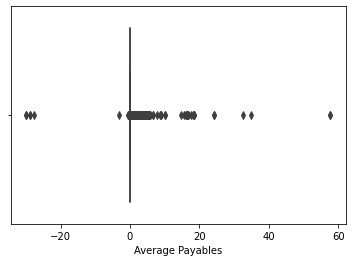

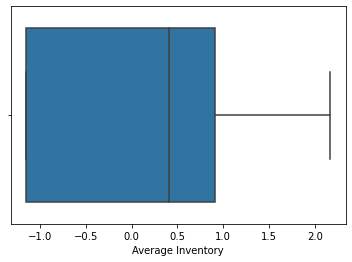

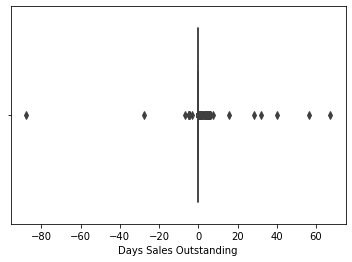

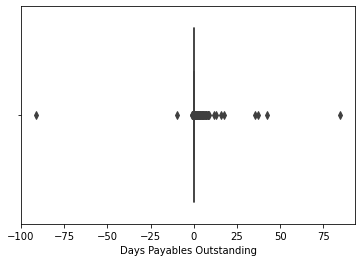

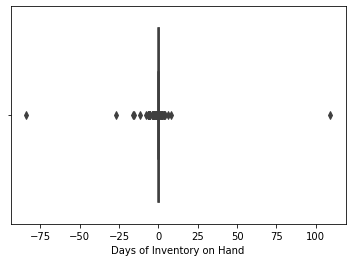

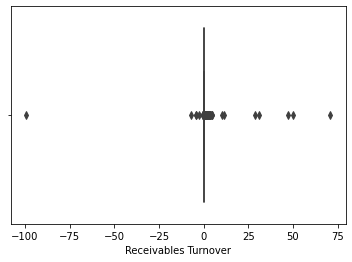

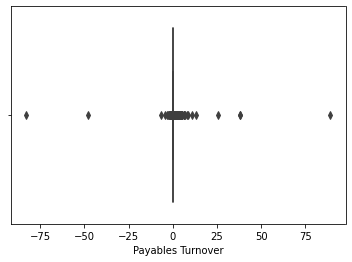

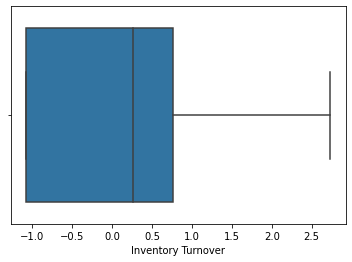

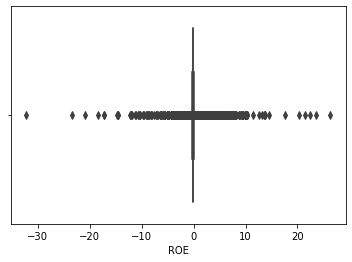

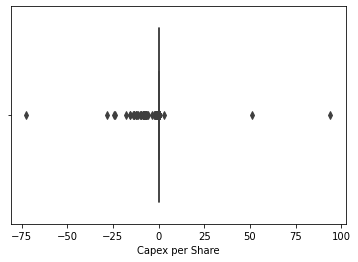

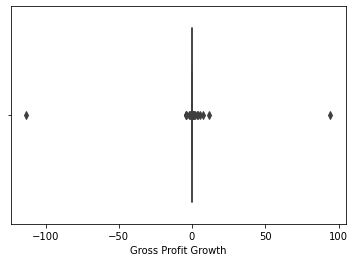

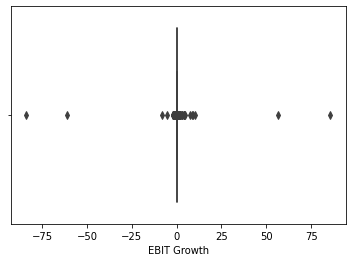

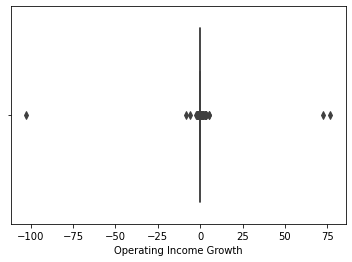

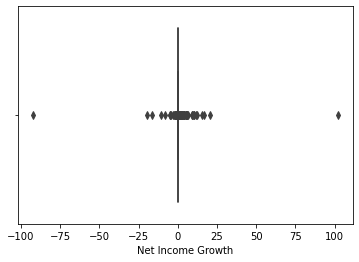

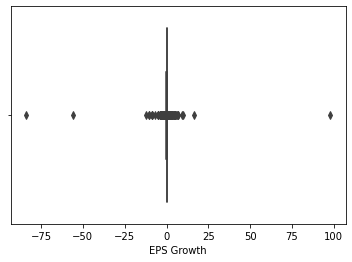

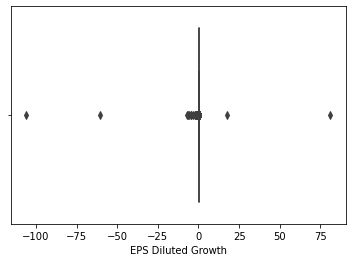

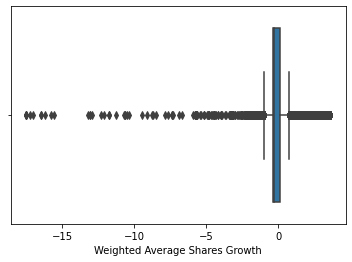

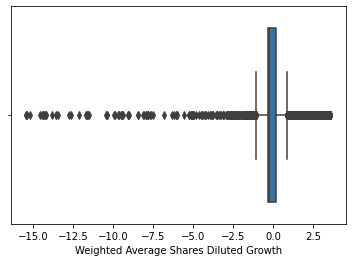

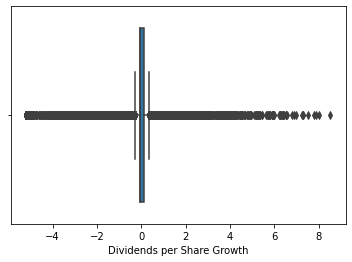

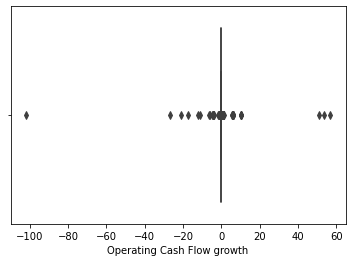

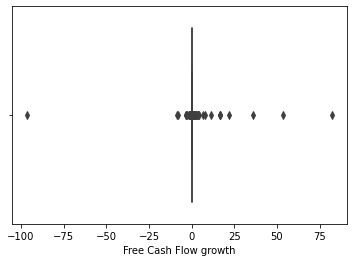

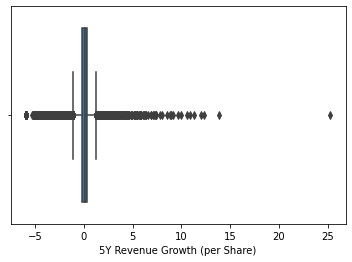

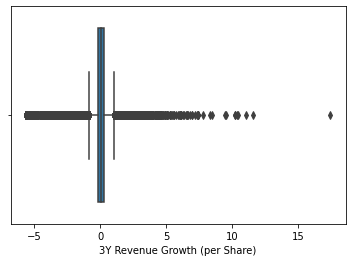

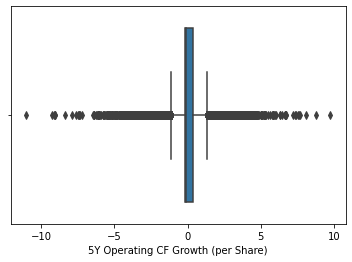

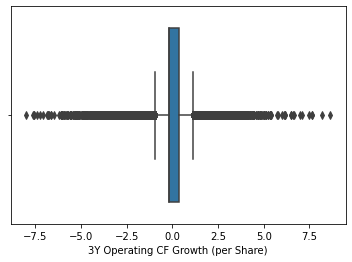

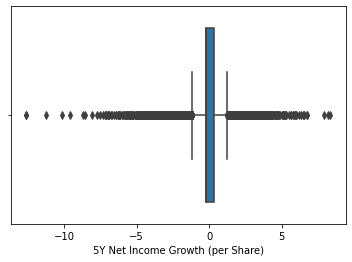

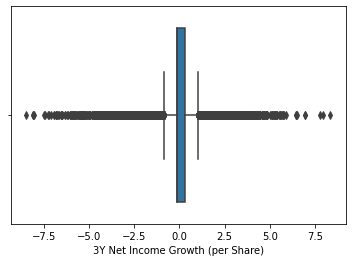

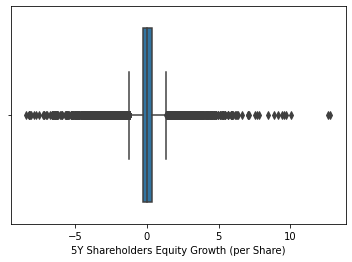

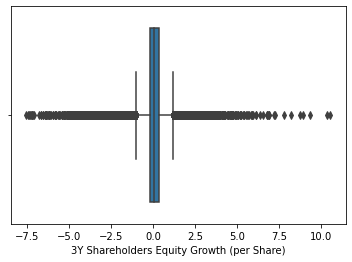

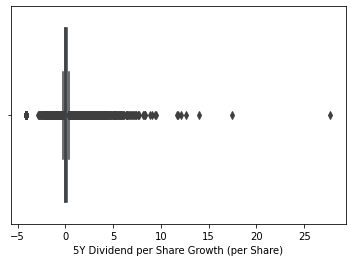

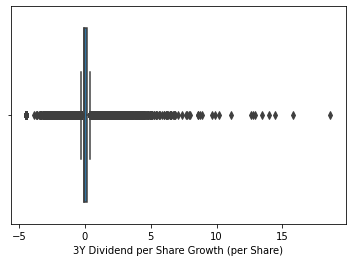

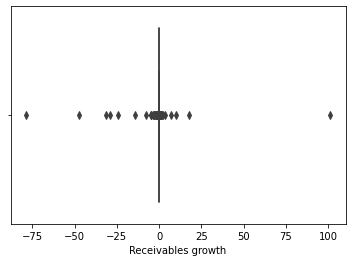

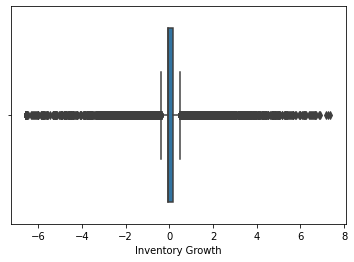

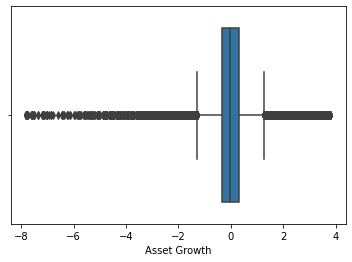

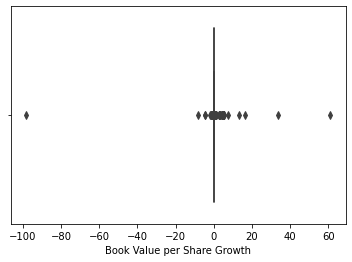

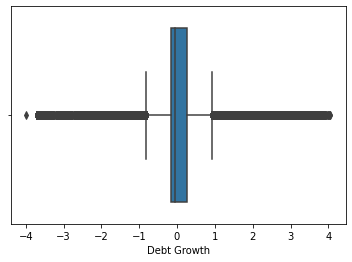

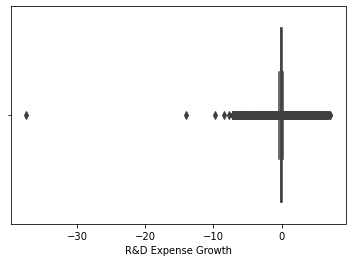

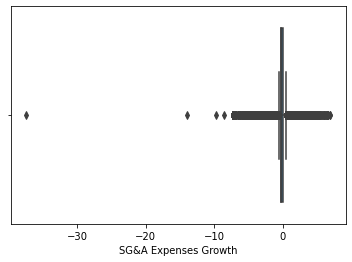

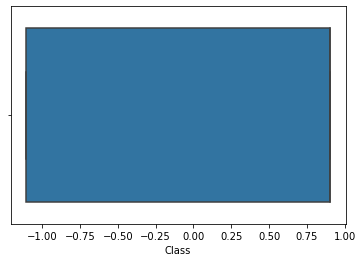

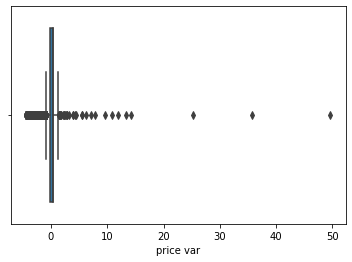

In [122]:
for i in df.columns:
    sns.boxplot(df2[i])
    plt.show()

### Pyod

In [59]:
abod = ABOD(contamination=0.1)

In [20]:
abod.fit(df2)
abod_pred = abod.predict(df2)

In [22]:
abod_pred

0
0      0
1      0
2      0
3      0
4      0
...   ..
22059  0
22060  0
22061  0
22062  0
22063  0

[22064 rows x 1 columns]

In [25]:
abod_pred = pd.DataFrame(abod_pred)

In [18]:
ypred_abod.to_excel('ABOD.xlsx')

In [22]:
cblof = CBLOF(contamination=0.1,check_estimator=False, random_state=random_state)

In [125]:
cblof.fit(df2)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=1,
   random_state=RandomState(MT19937) at 0x299D9D0DD40, use_weights=False)

In [128]:
cblof_pred = cblof.predict(df2)

In [580]:
cblof_pred = pd.DataFrame(cblof_pred)
cblof_pred

0
0      1
1      0
2      0
3      0
4      0
...   ..
22059  0
22060  0
22061  0
22062  0
22063  0

[22064 rows x 1 columns]

In [30]:
ypred_cblof.to_excel('CBLOF.xlsx')

In [27]:
hbos = HBOS(contamination=0.1)

In [28]:
hbos.fit(df2)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [29]:
scores_pred = hbos.predict(df2)
scores_pred = pd.DataFrame(scores_pred)
scores_pred

0
0      1
1      0
2      1
3      0
4      0
...   ..
22059  0
22060  0
22061  0
22062  0
22063  0

[22064 rows x 1 columns]

In [35]:
ypred_hbos.to_excel('HBOS.xlsx')

In [60]:
isof = IForest(contamination=outliers_fraction,random_state=random_state)

In [61]:
isof.fit(df2)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=RandomState(MT19937) at 0x1B5C1B5FD40, verbose=0)

In [92]:
isof_pred=isof.predict(df2)

In [93]:
isof_pred = pd.DataFrame(isof_pred)

In [90]:
isof_pred   = pd.read_excel('ISOF.xlsx')

In [96]:
isof_pred.to_excel('ISOF.xlsx')

In [94]:
isof_pred

0
0      1
1      0
2      0
3      0
4      0
...   ..
22059  0
22060  0
22061  0
22062  0
22063  0

[22064 rows x 1 columns]

In [45]:
knn_median = KNN(contamination=0.1)

In [46]:
knn_median.fit(df2)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [48]:
kmedian_pred = knn_median.predict(df2)

In [49]:
kmedian_pred = pd.DataFrame(kmedian_pred)


In [74]:
kmedian_pred

0
0      1
1      0
2      0
3      0
4      0
...   ..
22059  0
22060  0
22061  0
22062  0
22063  0

[22064 rows x 1 columns]

In [50]:
kmedian_pred.to_excel('knn_out_median.xlsx')

In [79]:
knn_mean =  KNN(method='mean',contamination=outliers_fraction)

In [80]:
knn_mean.fit(df2)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [81]:
kmean_pred = knn_mean.predict(df2)

In [82]:
kmean_pred = pd.DataFrame(kmean_pred)

In [83]:
kmean_pred.to_excel('knn_out.xlsx')


In [84]:
kmean_pred

0
0      0
1      0
2      0
3      0
4      0
...   ..
22059  0
22060  0
22061  0
22062  0
22063  0

[22064 rows x 1 columns]

In [63]:
feat_bag = FeatureBagging(LOF(n_neighbors=35),contamination=0.1,check_estimator=False,random_state=random_state)

In [64]:
feat_bag.fit(df2)

FeatureBagging(base_estimator=LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=35, p=2),
        bootstrap_features=False, check_detector=True,
        check_estimator=False, combination='average', contamination=0.1,
        estimator_params={}, max_features=1.0, n_estimators=10, n_jobs=1,
        random_state=RandomState(MT19937) at 0x1B5C1B5FD40, verbose=0)

In [65]:
feat_pred = feat_bag.predict(df2)

In [67]:
feat_pred = pd.DataFrame(feat_pred)

In [68]:
feat_pred.to_excel('feat_bag.xlsx')

In [103]:
df3 = df2.copy()

In [104]:
count=0
for i in df1.index:
        if ((feat_pred.iloc[i,0]==1) and (kmean_pred.iloc[i,0]==1) and (kmedian_pred.iloc[i,0]==1) and (isof_pred.iloc[i,0]==1) and (scores_pred.iloc[i,0] == 1)):# and (cblof_pred.iloc[i,0]==1) and (abod_pred.iloc[i,0]==1)):
            df3 = df3.drop(i,0)
            count+=1
count

366

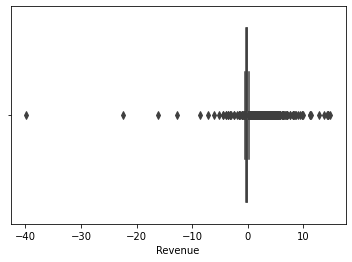

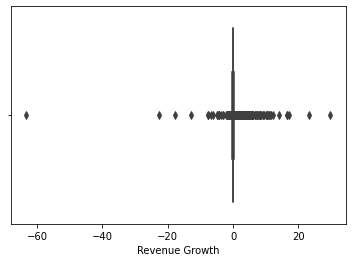

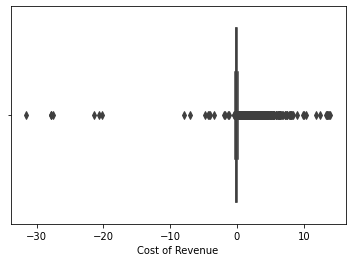

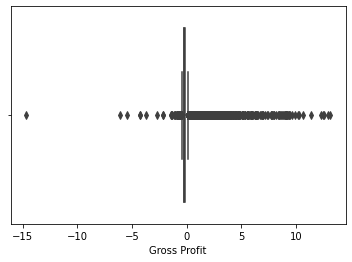

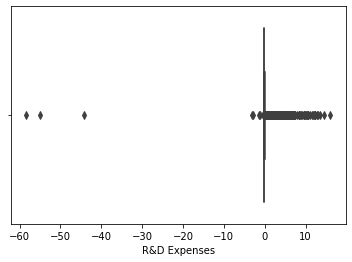

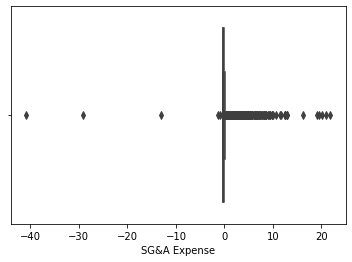

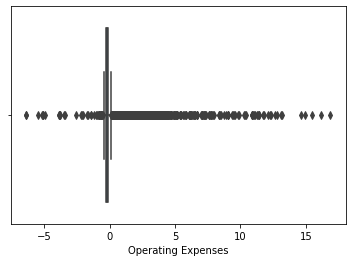

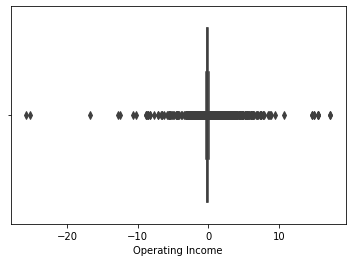

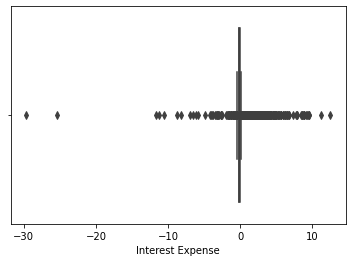

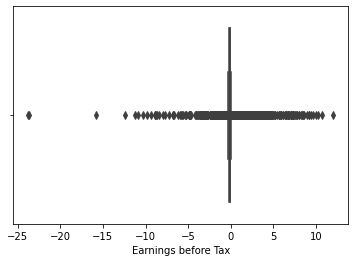

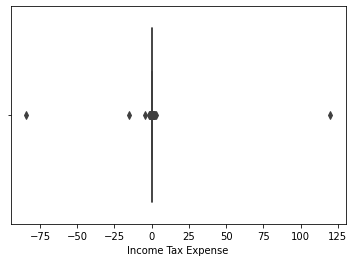

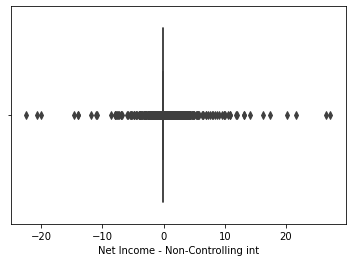

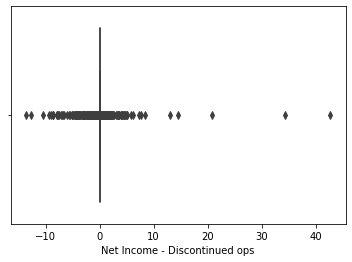

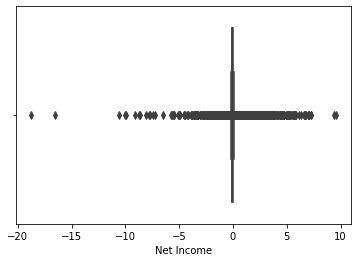

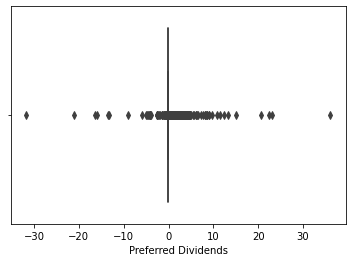

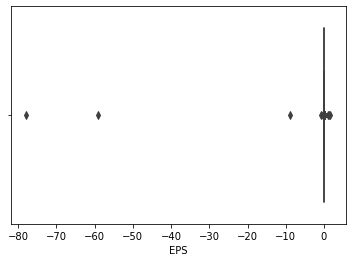

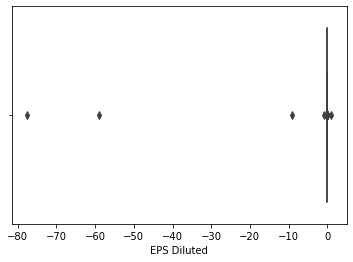

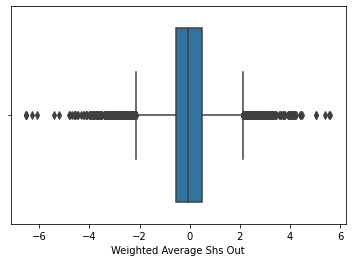

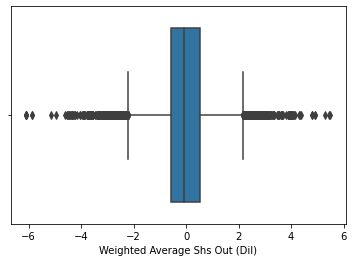

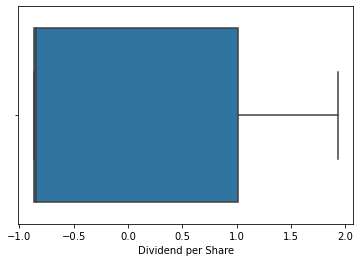

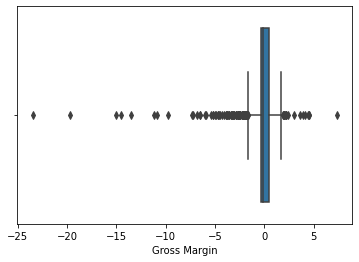

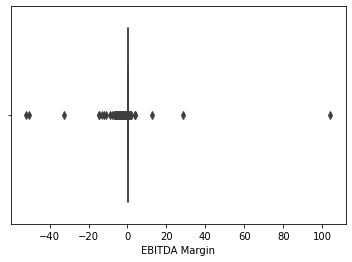

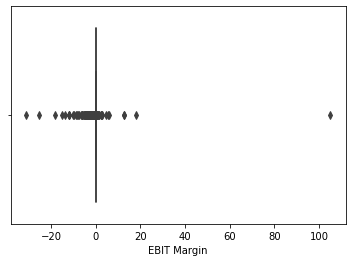

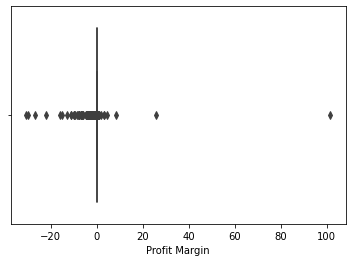

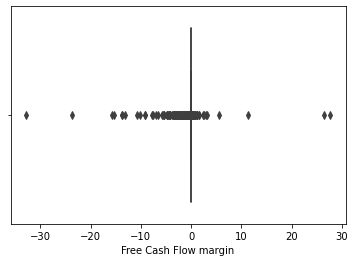

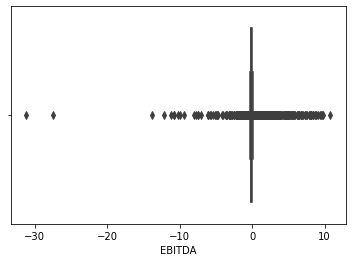

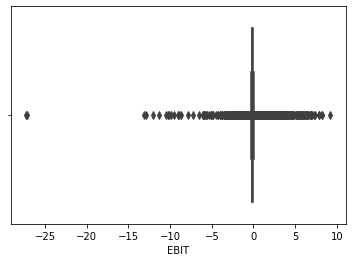

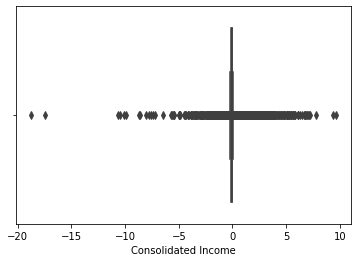

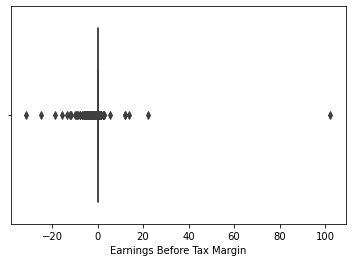

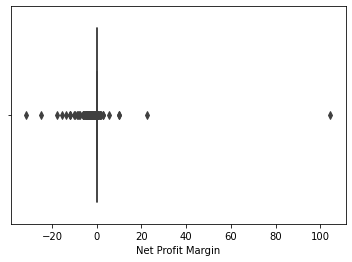

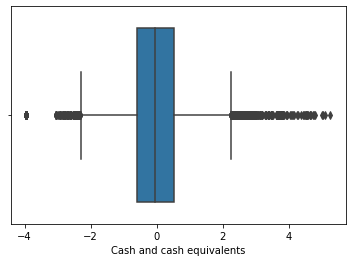

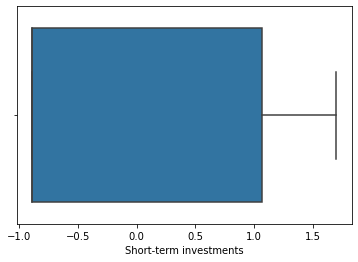

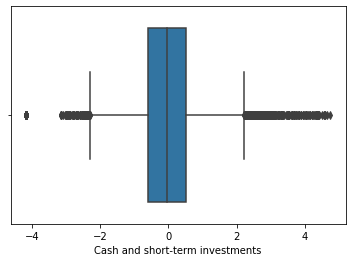

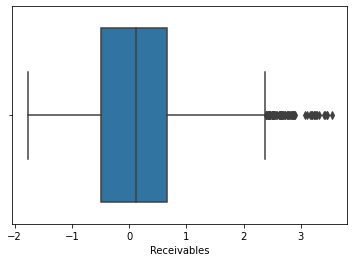

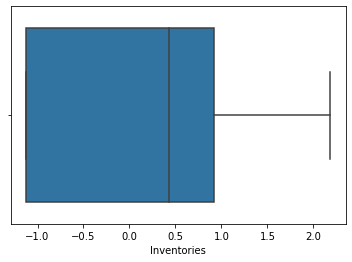

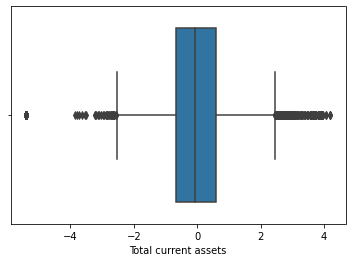

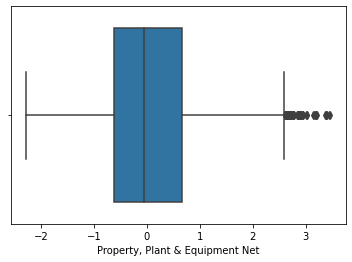

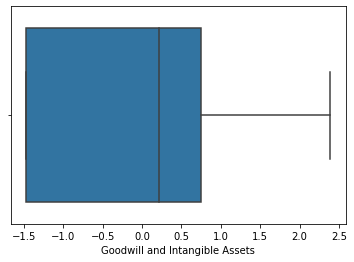

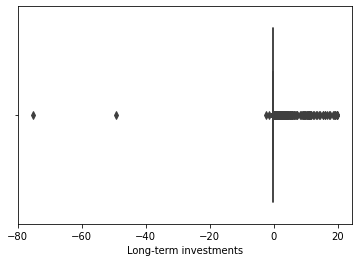

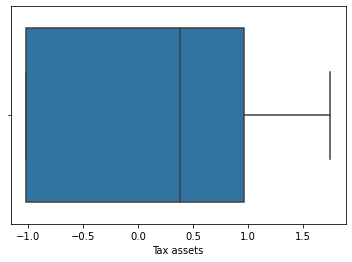

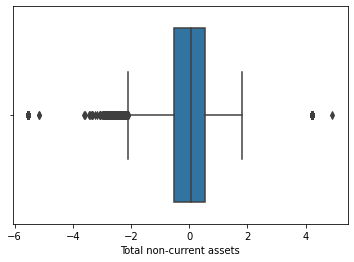

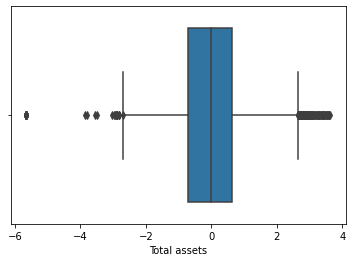

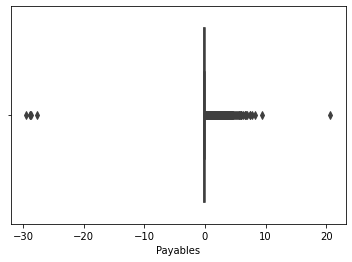

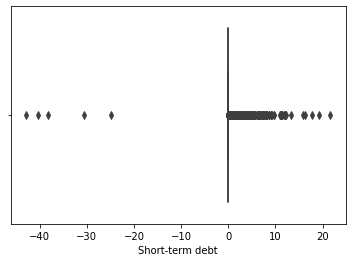

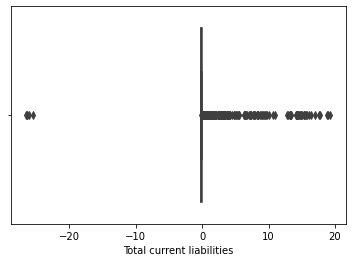

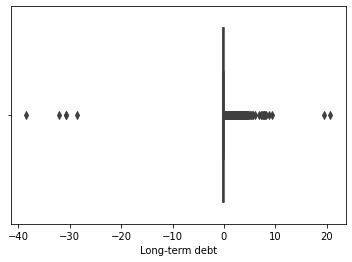

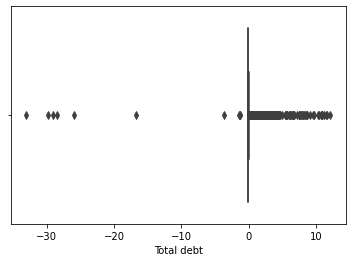

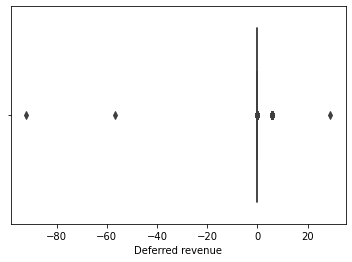

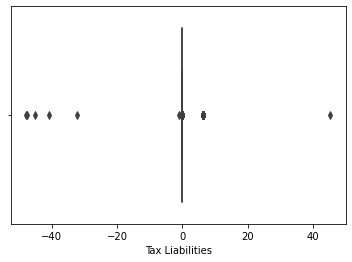

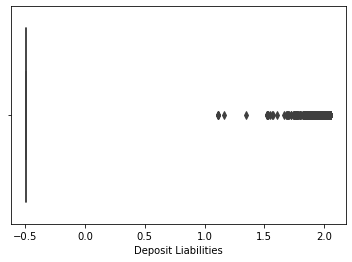

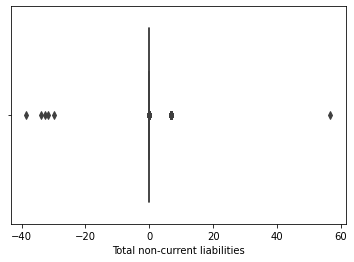

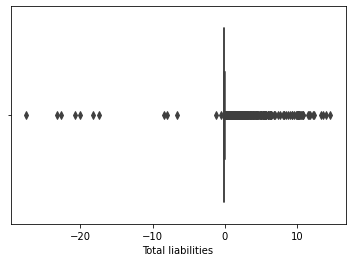

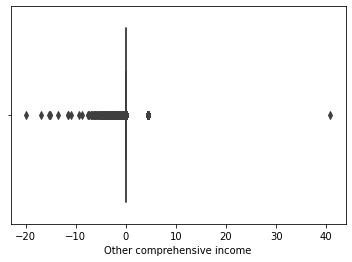

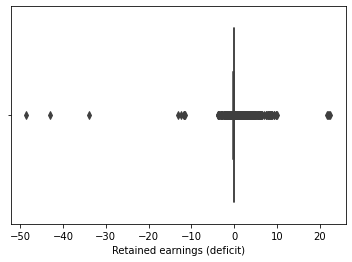

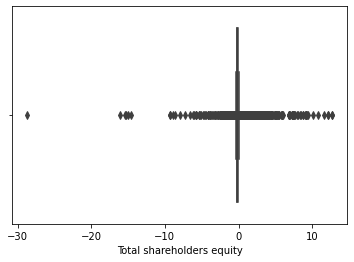

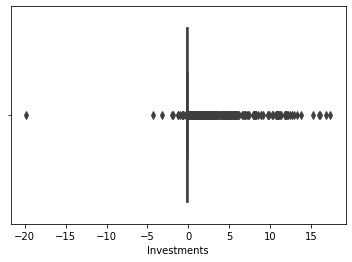

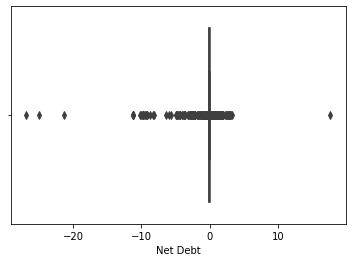

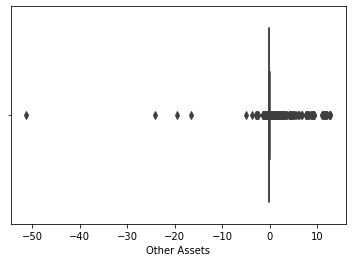

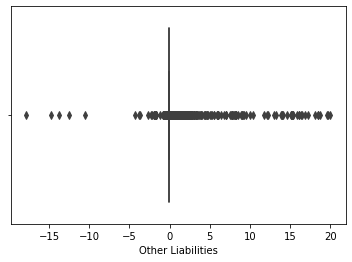

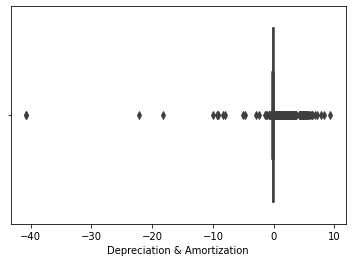

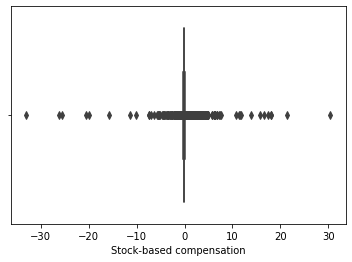

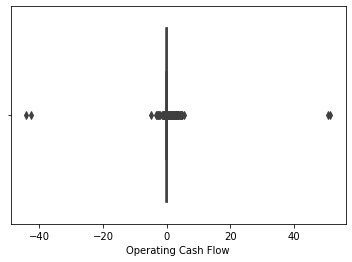

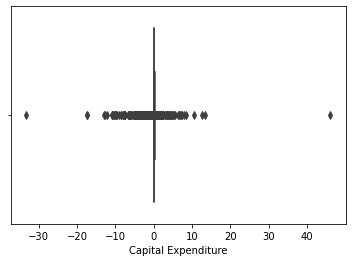

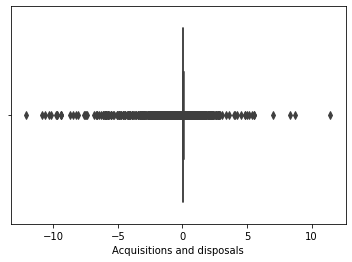

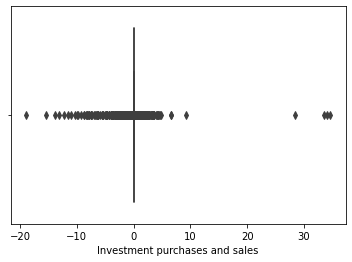

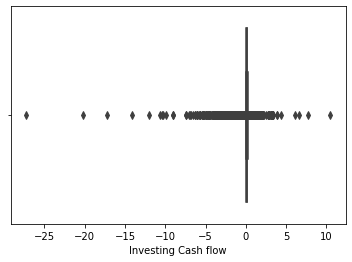

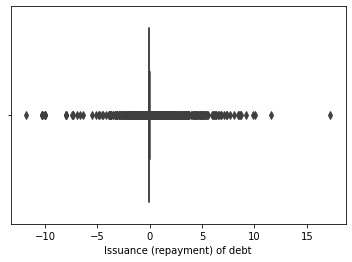

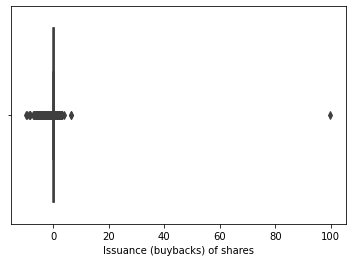

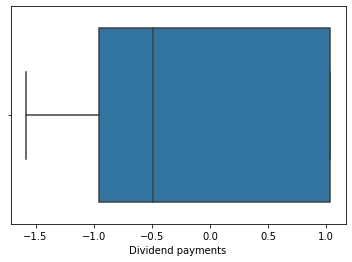

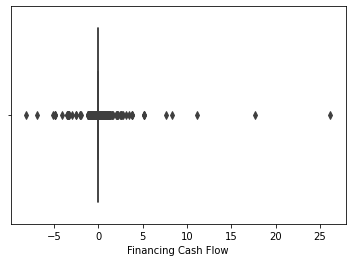

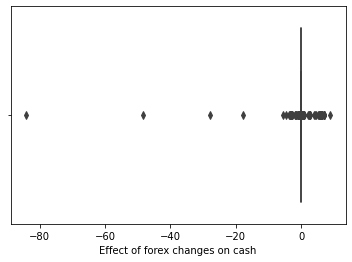

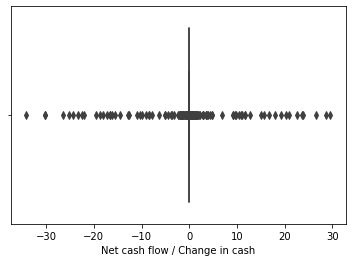

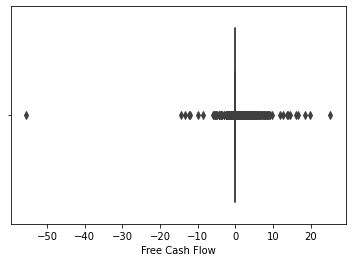

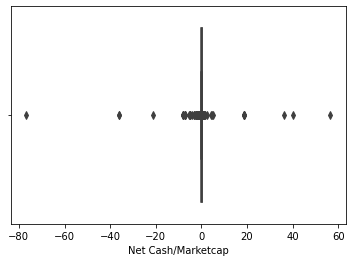

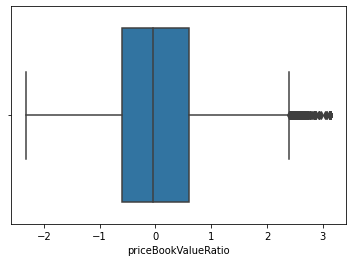

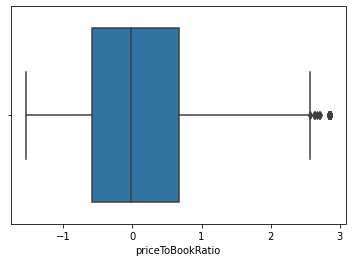

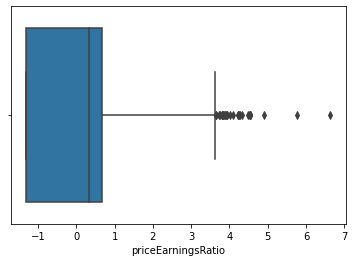

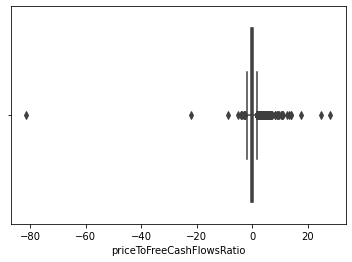

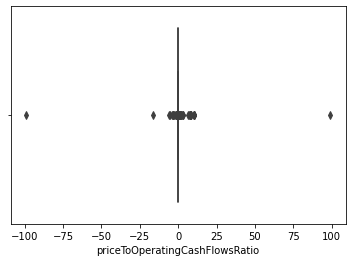

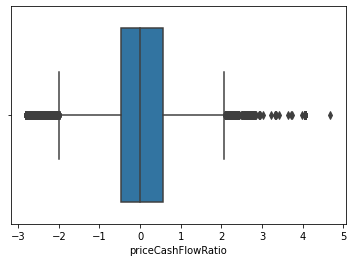

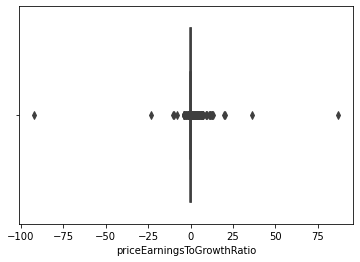

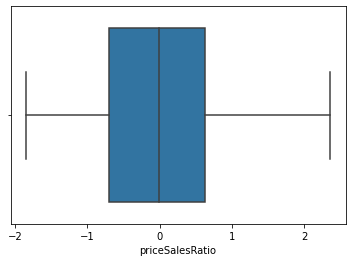

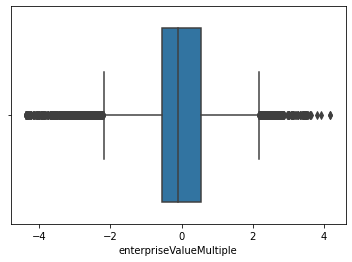

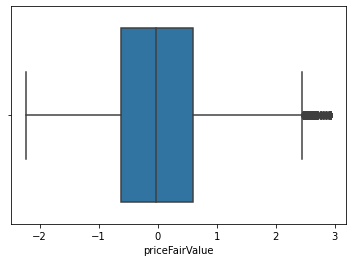

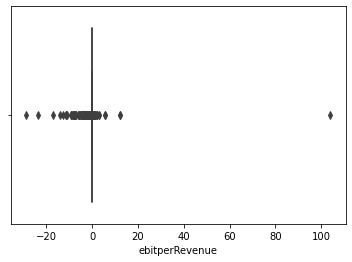

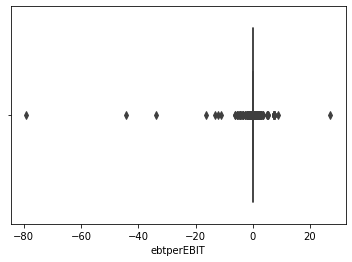

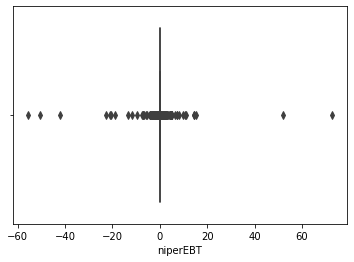

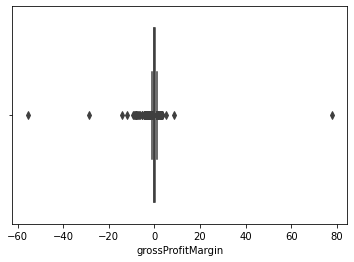

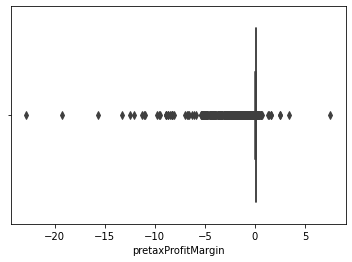

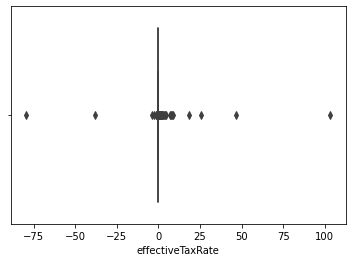

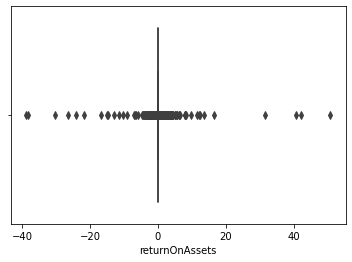

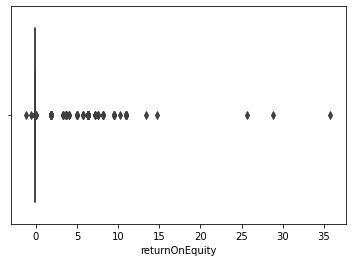

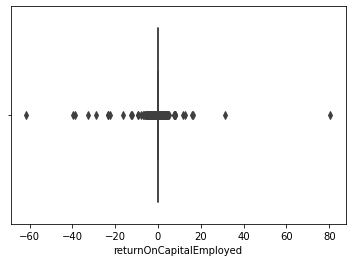

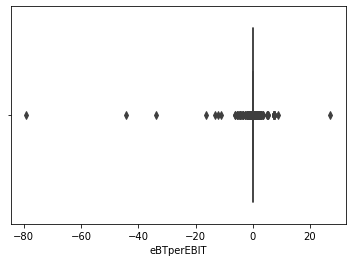

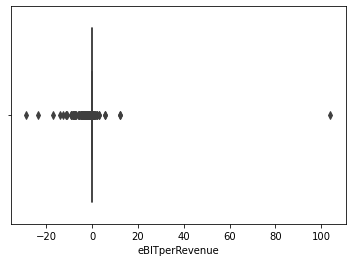

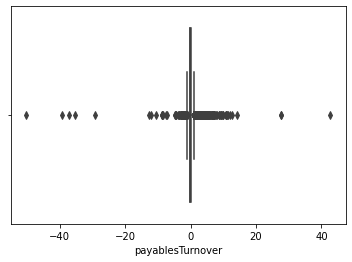

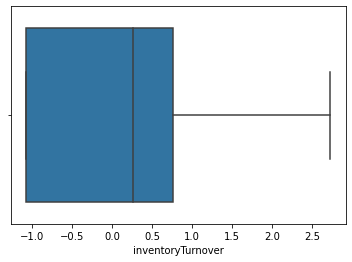

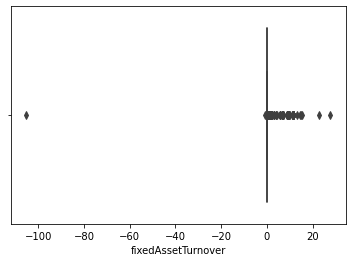

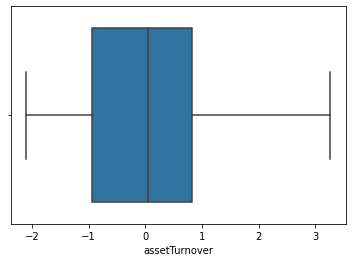

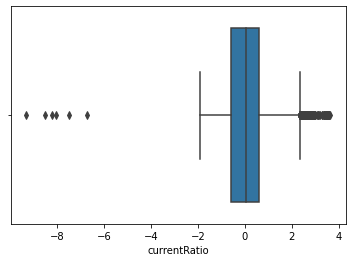

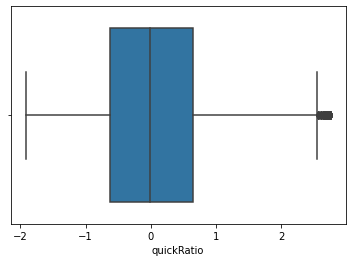

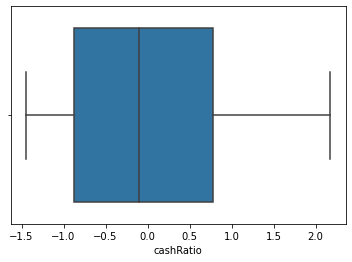

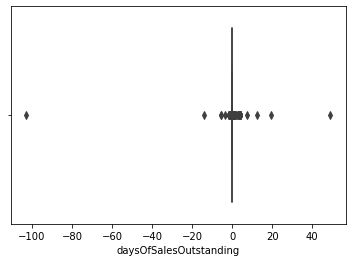

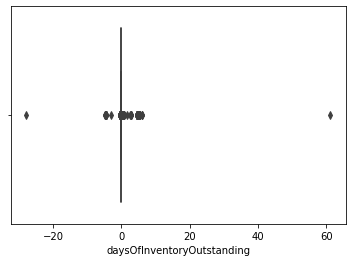

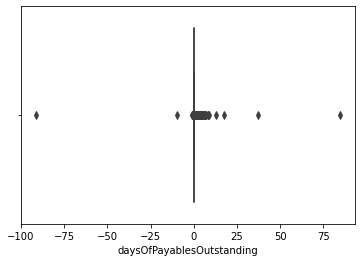

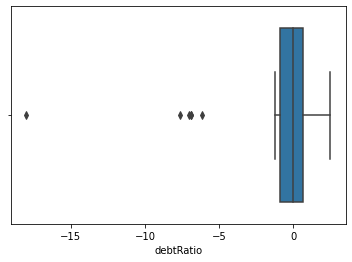

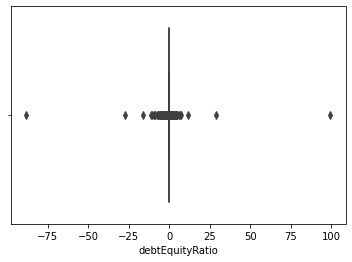

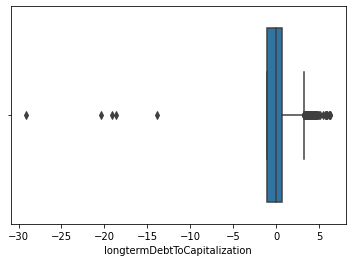

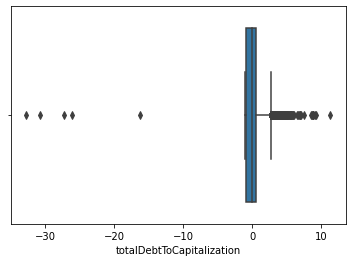

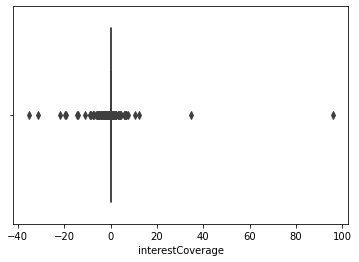

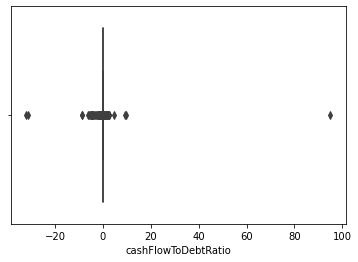

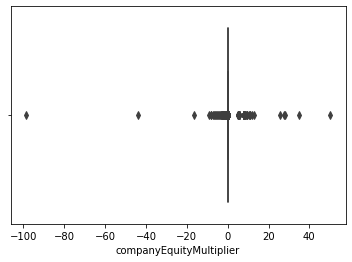

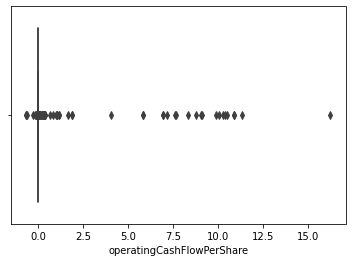

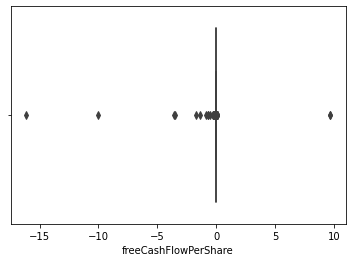

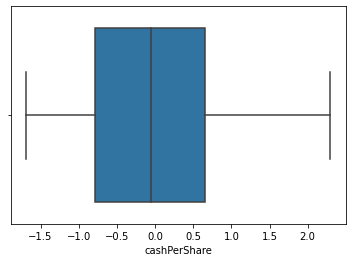

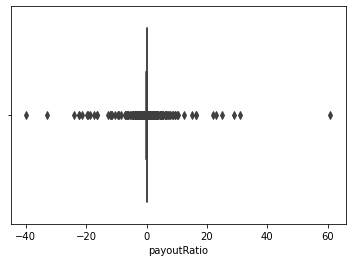

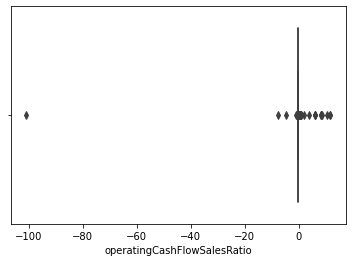

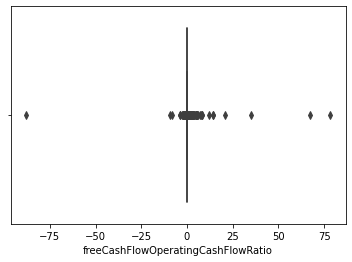

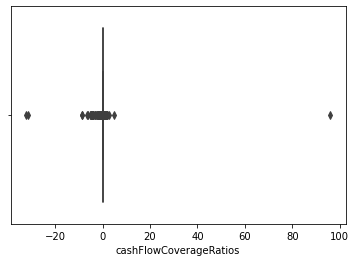

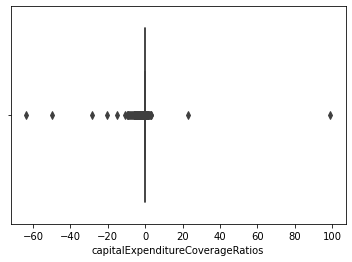

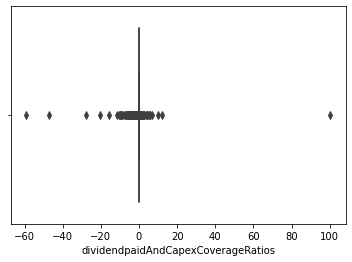

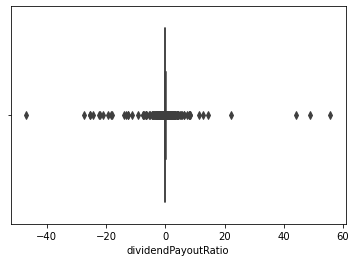

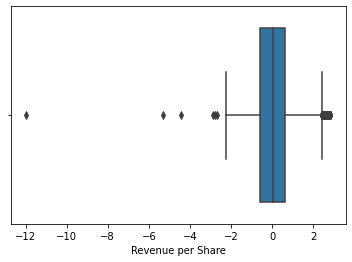

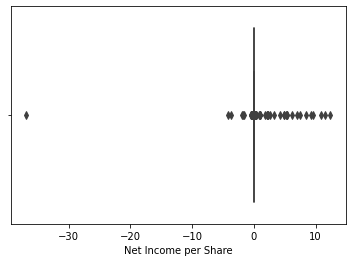

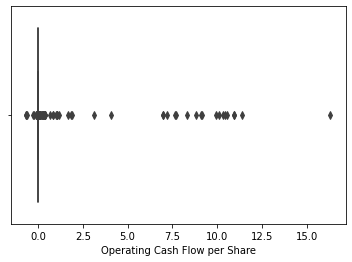

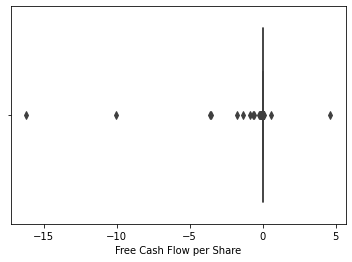

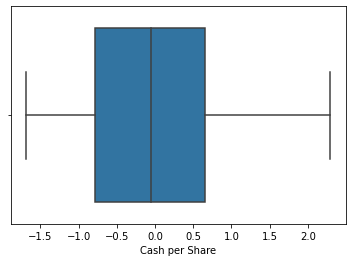

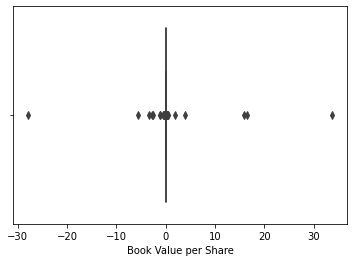

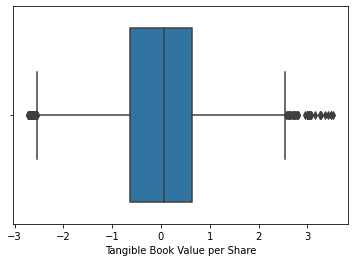

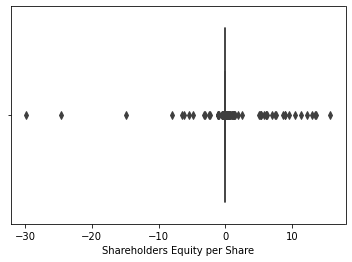

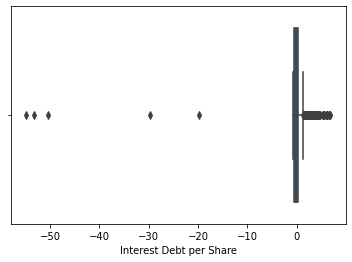

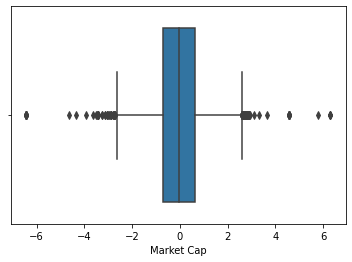

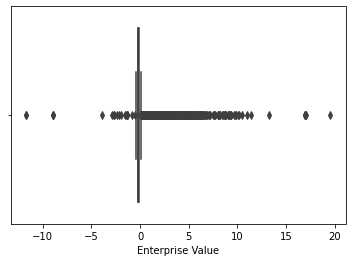

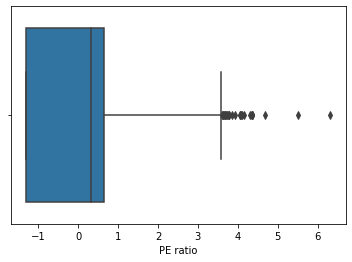

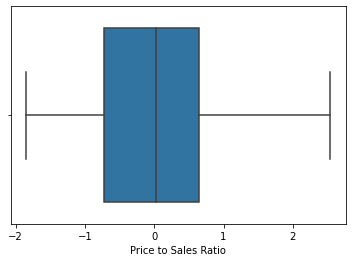

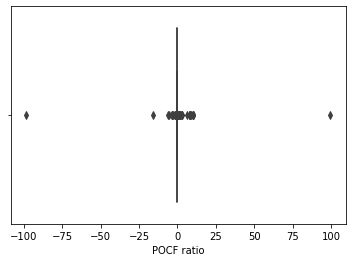

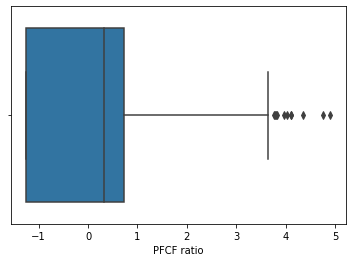

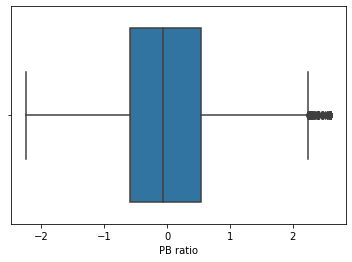

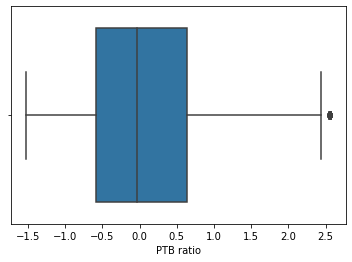

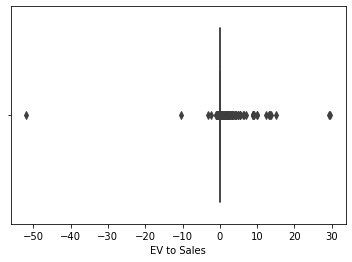

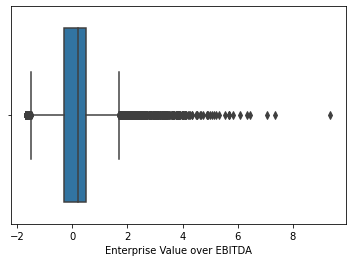

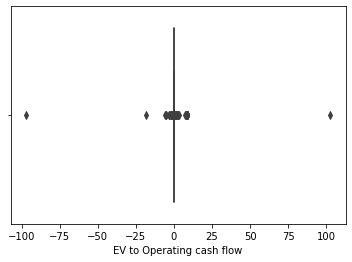

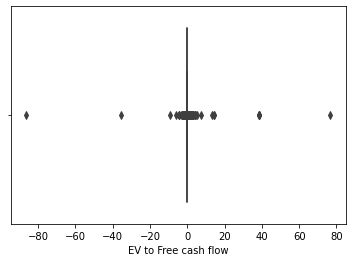

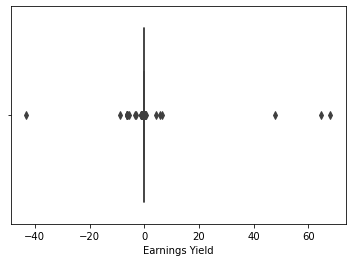

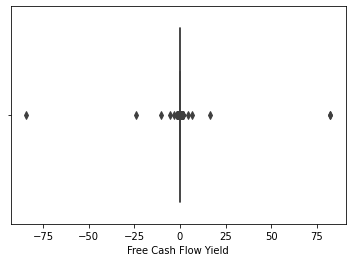

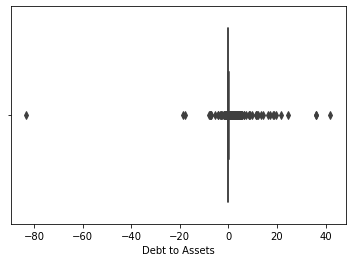

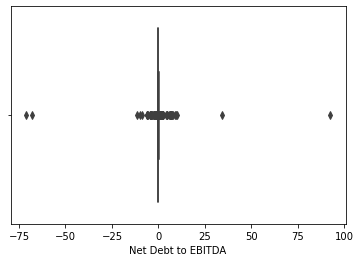

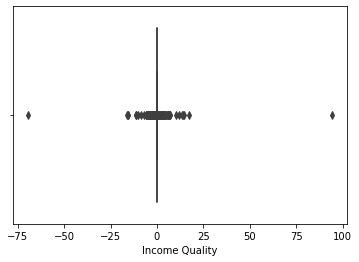

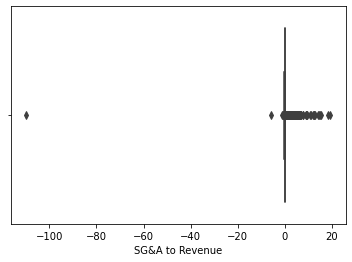

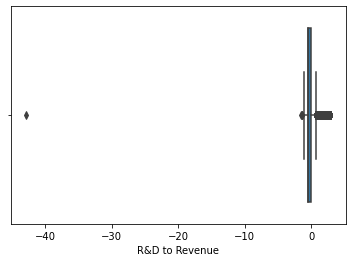

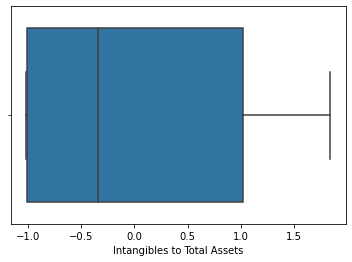

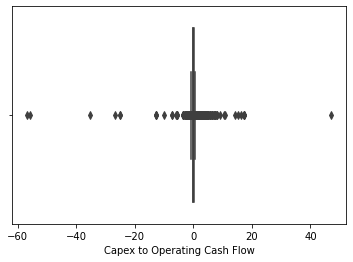

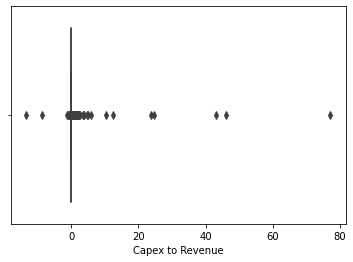

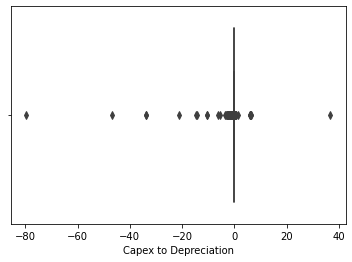

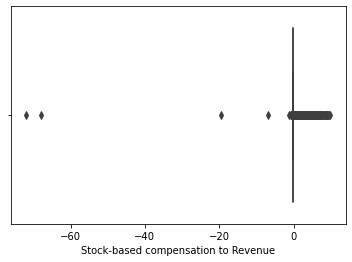

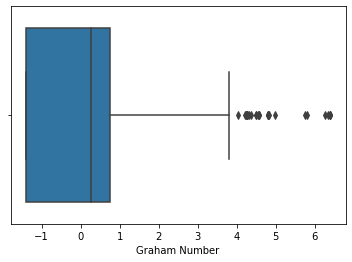

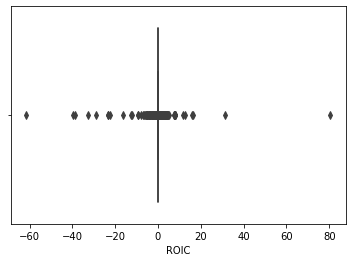

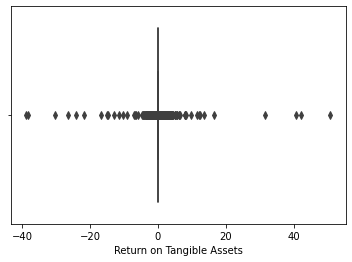

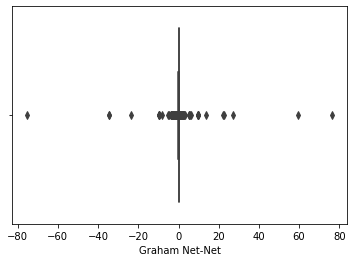

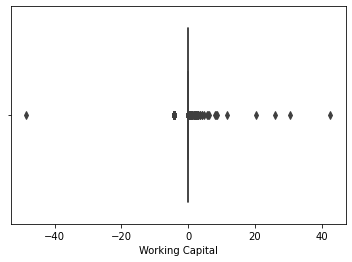

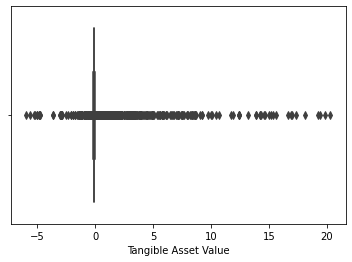

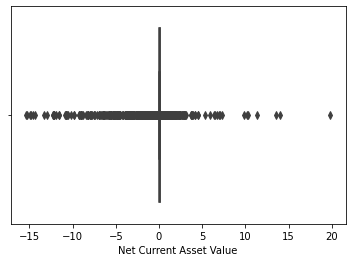

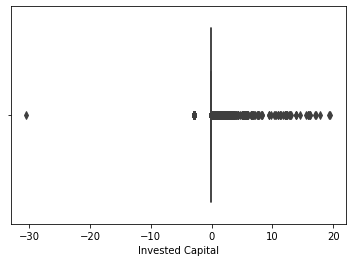

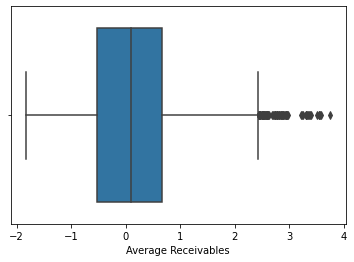

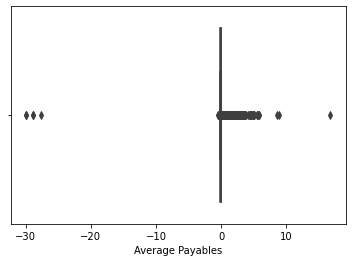

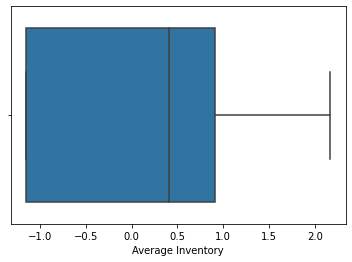

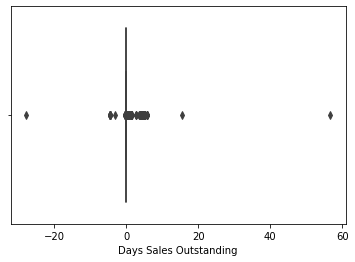

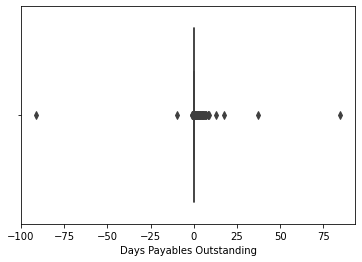

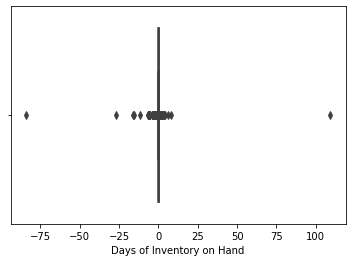

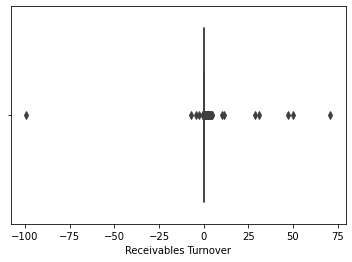

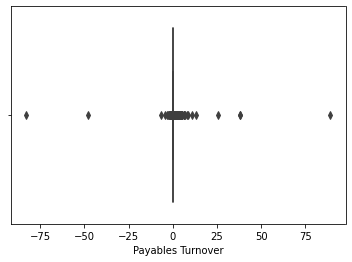

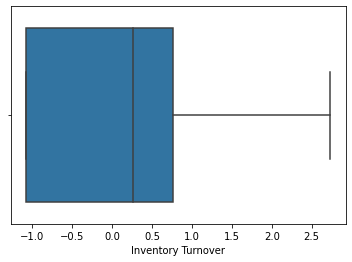

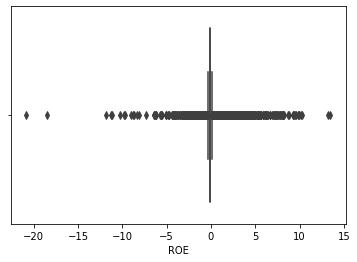

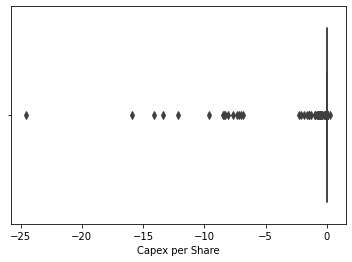

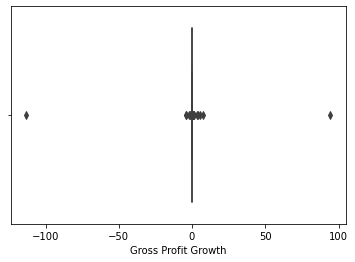

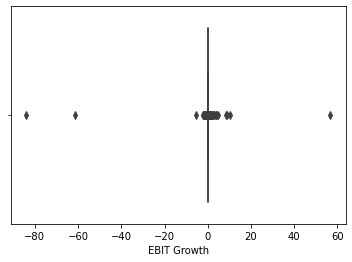

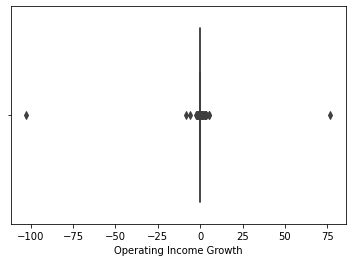

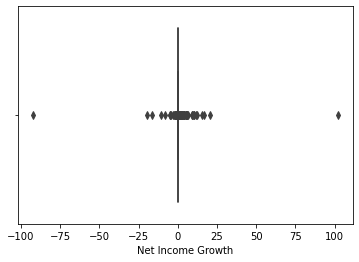

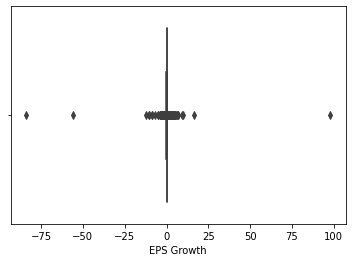

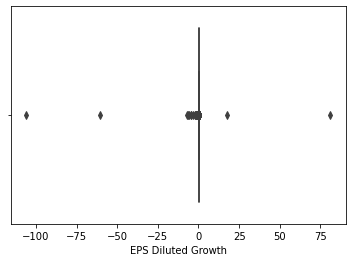

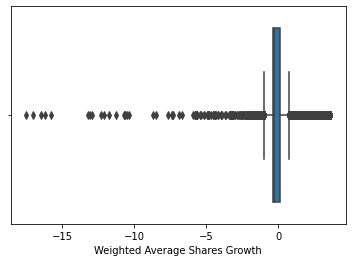

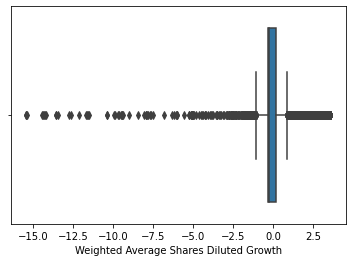

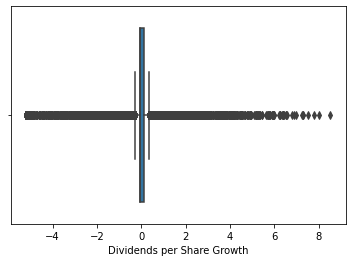

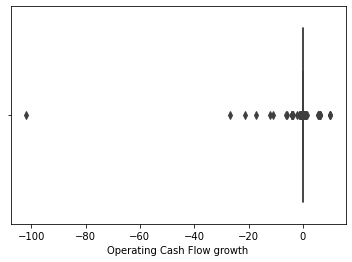

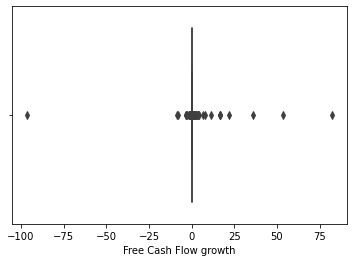

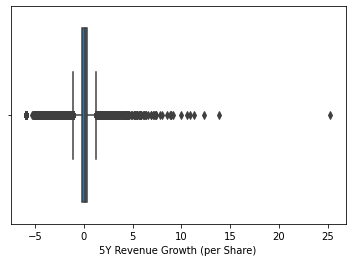

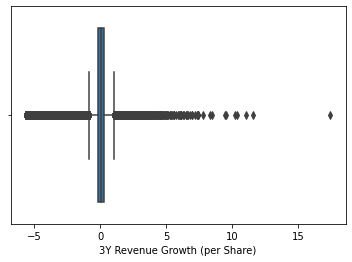

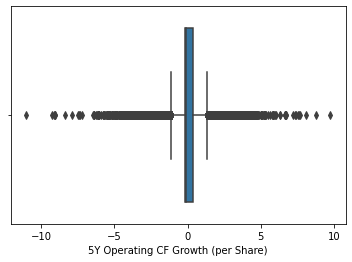

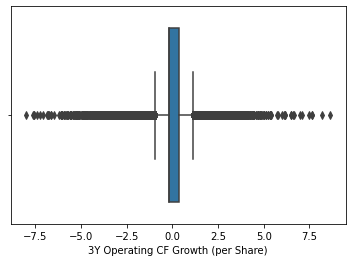

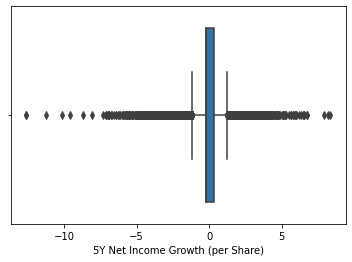

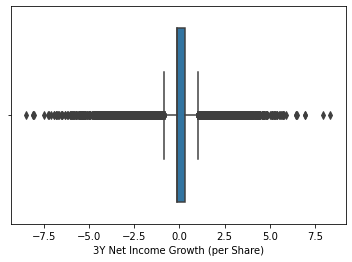

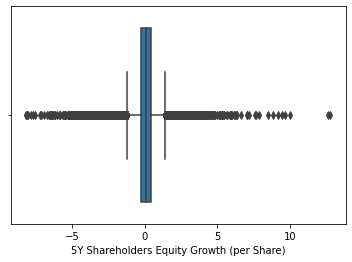

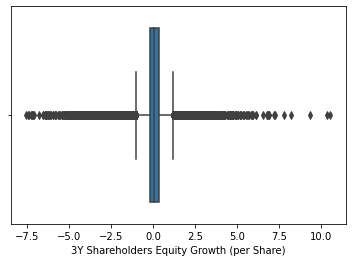

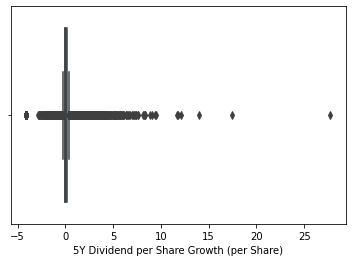

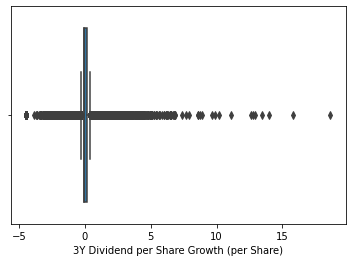

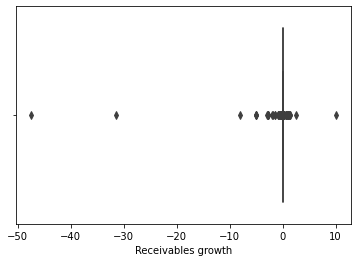

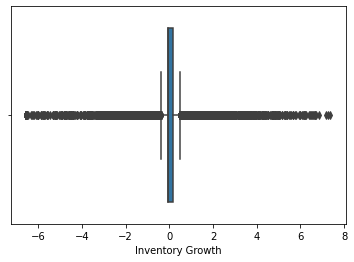

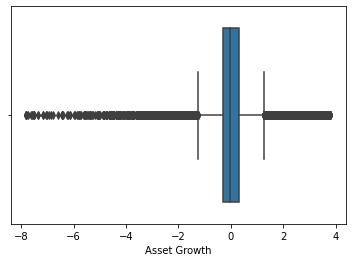

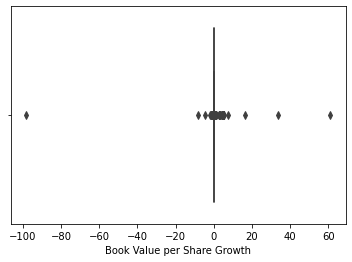

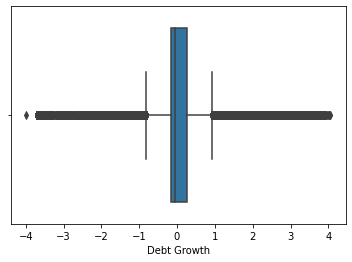

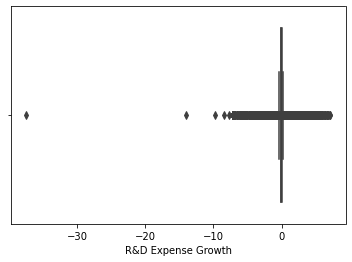

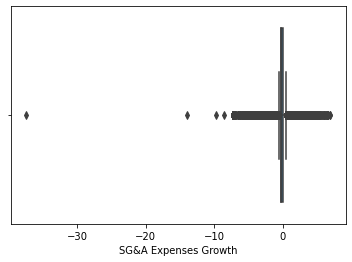

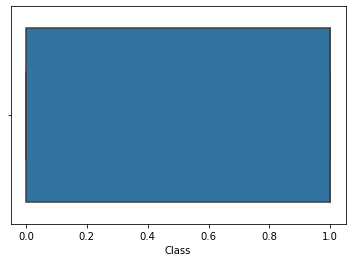

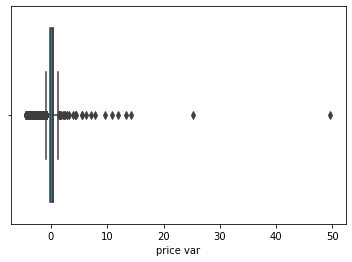

In [120]:
for i in df3.columns:
    sns.boxplot(df3[i])
    plt.show()
# we can see here still we have outliers even after dropping some of rows by doing Pyod

In [121]:
for i in df3.columns:
    print(i)
    print(df3[i].value_counts()/len(df3)*100)
    print()

Revenue
-0.252540    4.253848
 0.457226    0.161305
 0.354216    0.156696
 0.590178    0.138262
 0.606098    0.129044
               ...   
-0.252230    0.004609
-0.237790    0.004609
-0.145791    0.004609
-0.140160    0.004609
-0.234836    0.004609
Name: Revenue, Length: 19609, dtype: float64

Revenue Growth
-0.122509    4.544198
-1.474800    0.387132
-0.081714    0.078348
-0.093294    0.078348
-0.079374    0.069131
               ...   
 0.306167    0.004609
-0.397636    0.004609
-0.410688    0.004609
-0.765614    0.004609
-0.226949    0.004609
Name: Revenue Growth, Length: 9780, dtype: float64

Cost of Revenue
-0.169613    19.623928
-0.169169     0.336437
 0.923393     0.115218
 0.653327     0.110609
 1.043196     0.096783
               ...    
-0.154582     0.004609
-0.144679     0.004609
-0.030158     0.004609
-0.164657     0.004609
-0.096386     0.004609
Name: Cost of Revenue, Length: 16495, dtype: float64

Gross Profit
-0.256882    4.253848
 0.579167    0.212001
 0.555733    0.

-0.121968    20.978892
-0.121471     0.138262
-0.120251     0.119827
-0.087430     0.110609
-0.119500     0.101392
               ...    
-0.116532     0.004609
-0.084835     0.004609
-0.102540     0.004609
-0.105902     0.004609
-0.062925     0.004609
Name: Long-term debt, Length: 14270, dtype: float64

Total debt
-0.138156    16.333303
 0.037629     0.188958
 0.035312     0.179740
 0.031390     0.165914
 0.025185     0.147479
               ...    
-0.093790     0.004609
-0.118376     0.004609
-0.038354     0.004609
-0.131473     0.004609
-0.106160     0.004609
Name: Total debt, Length: 16586, dtype: float64

Deferred revenue
-0.068721    60.724491
-0.068385     0.474698
-0.068661     0.391741
-0.068385     0.248871
-0.068360     0.152088
               ...    
-0.068374     0.004609
-0.067668     0.004609
-0.068623     0.004609
-0.066968     0.004609
-0.068180     0.004609
Name: Deferred revenue, Length: 7293, dtype: float64

Tax Liabilities
-0.071384    42.404830
-0.071070     0.15

-0.005352    12.374412
-0.162431     1.599226
 1.278999     0.156696
 1.280110     0.152088
 1.273542     0.142870
               ...    
-0.038079     0.004609
-0.032515     0.004609
-0.052231     0.004609
-0.055002     0.004609
-0.024621     0.004609
Name: niperEBT, Length: 17857, dtype: float64

grossProfitMargin
 0.525614    15.535994
-0.256252     0.133653
-0.257518     0.087566
-0.367153     0.082957
-0.318869     0.078348
               ...    
 0.240746     0.004609
 0.054285     0.004609
-0.401395     0.004609
 0.106844     0.004609
-0.390530     0.004609
Name: grossProfitMargin, Length: 17631, dtype: float64

pretaxProfitMargin
0.109718    0.032261
0.102243    0.027652
0.098975    0.027652
0.097700    0.027652
0.106083    0.027652
              ...   
0.100093    0.004609
0.100905    0.004609
0.108489    0.004609
0.096406    0.004609
0.101828    0.004609
Name: pretaxProfitMargin, Length: 21335, dtype: float64

effectiveTaxRate
-0.006816    13.494331
-0.166293     0.170523
-0.

-0.001108    0.207392
-0.001098    0.193566
-0.001093    0.175131
-0.001088    0.165914
-0.001111    0.147479
               ...   
-0.001249    0.004609
-0.001164    0.004609
-0.001079    0.004609
-0.001110    0.004609
-0.001118    0.004609
Name: Book Value per Share, Length: 17019, dtype: float64

Tangible Book Value per Share
0.282581    0.207392
0.969086    0.193566
0.558778    0.175131
0.922515    0.165914
0.896142    0.147479
              ...   
1.224447    0.004609
0.633108    0.004609
0.975339    0.004609
1.364590    0.004609
0.784446    0.004609
Name: Tangible Book Value per Share, Length: 18646, dtype: float64

Shareholders Equity per Share
 0.126994    0.216610
 0.126496    0.207392
-0.024484    0.184349
 0.126995    0.170523
 0.127208    0.170523
               ...   
-0.024364    0.004609
-0.024382    0.004609
-0.024421    0.004609
-0.024476    0.004609
-0.024459    0.004609
Name: Shareholders Equity per Share, Length: 20433, dtype: float64

Interest Debt per Share
-0.656

-0.056796    11.885888
-0.008913     0.106001
-0.014672     0.064522
 0.013798     0.059913
 0.002430     0.059913
               ...    
-0.035269     0.004609
-0.035606     0.004609
-0.084823     0.004609
-0.019152     0.004609
 0.027536     0.004609
Name: Payables Turnover, Length: 17348, dtype: float64

Inventory Turnover
-1.081098    41.160476
 1.303111     0.156696
 0.725363     0.147479
 0.765148     0.115218
 0.640527     0.115218
               ...    
 0.215689     0.004609
 0.345140     0.004609
 0.978483     0.004609
 0.565201     0.004609
 0.937743     0.004609
Name: Inventory Turnover, Length: 11700, dtype: float64

ROE
 0.279839    0.207392
-0.137423    0.170523
 0.243918    0.142870
 0.244001    0.142870
 0.297876    0.133653
               ...   
-0.120773    0.004609
-0.353394    0.004609
-0.167260    0.004609
-0.259119    0.004609
-0.178722    0.004609
Name: ROE, Length: 20041, dtype: float64

Capex per Share
 0.017199    4.318370
 0.016421    0.212001
-0.067249    0

In [122]:
df3['Net Income - Non-Controlling int'].value_counts()/len(df3)*100

-0.052799    61.374320
-0.052662     0.525394
-0.054771     0.267306
-0.045653     0.207392
-0.038799     0.175131
               ...    
-0.441584     0.004609
 0.032622     0.004609
-0.592167     0.004609
-0.010102     0.004609
-0.053105     0.004609
Name: Net Income - Non-Controlling int, Length: 5838, dtype: float64

In [ ]:
# WE are labeling some of features which are only having whiskers in boxplot

In [123]:
df3['Net Income - Non-Controlling int'] = pd.qcut(df3['Net Income - Non-Controlling int'],q=2,labels=[1,2])

In [124]:
df3['EPS'] = pd.qcut(df3['EPS'],q=5,labels=[1,2,3,4,5])

In [125]:
df3['EBITDA Margin'] = pd.qcut(df3['EBITDA Margin'],q=5,labels=[1,2,3,4,5])

In [126]:
df3['ProfitMargin'] = pd.qcut(df3['Profit Margin'],q=5,labels=[1,2,3,4,5])

In [127]:
df3['Deferred revenue'] = pd.qcut(df3['Deferred revenue'],q=3,labels=[1,2,3])

In [128]:
df3['Tax Liabilities'] = pd.qcut(df3['Tax Liabilities'],q=4,labels=[1,2,3,4])

In [129]:
df3['Total non-current liabilities'] = pd.qcut(df3['Total non-current liabilities'],q=5,labels=[1,2,3,4,5])

In [130]:
df3['Other comprehensive income'] = pd.qcut(df3['Other comprehensive income'],q=6,labels=[1,2,3,4,5,6])

In [131]:
df3['Effect of forex changes on cash'] = pd.qcut(df3['Effect of forex changes on cash'],q=2,labels=[1,2])

In [132]:
df3['ebitperRevenue'] = pd.qcut(df3['ebitperRevenue'],q=5,labels=[1,2,3,4,5])

In [133]:
df3['interestCoverage'] = pd.qcut(df3['interestCoverage'],q=5,labels=[1,2,3,4,5])

In [134]:
df3['cashFlowToDebtRatio'] = pd.qcut(df3['cashFlowToDebtRatio'],q=5,labels=[1,2,3,4,5])

In [135]:
df3['operatingCashFlowPerShare'] = pd.qcut(df3['operatingCashFlowPerShare'],q=5,labels=[1,2,3,4,5])

In [136]:
df3['operatingCashFlowSalesRatio'] = pd.qcut(df3['operatingCashFlowSalesRatio'],q=5,labels=[1,2,3,4,5])

In [137]:
df3['cashFlowCoverageRatios'] = pd.qcut(df3['cashFlowCoverageRatios'],q=5,labels=[1,2,3,4,5])

In [138]:
df3['capitalExpenditureCoverageRatios'] = pd.qcut(df3['capitalExpenditureCoverageRatios'],q=5,labels=[1,2,3,4,5])

In [139]:
df3['dividendpaidAndCapexCoverageRatios'] = pd.qcut(df3['dividendpaidAndCapexCoverageRatios'],q=5,labels=[1,2,3,4,5])

In [140]:
df3 = df3.drop('Operating Cash Flow per Share',1)

In [141]:
df3['Net Income per Share'] = pd.qcut(df3['Net Income per Share'],q=5,labels=[1,2,3,4,5])

In [142]:
df3['Shareholders Equity per Share'] =  pd.qcut(df3['Shareholders Equity per Share'],q=5,labels=[1,2,3,4,5])

In [143]:
df3['Capex per Share'] =   pd.qcut(df3['Capex per Share'],q=5,labels=[1,2,3,4,5])

In [144]:
df1.select_dtypes(include=np.number).columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Class',
       'price var'],
      dtype='object', length=204)

In [587]:
df1['Cash per Share'].quantile(0.01)

-1.676180621264614

In [146]:
df3

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  R&D Expenses  \
0      2.972580       -0.193690         2.201857      3.503936     -0.130069   
1      0.005840        2.217011         0.021020     -0.114396      2.556356   
2      2.972580       -0.104988         2.201857      3.503936     -0.130069   
3      2.972580       -0.117380         2.201857      3.503936     -0.130069   
4      2.972580       -0.115161         2.201857      3.503936     -0.130069   
...         ...             ...              ...           ...           ...   
22059 -0.252540       -0.122509        -0.169613     -0.256882     -0.130069   
22060 -0.252369       -1.231725        -0.169613     -0.256731     -0.113350   
22061 -0.244782        0.074542        -0.165404     -0.253095     -0.123211   
22062 -0.252540       -0.122509        -0.169613     -0.256882     -0.097980   
22063 -0.245002       -0.099174        -0.169613     -0.246761      2.556356   

       SG&A Expense  Operating Expenses  Operating Income  Interest Expense  \
0          4.059390            4.053368          2.884123          2.403985   
1         -0.110574           -0.084300         -0.119494         -0.178492   
2          4.059390            4.053368          2.884123          2.403985   
3          4.059390            4.053368          0.066222          2.403985   
4          4.059390            4.053368          2.884123          2.403985   
...             ...                 ...               ...               ...   
22059     -0.297538           -0.272471         -0.167782         -0.181214   
22060     -0.296255           -0.270508         -0.173533         -0.210719   
22061     -0.294454           -0.270872         -0.160579         -0.206939   
22062     -0.296783           -0.268425         -0.181406         -0.210719   
22063     -0.277070           -0.249257         -0.199393         -0.210146   

       Earnings before Tax  Income Tax Expense  \
0                 3.224204            0.365298   
1                -0.075227           -0.013650   
2                 3.224204            0.365298   
3                -0.047205           -0.018912   
4                 3.224204            0.365298   
...                    ...                 ...   
22059            -0.158117           -0.019153   
22060            -0.152297           -0.019019   
22061            -0.139632           -0.018832   
22062            -0.160008           -0.019019   
22063            -0.178655           -0.018728   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                                    2                      -0.860747   
1                                    1                       0.008922   
2                                    2                       0.008922   
3                                    1                       0.008922   
4                                    2                       0.008922   
...                                ...                            ...   
22059                                1                       0.008922   
22060                                1                       0.008922   
22061                                2                       0.008922   
22062                                1                       0.008922   
22063                                1                       0.008922   

       Net Income  Preferred Dividends EPS  EPS Diluted  \
0        2.339141            -0.065133   5     0.003542   
1       -0.046502            -0.065133   2     0.003525   
2        2.339141            -0.065133   4     0.003530   
3       -0.005326             1.515222   5     0.003544   
4        2.339141            -0.065133   5     0.003536   
...           ...                  ...  ..          ...   
22059   -0.111997            -0.065133   2     0.003523   
22060   -0.107176            -0.065133   1     0.003520   
22061   -0.094898            -0.065133   3     0.003526   
22062   -0.115133            -

In [147]:
# CApping - Winsorization
# we did the capping for the remaining features to remove outliers 

for i in df3.columns:
    q1=df3[i].quantile(0.25)
    q3=df3[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=df3[i].quantile(0.99)
    lc=df3[i].quantile(0.01)
    for ind1 in df3[i].index:
        if df3.loc[ind1,i]>ub:
            df3.loc[ind1,i]=uc
        if df3.loc[ind1,i]<lb:
            df3.loc[ind1,i]=lc

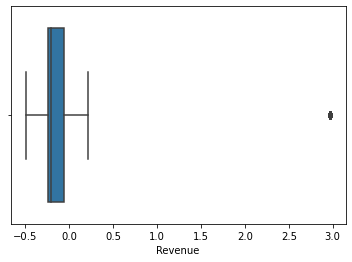

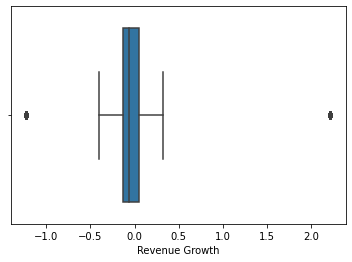

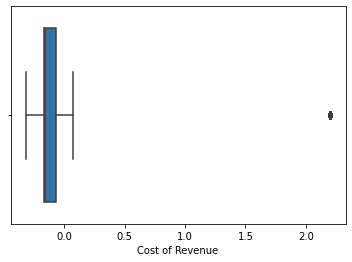

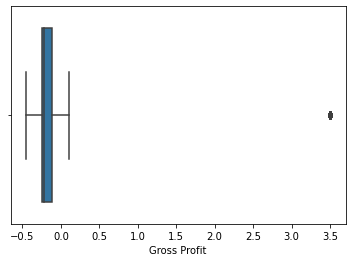

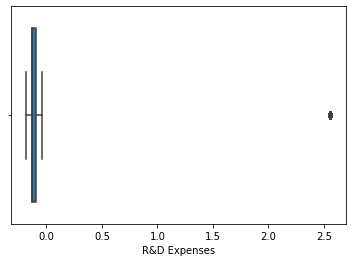

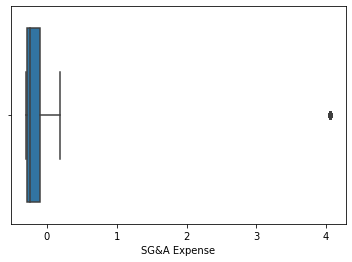

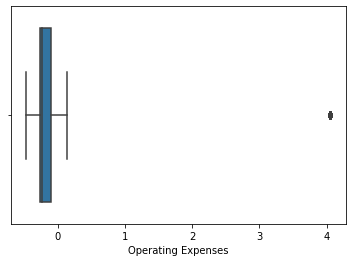

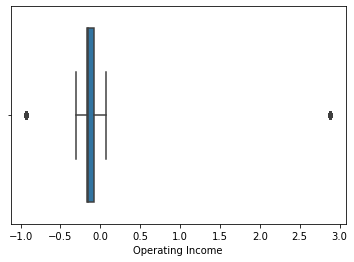

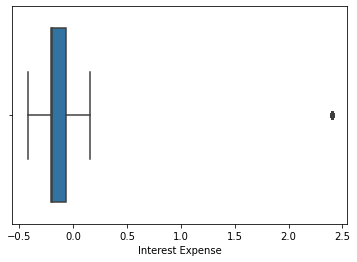

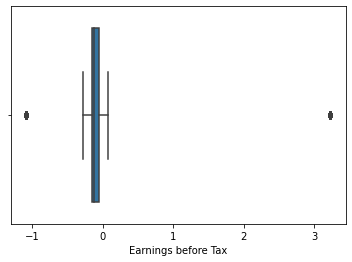

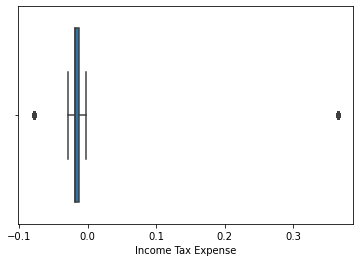

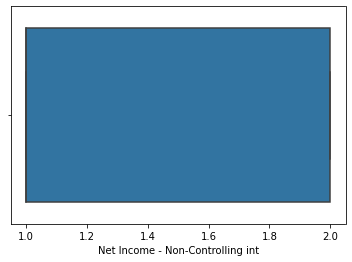

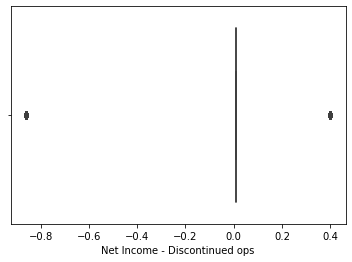

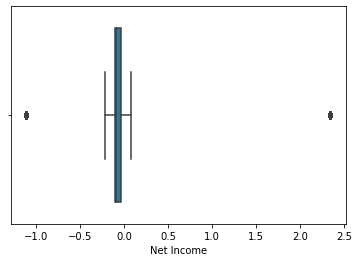

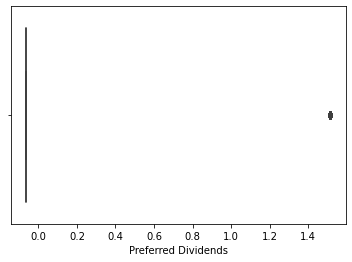

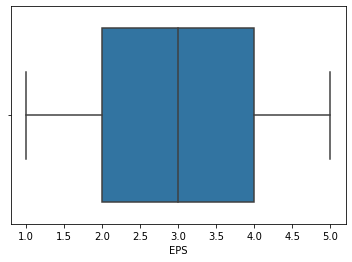

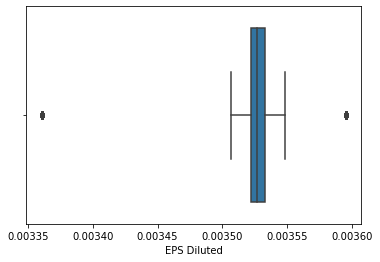

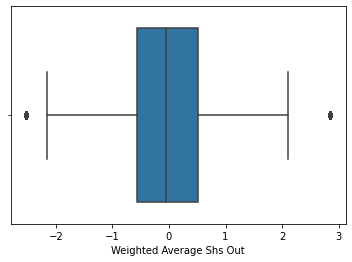

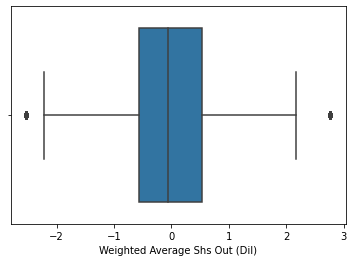

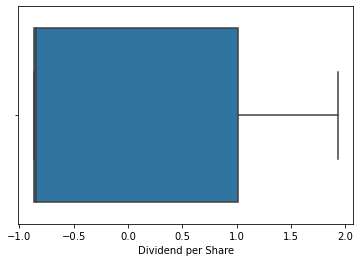

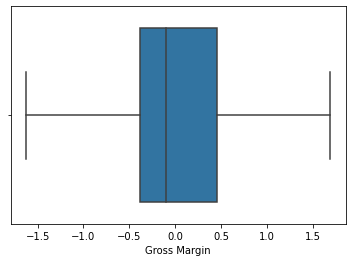

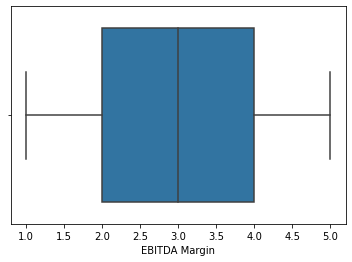

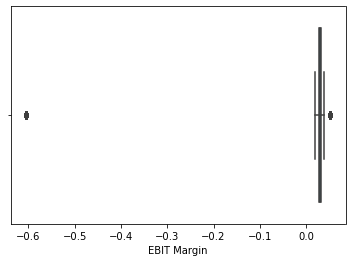

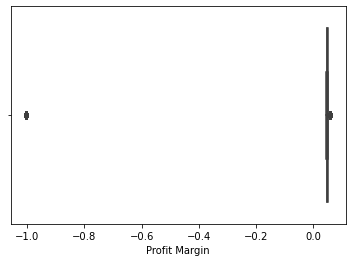

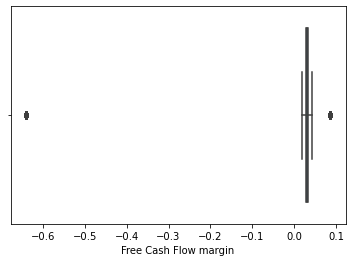

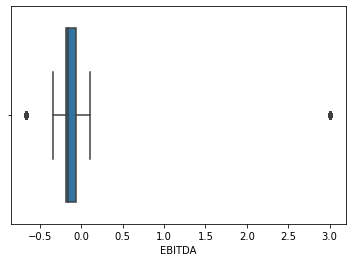

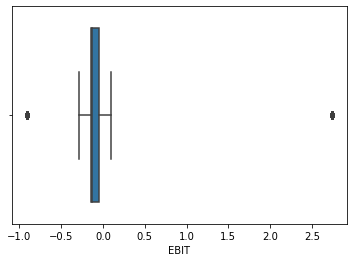

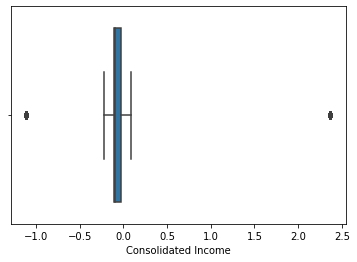

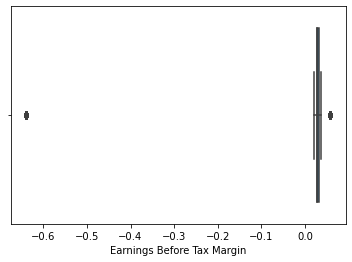

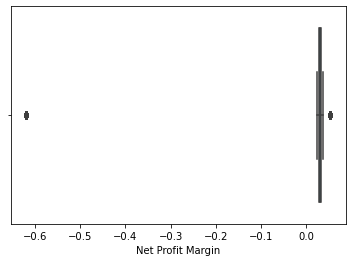

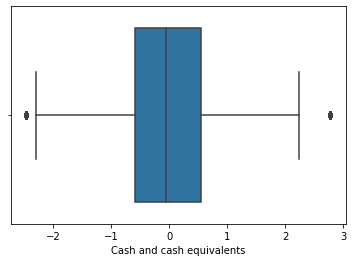

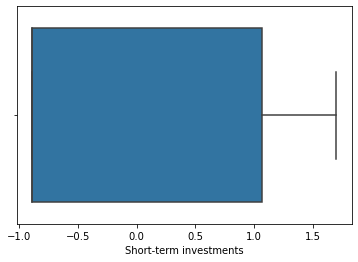

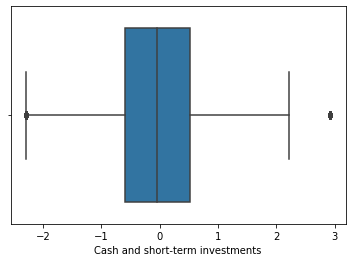

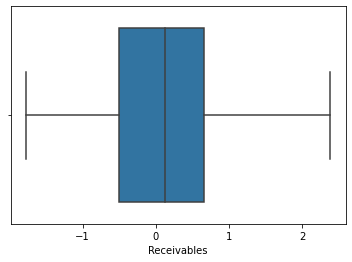

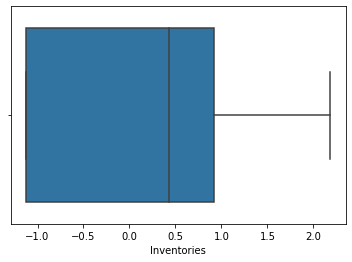

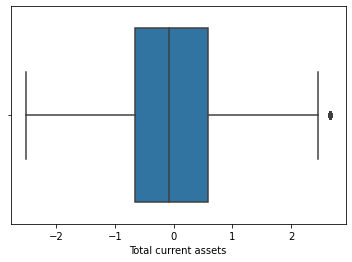

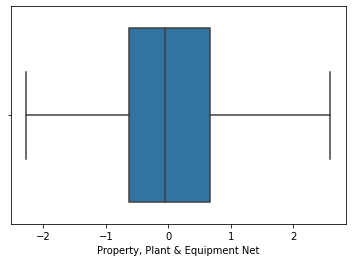

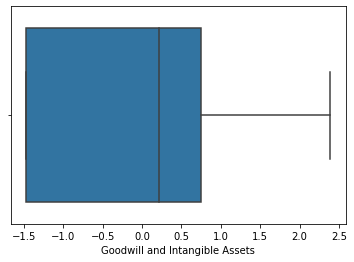

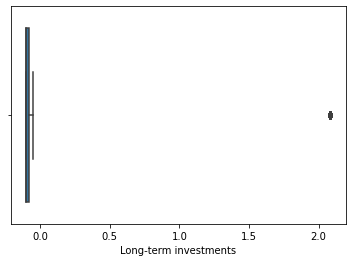

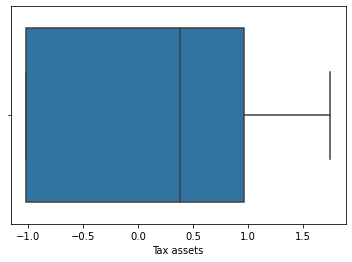

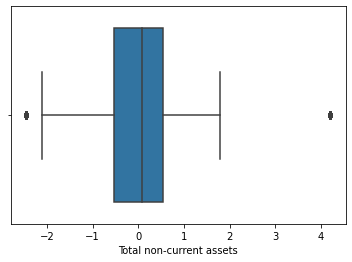

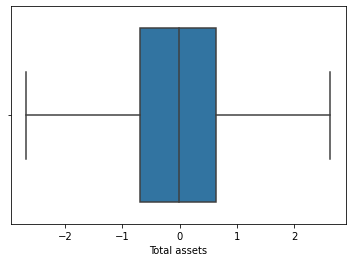

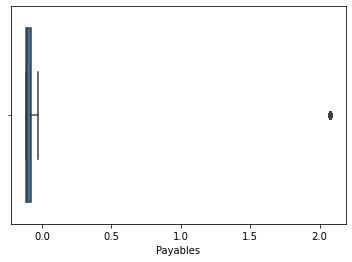

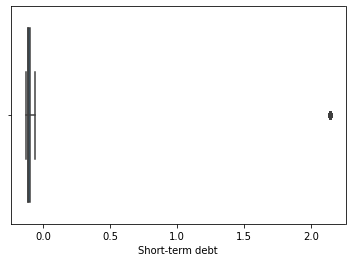

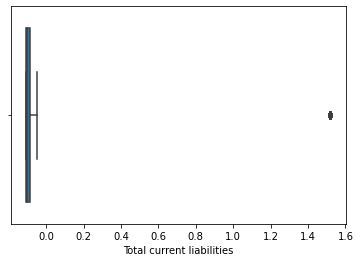

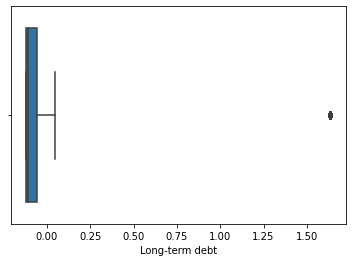

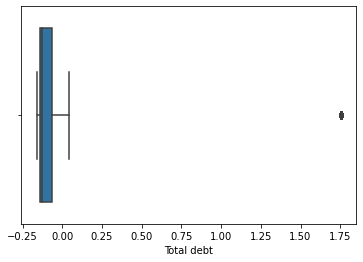

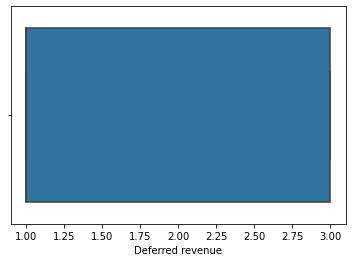

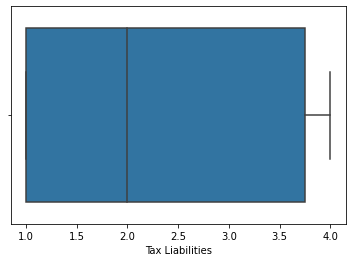

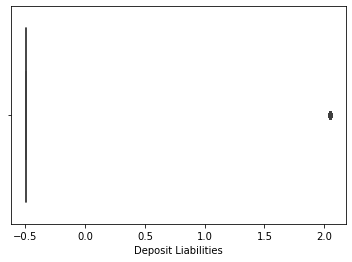

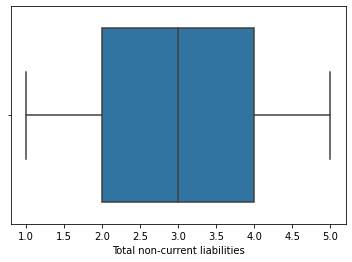

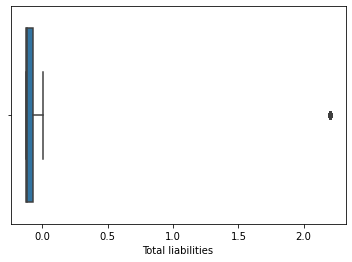

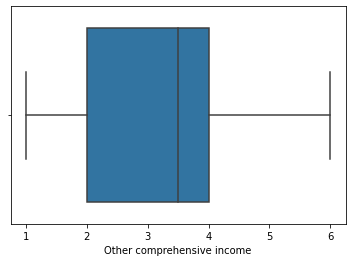

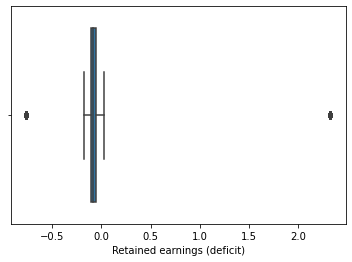

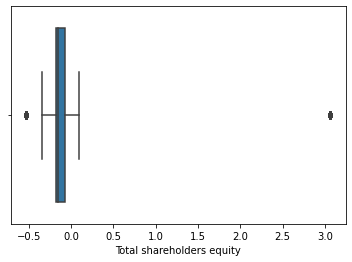

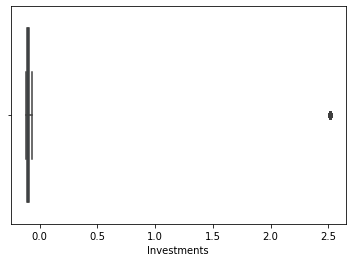

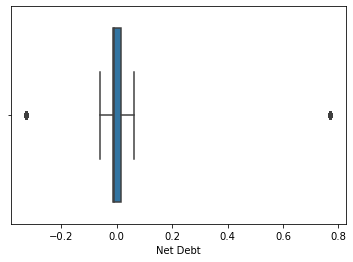

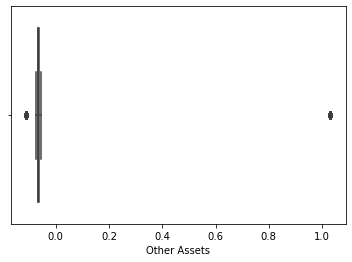

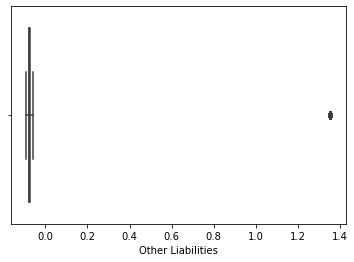

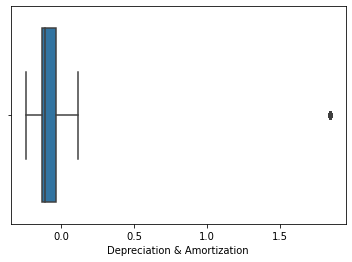

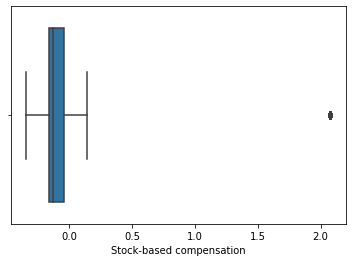

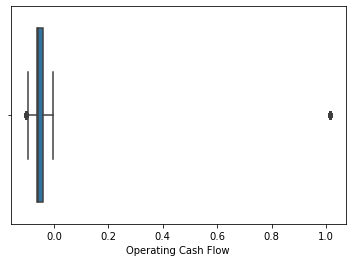

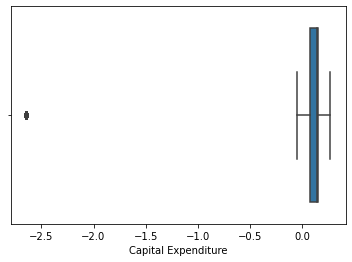

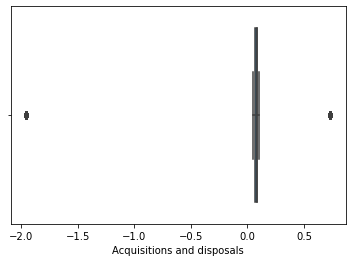

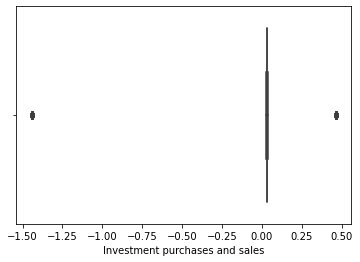

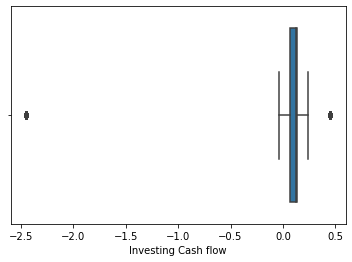

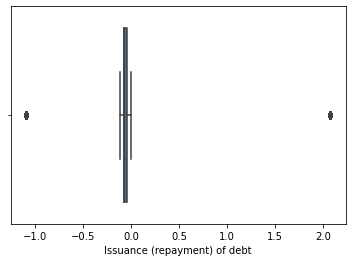

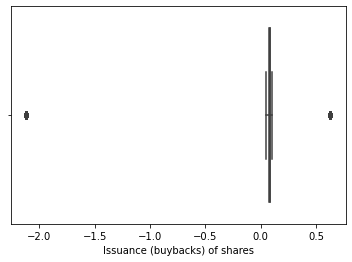

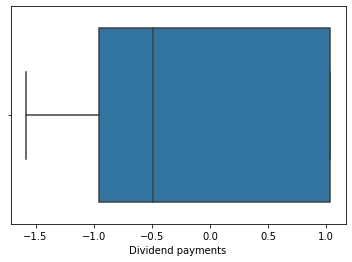

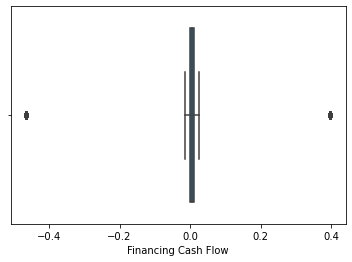

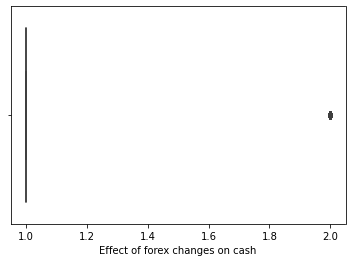

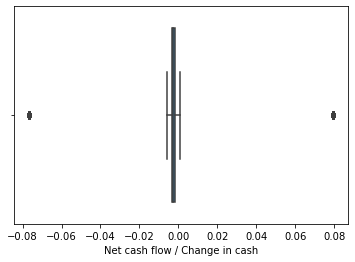

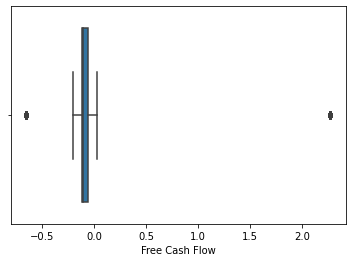

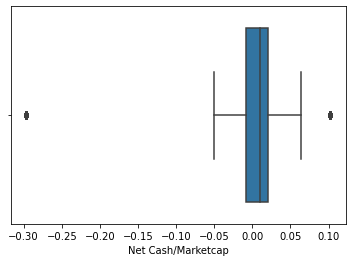

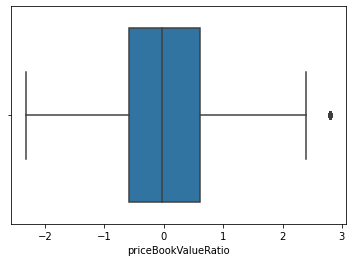

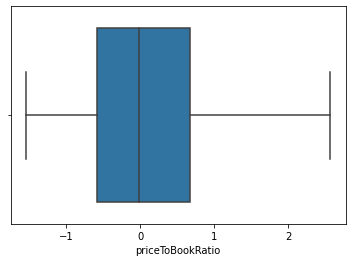

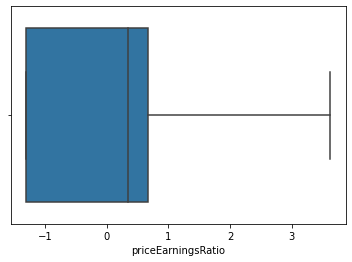

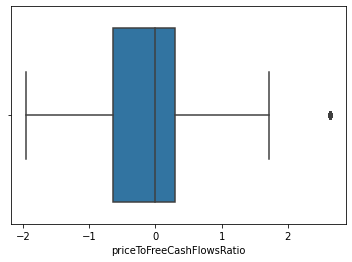

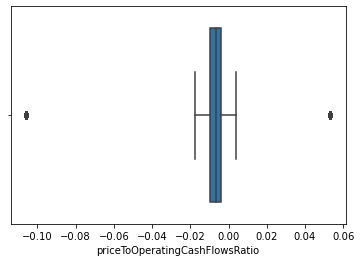

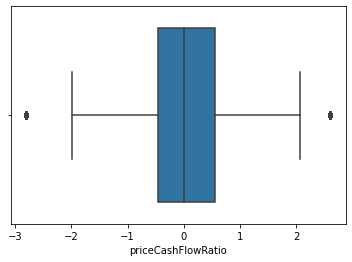

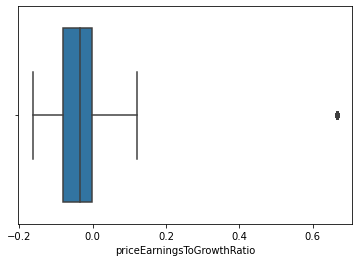

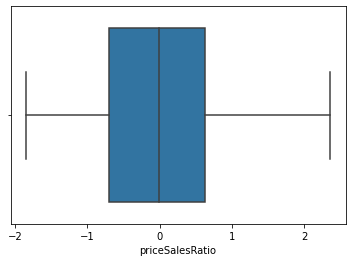

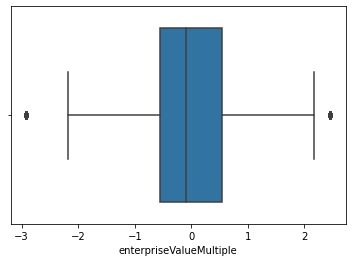

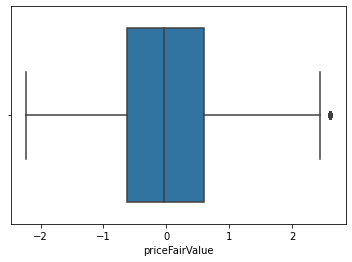

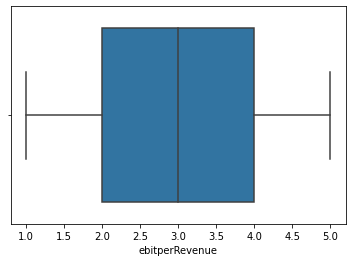

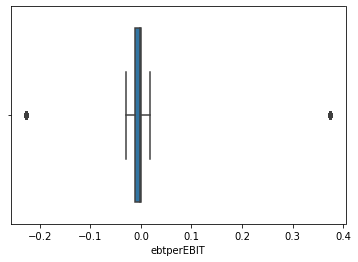

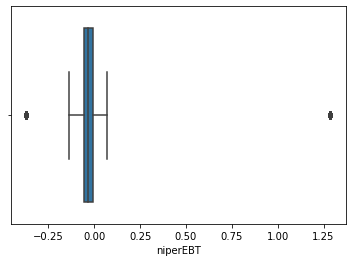

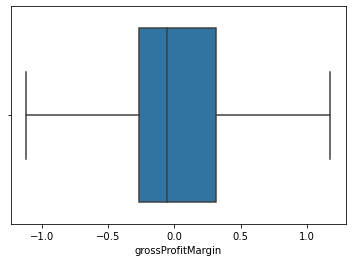

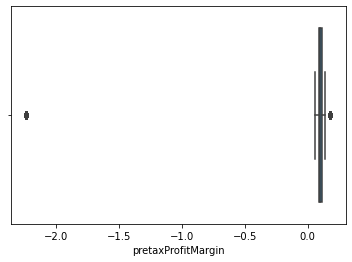

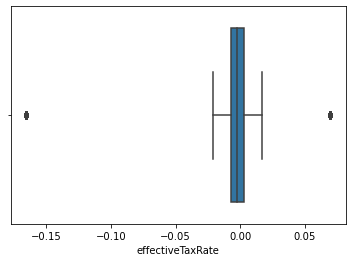

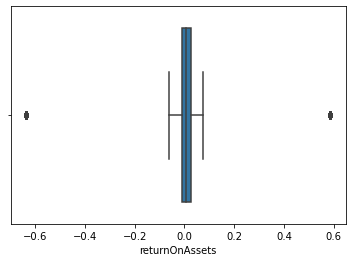

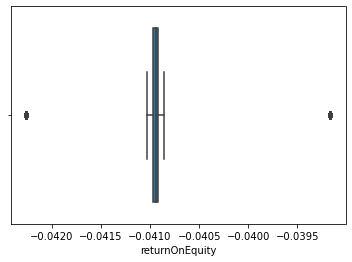

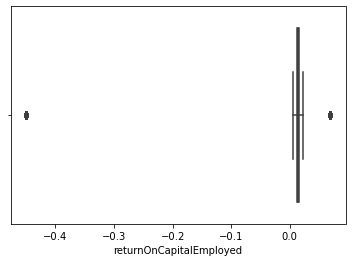

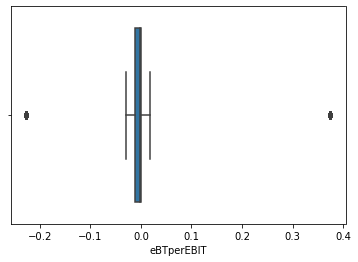

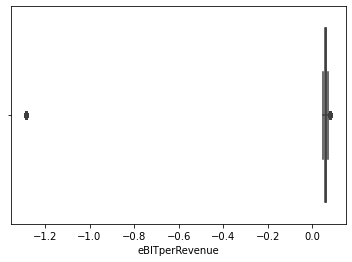

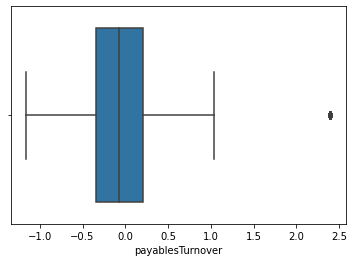

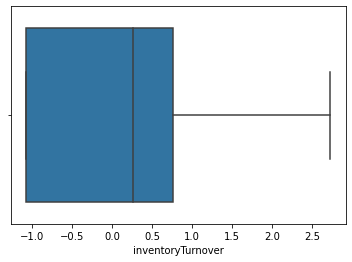

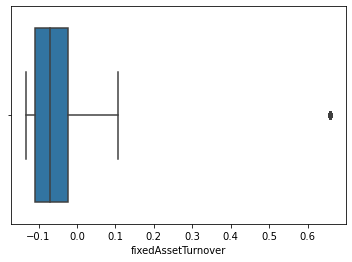

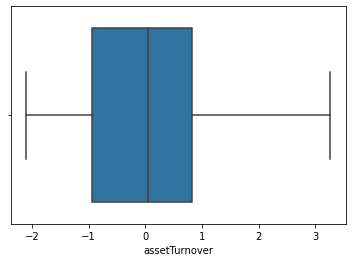

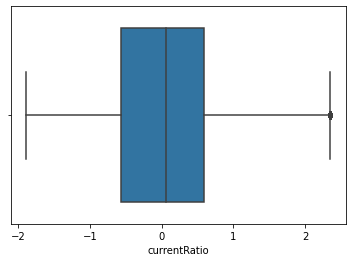

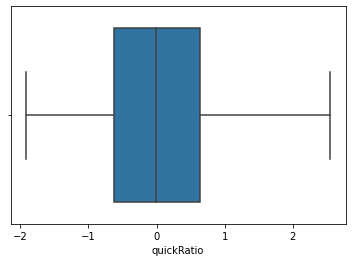

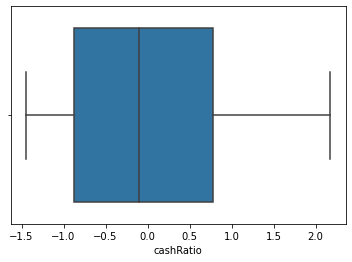

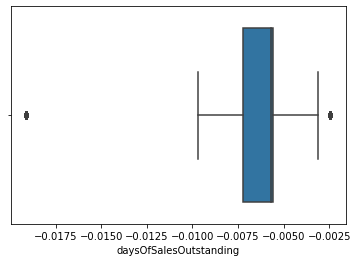

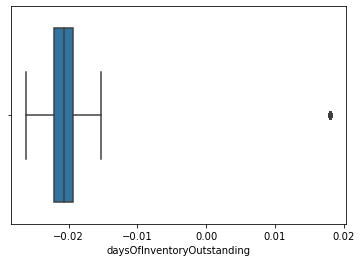

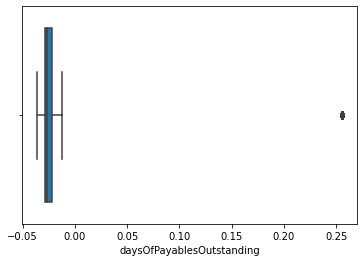

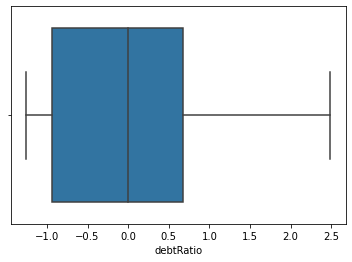

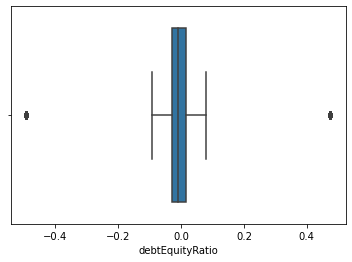

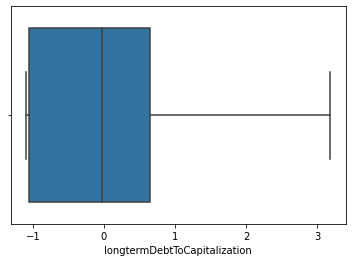

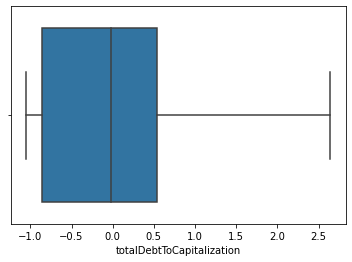

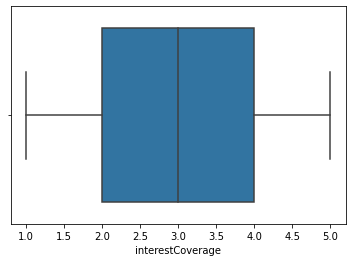

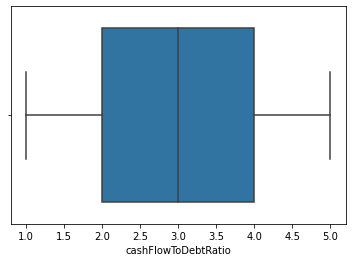

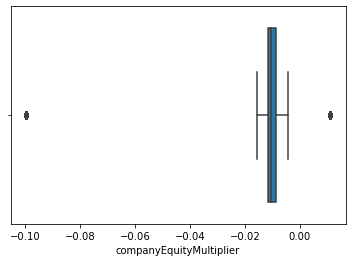

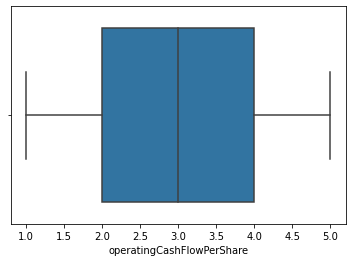

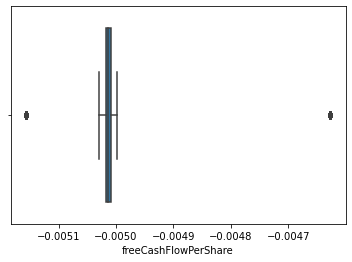

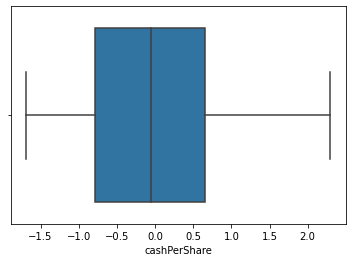

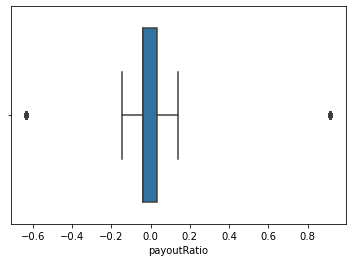

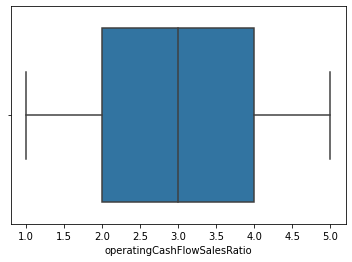

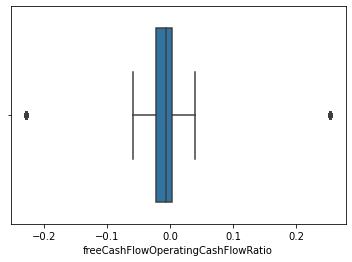

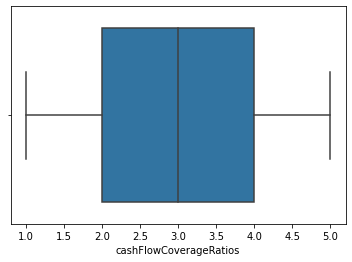

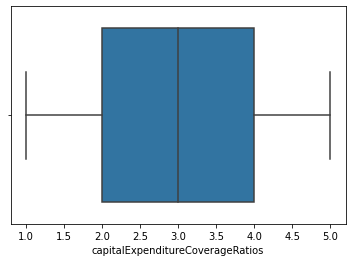

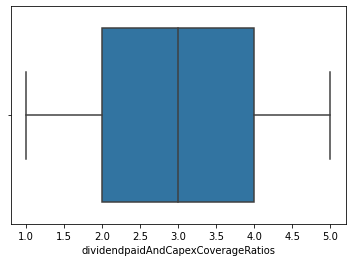

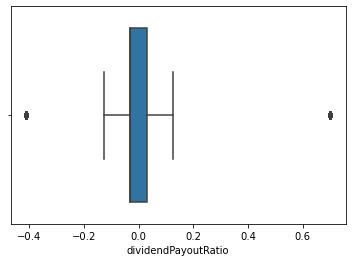

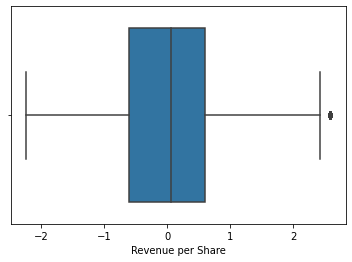

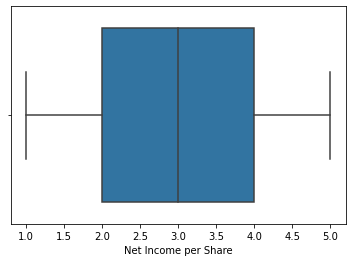

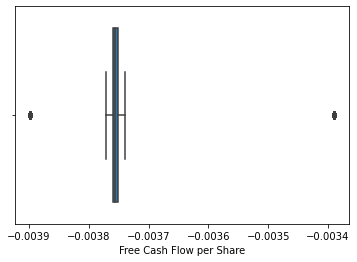

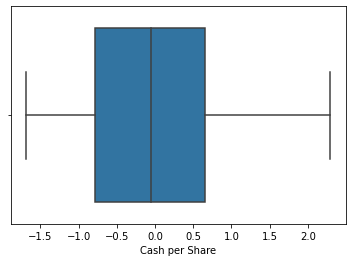

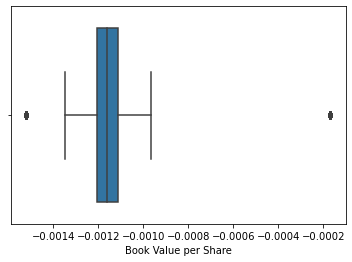

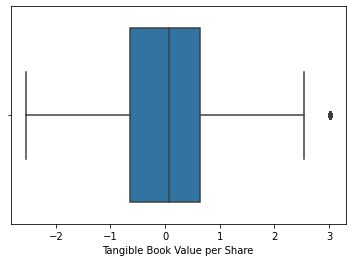

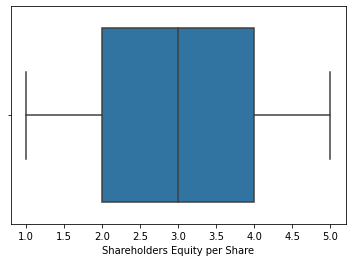

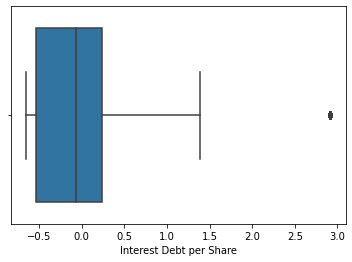

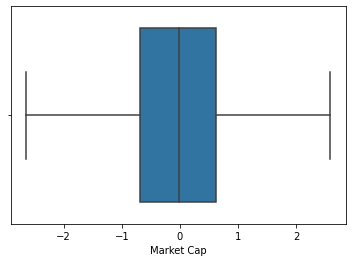

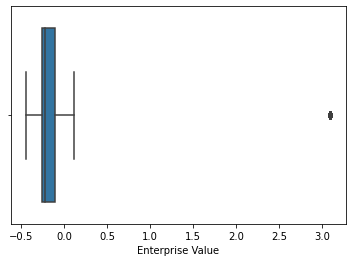

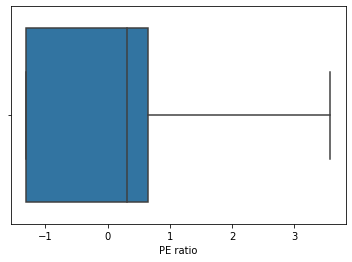

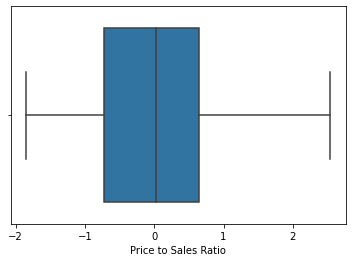

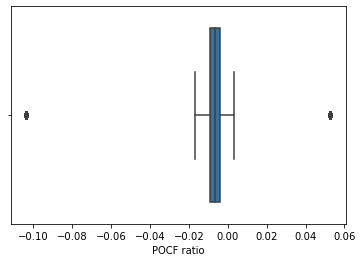

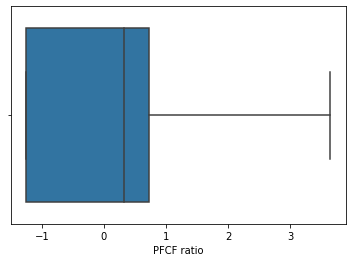

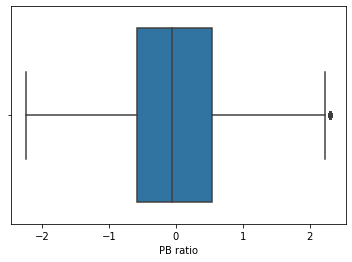

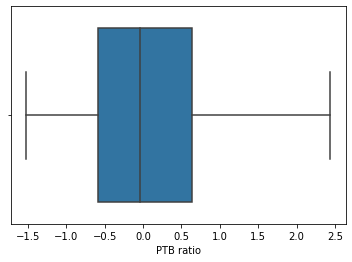

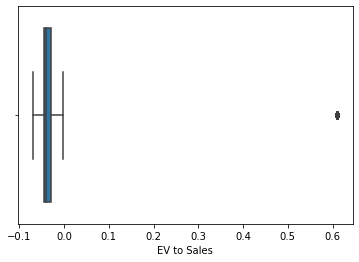

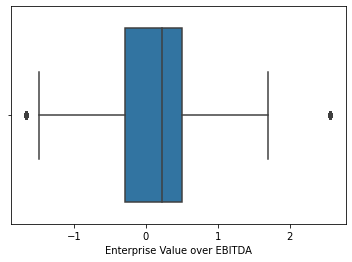

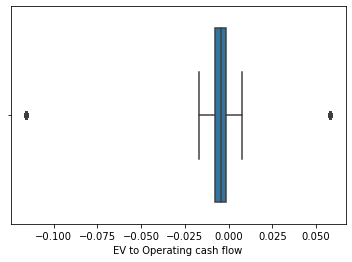

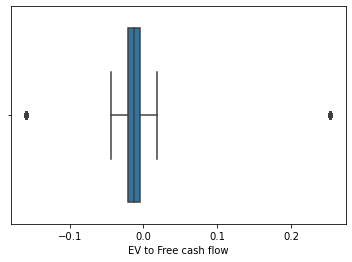

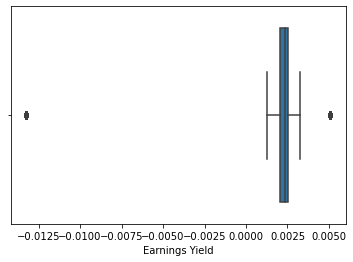

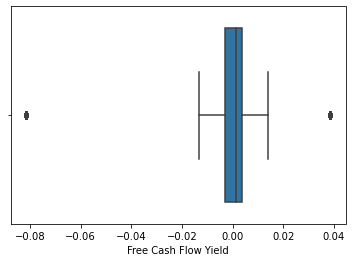

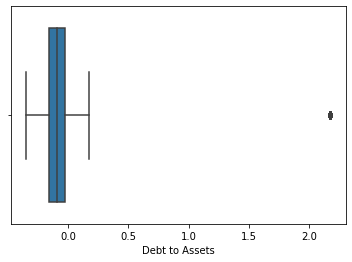

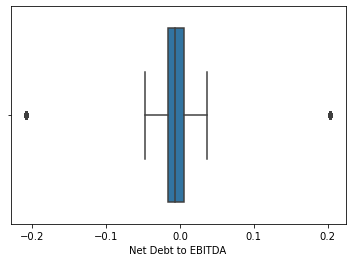

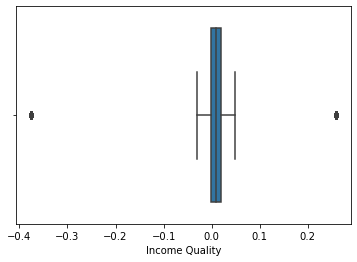

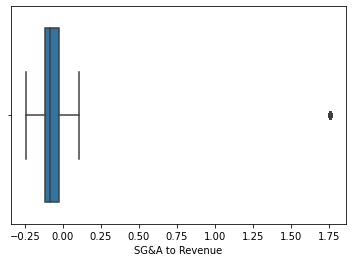

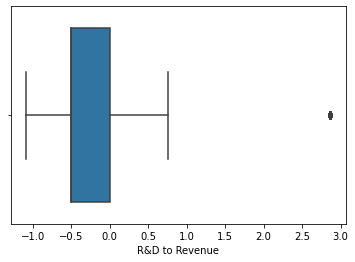

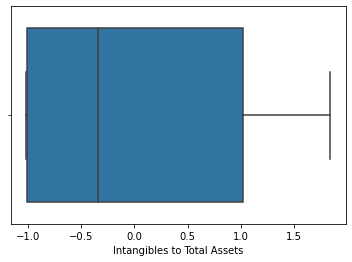

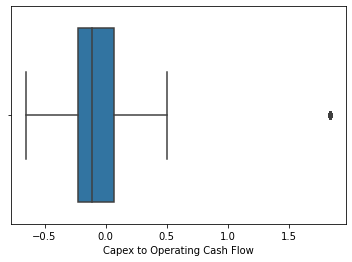

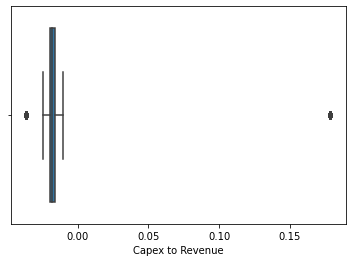

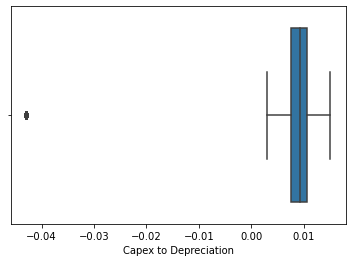

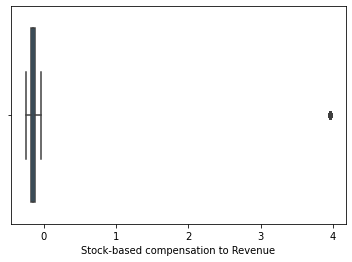

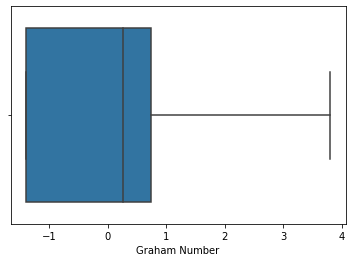

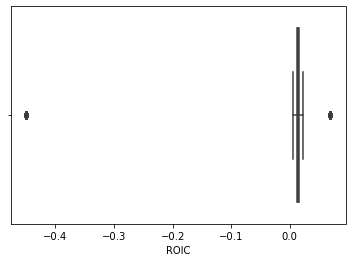

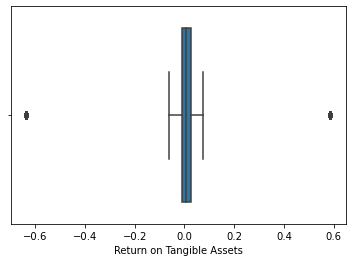

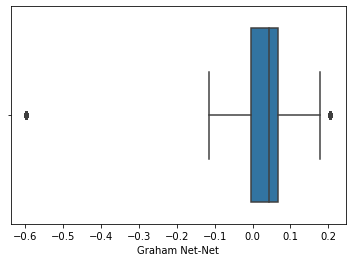

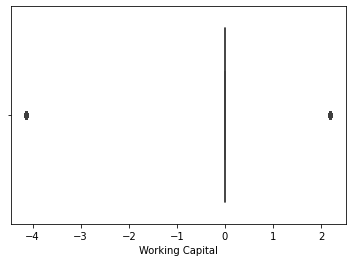

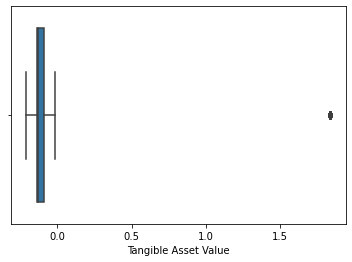

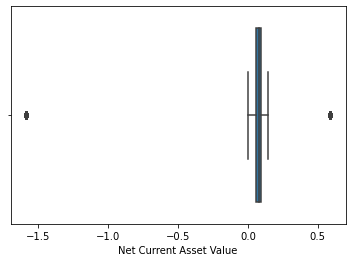

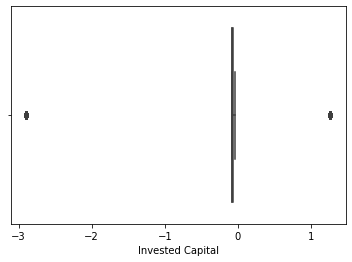

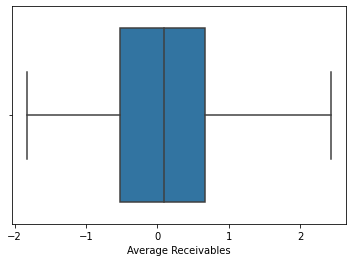

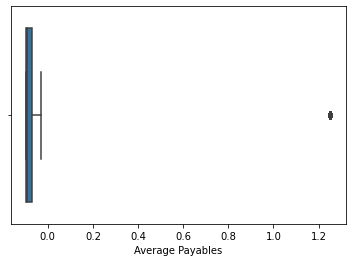

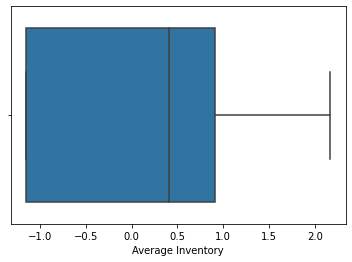

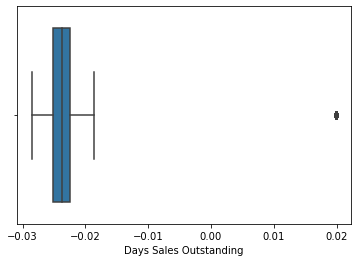

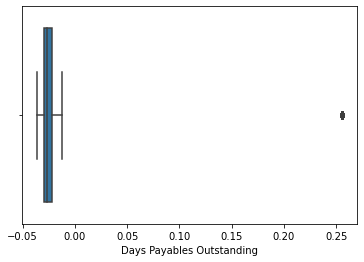

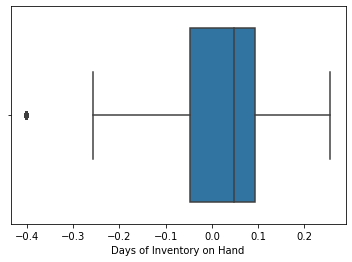

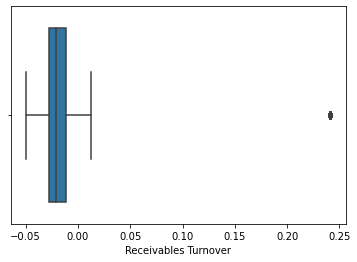

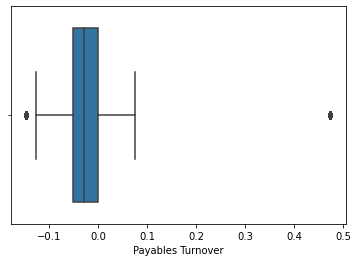

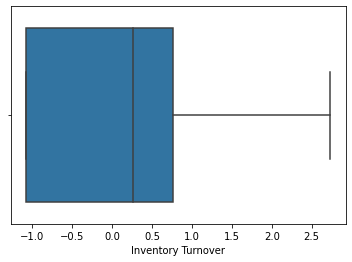

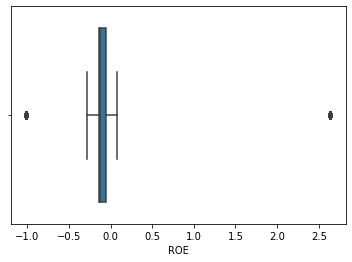

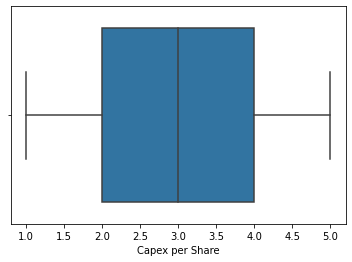

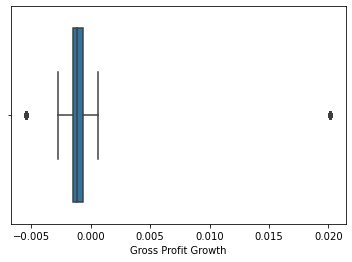

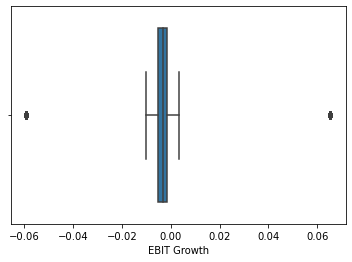

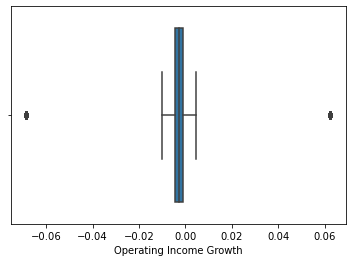

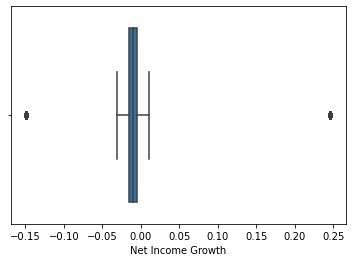

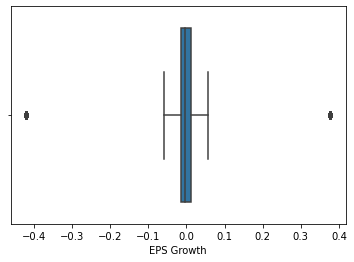

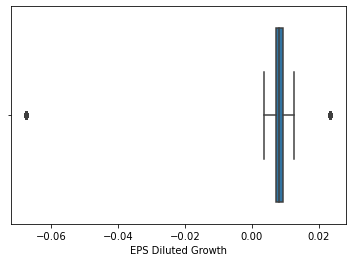

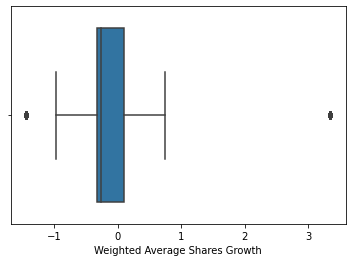

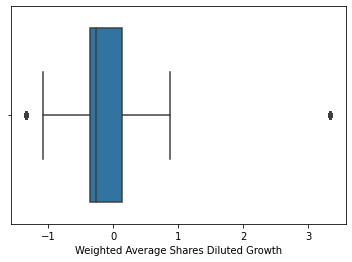

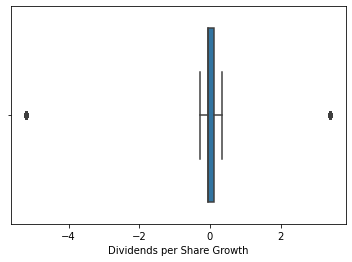

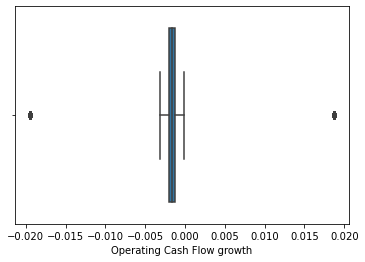

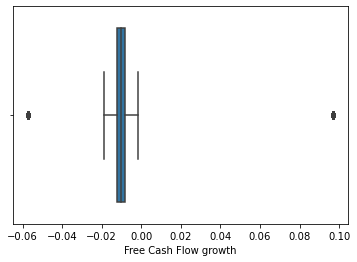

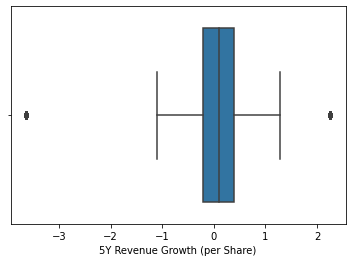

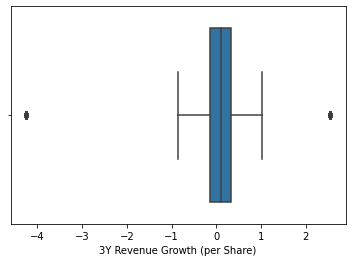

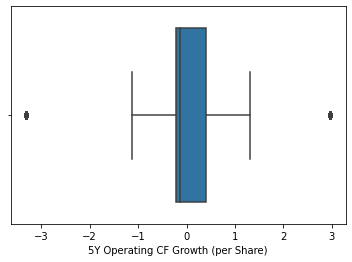

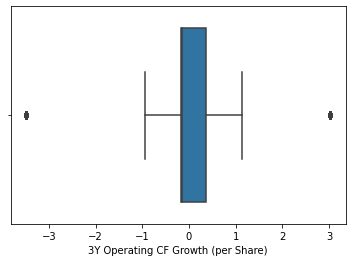

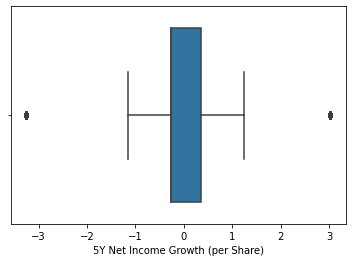

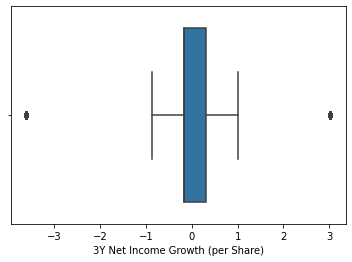

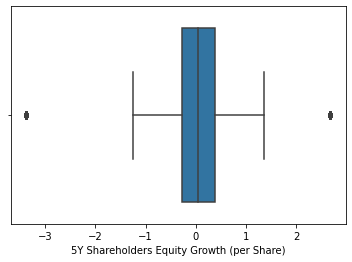

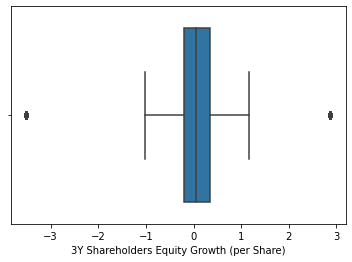

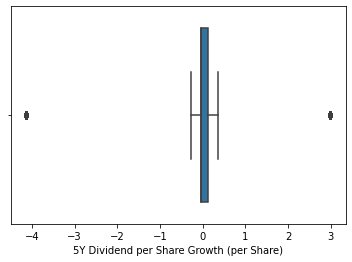

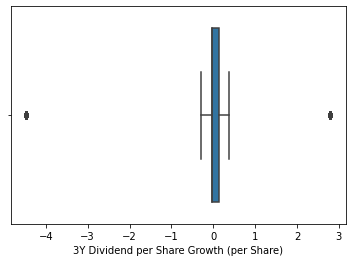

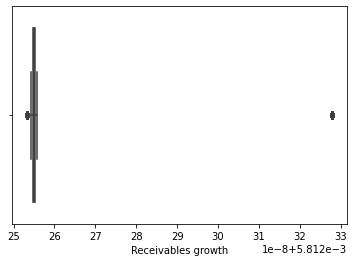

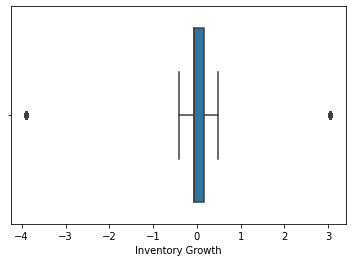

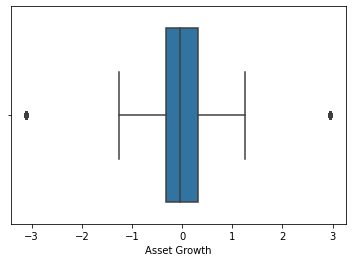

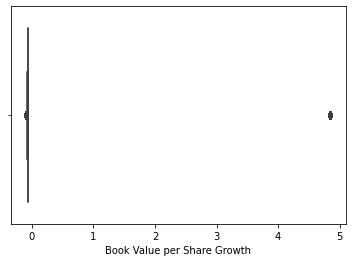

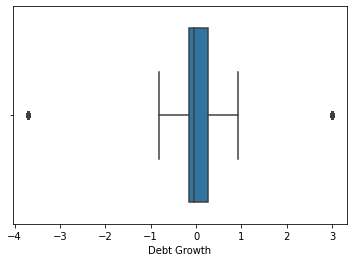

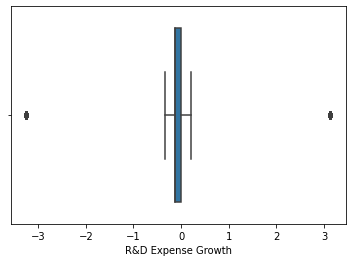

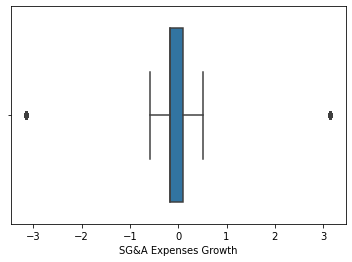

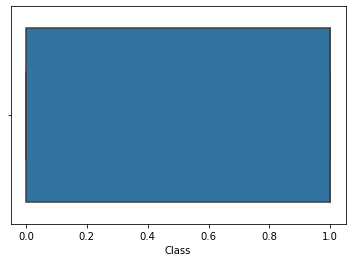

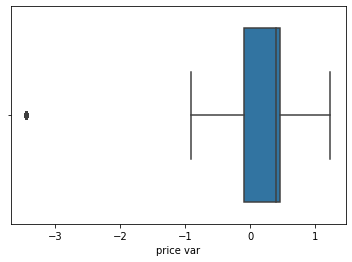

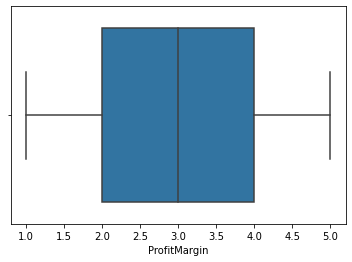

In [148]:
for i in df3.columns:
    sns.boxplot(df3[i])
    plt.show()

In [149]:
df3 = df3.drop('Net Income - Discontinued ops',1)

In [150]:
df3 = df3.drop('Deposit Liabilities',1)

In [151]:
df3 = df3.drop('Preferred Dividends',1)

In [152]:
df3['Sector']=sector

In [153]:
df4 = pd.get_dummies(df3,drop_first=True)

In [154]:
df4['Class'] = df['Class']

In [155]:
df4

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  R&D Expenses  \
0      2.972580       -0.193690         2.201857      3.503936     -0.130069   
1      0.005840        2.217011         0.021020     -0.114396      2.556356   
2      2.972580       -0.104988         2.201857      3.503936     -0.130069   
3      2.972580       -0.117380         2.201857      3.503936     -0.130069   
4      2.972580       -0.115161         2.201857      3.503936     -0.130069   
...         ...             ...              ...           ...           ...   
22059 -0.252540       -0.122509        -0.169613     -0.256882     -0.130069   
22060 -0.252369       -1.231725        -0.169613     -0.256731     -0.113350   
22061 -0.244782        0.074542        -0.165404     -0.253095     -0.123211   
22062 -0.252540       -0.122509        -0.169613     -0.256882     -0.097980   
22063 -0.245002       -0.099174        -0.169613     -0.246761      2.556356   

       SG&A Expense  Operating Expenses  Operating Income  Interest Expense  \
0          4.059390            4.053368          2.884123          2.403985   
1         -0.110574           -0.084300         -0.119494         -0.178492   
2          4.059390            4.053368          2.884123          2.403985   
3          4.059390            4.053368          0.066222          2.403985   
4          4.059390            4.053368          2.884123          2.403985   
...             ...                 ...               ...               ...   
22059     -0.297538           -0.272471         -0.167782         -0.181214   
22060     -0.296255           -0.270508         -0.173533         -0.210719   
22061     -0.294454           -0.270872         -0.160579         -0.206939   
22062     -0.296783           -0.268425         -0.181406         -0.210719   
22063     -0.277070           -0.249257         -0.199393         -0.210146   

       Earnings before Tax  Income Tax Expense  Net Income  EPS Diluted  \
0                 3.224204            0.365298    2.339141     0.003542   
1                -0.075227           -0.013650   -0.046502     0.003525   
2                 3.224204            0.365298    2.339141     0.003530   
3                -0.047205           -0.018912   -0.005326     0.003544   
4                 3.224204            0.365298    2.339141     0.003536   
...                    ...                 ...         ...          ...   
22059            -0.158117           -0.019153   -0.111997     0.003523   
22060            -0.152297           -0.019019   -0.107176     0.003520   
22061            -0.139632           -0.018832   -0.094898     0.003526   
22062            -0.160008           -0.019019   -0.115133     0.003523   
22063            -0.178655           -0.018728   -0.136784     0.003519   

       Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0                      2.852266                        2.766026   
1                      0.073201                       -0.544011   
2                      1.928072                        1.858813   
3                     -0.007735                       -0.016663   
4                      1.576006                        1.518588   
...                         ...                             ...   
22059                 -0.724645                        0.722023   
22060                 -0.880796                       -0.860153   
22061                 -0.738984                       -0.698546   
22062                  0.390305                        0.359201   
22063                 -0.244602                       -0.296045   

       Dividend per Share  Gross Margin  EBIT Margin  Profit Margin  \
0                1.693594     -0.055221     0.031684       0.049833   
1               -0.869082     -0.405999     0.028066       0.048210   
2                0.288254     -0.470648     0.027546       0.048309   
3               -0.869082     -0.348045     0.027518       0.048234   
4                1.497449     -0.2424

In [335]:
df4.to_excel('stocks_till_pyod.xlsx')

### Base Model

In [7]:
df4 = pd.read_excel('stocks_till_pyod.xlsx')

In [8]:
df5 = pd.get_dummies(df,drop_first=True)
inp = df5.drop(['Class'],1)
out= df5['Class']

In [172]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred1=lr.predict(xtest)

In [173]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
print(classification_report(ytest,ypred1)) 

              precision    recall  f1-score   support

           0       0.68      0.03      0.06      3015
           1       0.55      0.99      0.71      3605

    accuracy                           0.55      6620
   macro avg       0.61      0.51      0.38      6620
weighted avg       0.61      0.55      0.41      6620



### PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
x = df4.drop(['Class','price var','Unnamed: 0'],1)

In [11]:
x

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  R&D Expenses  \
0      2.972580       -0.193690         2.201857      3.503936     -0.130069   
1      0.005840        2.217011         0.021020     -0.114396      2.556356   
2      2.972580       -0.104988         2.201857      3.503936     -0.130069   
3      2.972580       -0.117380         2.201857      3.503936     -0.130069   
4      2.972580       -0.115161         2.201857      3.503936     -0.130069   
...         ...             ...              ...           ...           ...   
21693 -0.252540       -0.122509        -0.169613     -0.256882     -0.130069   
21694 -0.252369       -1.231725        -0.169613     -0.256731     -0.113350   
21695 -0.244782        0.074542        -0.165404     -0.253095     -0.123211   
21696 -0.252540       -0.122509        -0.169613     -0.256882     -0.097980   
21697 -0.245002       -0.099174        -0.169613     -0.246761      2.556356   

       SG&A Expense  Operating Expenses  Operating Income  Interest Expense  \
0          4.059390            4.053368          2.884123          2.403985   
1         -0.110574           -0.084300         -0.119494         -0.178492   
2          4.059390            4.053368          2.884123          2.403985   
3          4.059390            4.053368          0.066222          2.403985   
4          4.059390            4.053368          2.884123          2.403985   
...             ...                 ...               ...               ...   
21693     -0.297538           -0.272471         -0.167782         -0.181214   
21694     -0.296255           -0.270508         -0.173533         -0.210719   
21695     -0.294454           -0.270872         -0.160579         -0.206939   
21696     -0.296783           -0.268425         -0.181406         -0.210719   
21697     -0.277070           -0.249257         -0.199393         -0.210146   

       Earnings before Tax  Income Tax Expense  Net Income  EPS Diluted  \
0                 3.224204            0.365298    2.339141     0.003542   
1                -0.075227           -0.013650   -0.046502     0.003525   
2                 3.224204            0.365298    2.339141     0.003530   
3                -0.047205           -0.018912   -0.005326     0.003544   
4                 3.224204            0.365298    2.339141     0.003536   
...                    ...                 ...         ...          ...   
21693            -0.158117           -0.019153   -0.111997     0.003523   
21694            -0.152297           -0.019019   -0.107176     0.003520   
21695            -0.139632           -0.018832   -0.094898     0.003526   
21696            -0.160008           -0.019019   -0.115133     0.003523   
21697            -0.178655           -0.018728   -0.136784     0.003519   

       Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0                      2.852266                        2.766026   
1                      0.073201                       -0.544011   
2                      1.928072                        1.858813   
3                     -0.007735                       -0.016663   
4                      1.576006                        1.518588   
...                         ...                             ...   
21693                 -0.724645                        0.722023   
21694                 -0.880796                       -0.860153   
21695                 -0.738984                       -0.698546   
21696                  0.390305                        0.359201   
21697                 -0.244602                       -0.296045   

       Dividend per Share  Gross Margin  EBIT Margin  Profit Margin  \
0                1.693594     -0.055221     0.031684       0.049833   
1               -0.869082     -0.405999     0.028066       0.048210   
2                0.288254     -0.470648     0.027546       0.048309   
3               -0.869082     -0.348045     0.027518       0.048234   
4                1.497449     -0.2424

In [9]:
df4['Class']

0        0
1        0
2        1
3        1
4        1
        ..
21693    0
21694    0
21695    0
21696    0
21697    1
Name: Class, Length: 21698, dtype: int64

In [12]:
pca_mod=PCA(x.shape[1])
pcadata=pca_mod.fit_transform(x)

In [13]:
pcadata=pd.DataFrame(pcadata)

In [14]:
inp = pcadata
out = df4['Class']
exp_var=pca_mod.explained_variance_ratio_
cum_var=exp_var[0]
itr=2
for j in exp_var[1:]:
    cum_var=cum_var+j
    if cum_var>0.95:
        break
    itr=itr+1

print('The 95 percent of varaince is explained by',itr, ' Principle components')


The 95 percent of varaince is explained by 98  Principle components


In [15]:
inp_pca = pcadata.iloc[:,0:98]

In [40]:
comp=pd.DataFrame(pca_mod.components_,columns=x.columns,index=pcadata.columns)

### DecisionTreeClassifier

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(inp_pca,out,test_size=0.3,random_state=40,stratify= out)

In [58]:
dt=DecisionTreeClassifier(max_depth= 10,min_samples_leaf= 25, min_samples_split= 15)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.54      0.49      0.52      2926
           1       0.61      0.66      0.63      3584

    accuracy                           0.58      6510
   macro avg       0.58      0.58      0.58      6510
weighted avg       0.58      0.58      0.58      6510



In [149]:
roc_auc_score(ytest,ypred)

0.6730865249060151

AxesSubplot(0.125,0.125;0.62x0.755)


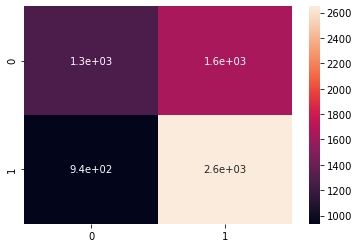

In [397]:
print(sns.heatmap(confusion_matrix(ytest,ypred),annot=True))

###  Decission Tree Hyperparameter Tuning

In [404]:
xtrain,xtest,ytrain,ytest = train_test_split(inp_pca,out,test_size=0.3,random_state=10,stratify= out)

In [405]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth':[2,3,4,5,6,9,7,10,12],'min_samples_split':[6,8,10,13],'min_samples_leaf':[10,8,12,6]}
hyp = GridSearchCV(dt,param_grid=param,scoring='precision')
hyp_mod=hyp.fit(xtrain,ytrain)

In [406]:
hyp_mod.best_params_

{'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 8}

In [407]:
pd.DataFrame(hyp_mod.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.136247      0.003722         0.003785    3.987032e-04   
1         0.135438      0.001160         0.003390    4.883789e-04   
2         0.143801      0.005705         0.003990    6.323347e-04   
3         0.135239      0.001337         0.003590    4.900815e-04   
4         0.134648      0.000016         0.003991    1.913300e-06   
5         0.135820      0.001482         0.003391    4.884220e-04   
6         0.138430      0.006154         0.004014    6.171284e-04   
7         0.134640      0.000631         0.003990    2.132481e-07   
8         0.134241      0.000489         0.003591    4.886750e-04   
9         0.134642      0.000652         0.003388    4.869179e-04   
10        0.136435      0.001287         0.003405    4.956927e-04   
11        0.134843      0.001168         0.003591    4.899216e-04   
12        0.135238      0.001327         0.003792    4.000840e-04   
13        0.135815      0.001461         0.003999    1.740619e-05   
14        0.135440      0.001471         0.003799    4.036338e-04   
15        0.134047      0.000479         0.003782    3.952258e-04   
16        0.195882      0.001838         0.003982    6.309533e-04   
17        0.197070      0.004507         0.003590    4.876698e-04   
18        0.197877      0.002567         0.003392    4.883250e-04   
19        0.196069      0.001933         0.003978    3.183130e-05   
20        0.195078      0.000489         0.003790    3.989220e-04   
21        0.194695      0.001158         0.003788    3.957831e-04   
22        0.195867      0.002029         0.003999    6.097897e-04   
23        0.195275      0.001155         0.003590    4.879765e-04   
24        0.195280      0.002192         0.003787    3.989385e-04   
25        0.194678      0.001486         0.003591    4.882275e-04   
26        0.195066      0.001846         0.003990    6.031566e-07   
27        0.194079      0.000800         0.003990    1.907349e-07   
28        0.194082      0.000495         0.003789    3.984484e-04   
29        0.194674      0.001595         0.003790    3.991127e-04   
30        0.195474      0.001085         0.003789    3.986156e-04   
31        0.194099      0.000495         0.003180    4.075851e-04   
32        0.255122      0.003885         0.003978    2.542513e-05   
33        0.252923      0.001635         0.003591    4.887139e-04   
34        0.252735      0.001487         0.003591    4.888699e-04   
35        0.252114      0.001169         0.003792    3.978076e-04   
36        0.252926      0.000811         0.003589    4.873982e-04   
37        0.252315      0.001768         0.004005    2.354417e-05   
38        0.253910      0.001719         0.003576    5.063526e-04   
39        0.253520      0.003224         0.004189    3.995667e-04   
40        0.253333      0.002076         0.003778    3.934464e-04   
41        0.252725      0.001736         0.003989    1.552469e-06   
42        0.255122      0.001173         0.003791    3.997588e-04   
43        0.251321      0.001255         0.004193    3.970601e-04   
44        0.252321      0.001403         0.003790    3.986359e-04   
45        0.252323      0.001546         0.003790    3.989697e-04   
46        0.254128      0.002261         0.003977    2.404820e-05   
47        0.253121      0.003178         0.003990    1.907349e-07   
48        0.308374      0.000977         0.003989    6.309798e-04   
49        0.310578      0.002505         0.003592    4.902882e-04   
50        0.307189      0.001257         0.003590    4.879950e-04   
51        0.310355      0.002953         0.003989    6.641573e-07   
52        0.309381      0.002325         0.003790    3.986853e-04   
53        0.308175      0.001409         0.003977    2.544077e-05   
54        0.307180      0.001654         0.003792    3.957511e-04   
55        0.306981      0.001684         0.003792    3.998436e-04   
56        0.307775      0.001029         0.003793    4.000165e-04   
57 

In [408]:
dt1 = DecisionTreeClassifier(max_depth= 8,min_samples_leaf= 8, min_samples_split= 8)

In [412]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt1,inp_pca,out,cv=5,scoring='recall')
be=np.mean(1-score)
cve=np.std(score)/np.mean(score)
be,cve

(0.2782496133779124, 0.02200840439305534)

In [413]:
hyp_mod.best_score_

0.6014833972112965

In [414]:
xtrain,xtest,ytrain,ytest = train_test_split(inp_pca,out,test_size=0.3,random_state=10,stratify=out)

In [415]:
dt1.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=8)

In [416]:
ypreddt1 = dt1.predict(xtest)
print(classification_report(ytest,ypreddt1))

              precision    recall  f1-score   support

           0       0.58      0.39      0.47      2926
           1       0.61      0.77      0.68      3584

    accuracy                           0.60      6510
   macro avg       0.59      0.58      0.57      6510
weighted avg       0.59      0.60      0.58      6510



In [ ]:
roc_auc_score()

In [417]:
yprob_dt1=dt1.predict_proba(xtest)
yprob_dt1=yprob[:,1]
yprob_dt1

array([0.54066042, 0.39331815, 0.66854294, ..., 0.66854294, 0.54066042,
       0.66854294])

AxesSubplot(0.125,0.125;0.62x0.755)


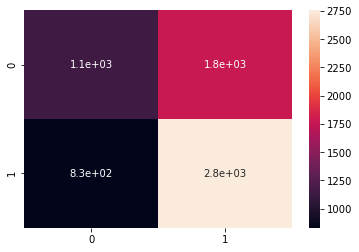

In [418]:
print(sns.heatmap(confusion_matrix(ytest,ypreddt1),annot=True))

In [379]:
yprobdt1=dt1.predict_proba(xtest)
yprobdt1=yprob[:,1]
yprobdt1[:5]

array([0.54066042, 0.39331815, 0.66854294, 0.54066042, 0.38297872])

### Threshold value tuning 

In [419]:
th1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
ypred_th=np.zeros([len(ytest),1])
acc=[]
rec=[]
pre=[]
f1_sc=[]
for i in th1:
    ypred_th=np.zeros([len(ytest),1])
    ypred_th[yprobdt1>i]=1
    acc.append(accuracy_score(ytest,ypred_th))
    rec.append(recall_score(ytest,ypred_th))
    pre.append(precision_score(ytest,ypred_th))
    f1_sc.append(f1_score(ytest,ypred_th))
    

In [420]:
res=pd.DataFrame()
res['Threshold']=th1
res['accuracy']=acc
res['Recall']=rec
res['Precision']=pre
res['f1_score']=f1_sc
res

Threshold  accuracy    Recall  Precision  f1_score
0        0.1  0.550077  0.996652   0.550470  0.709223
1        0.2  0.550230  0.975446   0.551768  0.704839
2        0.3  0.546544  0.948382   0.551249  0.697231
3        0.4  0.526882  0.791574   0.548743  0.648161
4        0.5  0.522888  0.757812   0.548244  0.636215
5        0.6  0.497696  0.458147   0.552862  0.501068
6        0.7  0.449462  0.000000   0.000000  0.000000
7        0.8  0.449462  0.000000   0.000000  0.000000
8        0.9  0.449462  0.000000   0.000000  0.000000

In [382]:
ypred_dt1=np.zeros([len(ytest),1])    

In [421]:
for i in range(len(ypred_dt1)):
    if yprob_dt1[i]>=0.6:
        ypred_dt1[i] = 1
print(classification_report(ytest,ypred_dt1))

              precision    recall  f1-score   support

           0       0.45      0.55      0.49      2926
           1       0.55      0.46      0.50      3584

    accuracy                           0.50      6510
   macro avg       0.50      0.50      0.50      6510
weighted avg       0.51      0.50      0.50      6510



AxesSubplot(0.125,0.125;0.62x0.755)


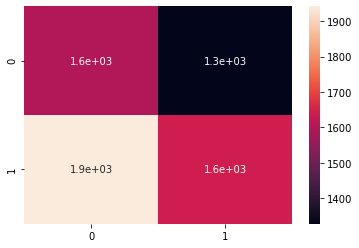

In [422]:
print(sns.heatmap(confusion_matrix(ytest,ypred_dt1),annot=True))

In [305]:
fpr,tpr,th=roc_curve(ytest,yprob_dt1)

In [306]:
youden_table=pd.DataFrame({'Threshold':th,'TPR':tpr,'FPR':fpr})
youden_table['Difference']=youden_table['TPR']-youden_table['FPR']
youden_table.sort_values('Difference',ascending=False)

Threshold       TPR       FPR  Difference
2    0.628788  0.496375  0.302668    0.193707
1    0.668543  0.486893  0.294118    0.192776
5    0.595937  0.569158  0.376881    0.192277
4    0.601266  0.542387  0.350547    0.191840
3    0.605769  0.500279  0.311218    0.189061
6    0.540660  0.701896  0.524966    0.176930
7    0.535088  0.716955  0.546512    0.170443
9    0.443709  0.865588  0.706566    0.159022
8    0.510818  0.832404  0.673393    0.159011
10   0.393318  0.930563  0.822503    0.108060
11   0.382979  0.937535  0.837893    0.099642
12   0.364835  0.969325  0.877223    0.092102
13   0.309859  0.979922  0.906977    0.072945
14   0.299233  0.994423  0.947332    0.047090
15   0.164265  0.999163  0.993844    0.005319
0    1.668543  0.000000  0.000000    0.000000
16   0.097222  1.000000  1.000000    0.000000

In [307]:
ypred_dt1=np.zeros([len(ytest),1])

In [311]:
for i in range(len(ypred_dt1)):
    if yprob_dt1[i]>=0.628788:
        ypred_dt1[i] = 1

In [312]:
print(classification_report(ytest,ypred_dt1))

              precision    recall  f1-score   support

           0       0.53      0.71      0.60      2924
           1       0.67      0.49      0.56      3586

    accuracy                           0.59      6510
   macro avg       0.60      0.60      0.58      6510
weighted avg       0.61      0.59      0.58      6510



AxesSubplot(0.125,0.125;0.62x0.755)


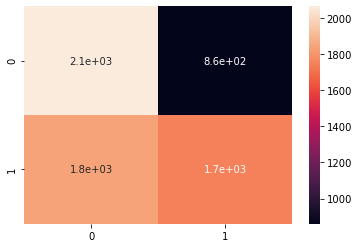

In [313]:
print(sns.heatmap(confusion_matrix(ytest,ypred_dt1),annot=True))

In [44]:
from sklearn.metrics import roc_curve

### logistic reg

In [284]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain2,ytrain2)
ypred_test=lr.predict(xtest2)

In [446]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,cohen_kappa_score
print(classification_report(ytest2,ypred_test))

              precision    recall  f1-score   support

           0       0.59      0.43      0.50      2926
           1       0.62      0.76      0.68      3584

    accuracy                           0.61      6510
   macro avg       0.61      0.59      0.59      6510
weighted avg       0.61      0.61      0.60      6510



AxesSubplot(0.125,0.125;0.62x0.755)


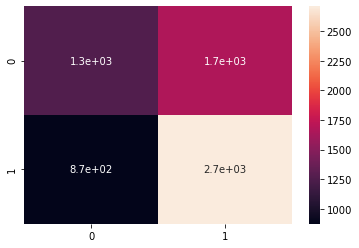

In [447]:
print(sns.heatmap(confusion_matrix(ytest2,ypred_test),annot=True))

In [448]:
cohen_kappa_score(ytest2,ypred_test)

0.19250000855616445

In [449]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,inp_pca,out,cv=5,scoring='precision')
be=np.mean(1-score)
cve=np.std(score)/np.mean(score)
be,cve

(0.4141939891244576, 0.06038430198450517)

### Threshold Value Tuning For Logistic Regression

In [450]:
yprob=lr.predict_proba(xtest)
yprob1=yprob[:,1]
yprob1[:5]

array([0.66179587, 0.26011261, 0.68686272, 0.55980767, 0.62067636])

In [288]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score,roc_auc_score,roc_curve

In [451]:
acc=[]
rec=[]
pre=[]
f1_sc=[]
th1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in th1:
    ypred_th=np.zeros([len(ytest),1])
    ypred_th[yprob1>i]=1
    acc.append(accuracy_score(ytest,ypred_th))
    rec.append(recall_score(ytest,ypred_th))
    pre.append(precision_score(ytest,ypred_th))
    f1_sc.append(f1_score(ytest,ypred_th))

In [452]:
res=pd.DataFrame()
res['Threshold']=th1
res['accuracy']=acc
res['Recall']=rec
res['Precision']=pre
res['f1_score']=f1_sc
res

Threshold  accuracy    Recall  Precision  f1_score
0        0.1  0.550845  1.000000   0.550845  0.710380
1        0.2  0.553610  0.998885   0.552437  0.711420
2        0.3  0.574347  0.983268   0.565336  0.717907
3        0.4  0.604608  0.913832   0.591303  0.718011
4        0.5  0.615668  0.759342   0.624255  0.685204
5        0.6  0.586636  0.470998   0.680226  0.556599
6        0.7  0.507834  0.163413   0.741772  0.267824
7        0.8  0.453917  0.012828   0.754098  0.025226
8        0.9  0.449462  0.000558   1.000000  0.001115

In [454]:
yprob=lr.predict_proba(xtest2)
yprob1=yprob[:,1]
yprob1[:5]

array([0.60449846, 0.45538908, 0.49698349, 0.42835433, 0.27725018])

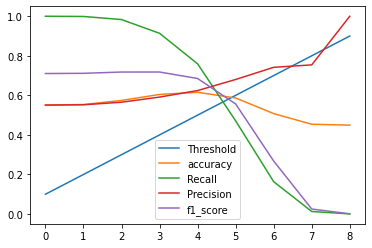

In [453]:
res.plot(kind='line')

In [469]:
ypred_th=np.zeros([len(ytest2),1])
for i in range(len(ypred_th)):
    if yprob1[i]>=0.55:
        ypred_th[i] = 1

In [470]:
print(classification_report(ytest2,ypred_th))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56      2926
           1       0.64      0.63      0.63      3584

    accuracy                           0.60      6510
   macro avg       0.60      0.60      0.60      6510
weighted avg       0.60      0.60      0.60      6510



AxesSubplot(0.125,0.125;0.62x0.755)


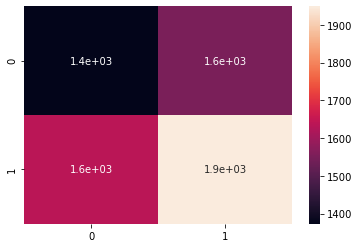

In [471]:
print(sns.heatmap(confusion_matrix(ytest,ypred_th),annot=True))

In [289]:
fpr,tpr,th=roc_curve(ytest,yprob1)

In [290]:
youden_table=pd.DataFrame({'Threshold':th,'TPR':tpr,'FPR':fpr})
youden_table['Difference']=youden_table['TPR']-youden_table['FPR']
youden_table.sort_values('Difference',ascending=False)

Threshold       TPR       FPR  Difference
1487   0.559871  0.621305  0.388851    0.232454
1417   0.569549  0.597881  0.365937    0.231944
1415   0.569640  0.597323  0.365595    0.231728
1411   0.569844  0.596207  0.364569    0.231638
1413   0.569761  0.596765  0.365253    0.231512
...         ...       ...       ...         ...
1      0.948497  0.000279  0.000000    0.000279
3013   0.076583  0.999721  0.999658    0.000063
0      1.948497  0.000000  0.000000    0.000000
3015   0.044152  1.000000  1.000000    0.000000
3      0.935354  0.000558  0.000684   -0.000126

[3016 rows x 4 columns]

In [296]:
for i in range(len(ypred_th)):
    if yprob1[i]>=0.559871:
        ypred_th[i] = 1

In [297]:
print(classification_report(ytest,ypred_th))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59      2924
           1       0.66      0.61      0.63      3586

    accuracy                           0.61      6510
   macro avg       0.61      0.61      0.61      6510
weighted avg       0.62      0.61      0.61      6510



AxesSubplot(0.125,0.125;0.62x0.755)


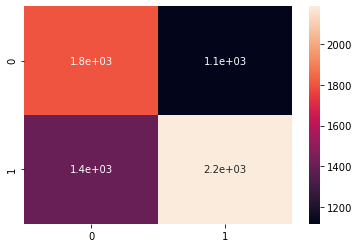

In [298]:
print(sns.heatmap(confusion_matrix(ytest,ypred_th),annot=True))

### random forest

In [331]:
from sklearn.ensemble import RandomForestClassifier

In [337]:
inp4 = df4.drop(['Class','price var'],1)

In [338]:
out = df4['Class']

In [474]:
xtrain,xtest,ytrain,ytest = train_test_split(inp_pca,out,test_size=0.3,random_state=10,stratify=out)

In [475]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)

In [476]:
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       0.59      0.47      0.53      2926
           1       0.63      0.73      0.68      3584

    accuracy                           0.62      6510
   macro avg       0.61      0.60      0.60      6510
weighted avg       0.61      0.62      0.61      6510



In [343]:
score=cross_val_score(rf,inp4,out,cv=5,scoring='f1')
be=np.mean(1-score)
cve=np.std(score)/np.mean(score)
be,cve

(0.3564195659805881, 0.04181997223981676)

### Hyper Parameter  Tuning for Random Forest Model

In [484]:
param={'n_estimators':[3,5,7,9,11,13,15],
       'max_features':['sqrt','log2','auto'],
      'max_depth':[3,4,6,8,9,10],'min_samples_split':[10,8,6,12,14,16],'min_samples_leaf':[5,7,9,11,13,16]}

In [487]:
rf=RandomForestClassifier()
hyp=GridSearchCV(rf,param_grid=param,cv=5,scoring='precision')

In [488]:
hyp_mod=hyp.fit(xtrain,ytrain)

In [489]:
hyp_mod.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 11,
 'min_samples_split': 8,
 'n_estimators': 15}

In [490]:
hyp_mod.best_score_

0.6145216353156875

In [348]:
pd.DataFrame(hyp_mod.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.098756      0.004142         0.009966        0.000634   
1          0.145071      0.004419         0.010767        0.000398   
2          0.187965      0.001337         0.010966        0.000001   
3          0.230850      0.002886         0.011365        0.000489   
4          0.280966      0.004186         0.011965        0.000002   
...             ...           ...              ...             ...   
4531       0.468849      0.005973         0.012565        0.000491   
4532       0.592168      0.002650         0.013961        0.000004   
4533       0.720062      0.007938         0.014557        0.000801   
4534       0.843531      0.005500         0.015557        0.000490   
4535       0.972047      0.004747         0.016355        0.000487   

     param_max_depth param_max_features param_min_samples_leaf  \
0                  3               sqrt                      5   
1                  3               sqrt                      5   
2                  3               sqrt                      5   
3                  3               sqrt                      5   
4                  3               sqrt                      5   
...              ...                ...                    ...   
4531              10               auto                     16   
4532              10               auto                     16   
4533              10               auto                     16   
4534              10               auto                     16   
4535              10               auto                     16   

     param_min_samples_split param_n_estimators  \
0                         10                  3   
1                         10                  5   
2                         10                  7   
3                         10                  9   
4                         10                 11   
...                      ...                ...   
4531                      16                  7   
4532                      16                  9   
4533                      16                 11   
4534                      16                 13   
4535                      16                 15   

                                                 params  split0_test_score  \
0     {'max_depth': 3, 'max_features': 'sqrt', 'min_...           0.836124   
1     {'max_depth': 3, 'max_features': 'sqrt', 'min_...           0.793062   
2     {'max_depth': 3, 'max_features': 'sqrt', 'min_...           0.830144   
3     {'max_depth': 3, 'max_features': 'sqrt', 'min_...           0.819378   
4     {'max_depth': 3, 'max_features': 'sqrt', 'min_...           0.845096   
...                                                 ...                ...   
4531  {'max_depth': 10, 'max_features': 'auto', 'min...           0.759569   
4532  {'max_depth': 10, 'max_features': 'auto', 'min...           0.763158   
4533  {'max_depth': 10, 'max_features': 'auto', 'min...           0.763158   
4534  {'max_depth': 10, 'max_features': 'auto', 'min...           0.760167   
4535  {'max_depth': 10, 'max_features': 'auto', 'min...           0.781699   

      split1_test_score  split2_test_score  split3_test_score  \
0              0.802632           0.828349           0.829545   
1              0.833732           0.832536           0.825359   
2              0.825359           0.832536           0.837321   
3              0.827153           0.830144           0.834928   
4              0.824163           0.837321           0.855263   
...                 ...                ...                ...   
4531           0.720694           0.748206           0.750598   
4532           0.749402           0.772129           0.765550   
4533           0.758373           0.781699           0.764952   
4534           0.754187           0.779904           0.785287   
4535           0.763756           0.789474           0.761962   

      split4_test_score  mean_test_score 

In [497]:
rf1=RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=11,min_samples_split=8)

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(inp_pca,out,test_size=0.3,random_state=10,stratify=out)

In [499]:
 rf1.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=11,
                       min_samples_split=8)

In [500]:
ypred_rf2 = rf1.predict(xtest)

In [501]:
print(classification_report(ytest2,ypred_rf2))

              precision    recall  f1-score   support

           0       0.63      0.36      0.46      2926
           1       0.61      0.83      0.71      3584

    accuracy                           0.62      6510
   macro avg       0.62      0.60      0.58      6510
weighted avg       0.62      0.62      0.60      6510



AxesSubplot(0.125,0.125;0.62x0.755)


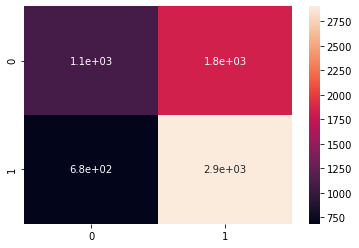

In [496]:
print(sns.heatmap(confusion_matrix(ytest2,ypred_rf2),annot=True))

In [503]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)

In [504]:
be=[]
ve=[]
for i in [5,10,20,40,60,80,100,120,150,200,250,300,400]:
    #for j in [10,15,20,30]:
    rf=RandomForestClassifier(n_estimators=i,random_state=48)
    score=cross_val_score(rf,inp_pca,out,cv=kf,scoring='precision')
    print('n_estimator:',i)
    print('Bias Error',1-np.mean(score))
    print('Variance Error',np.std(score)/np.mean(score))
    be.append(1-np.mean(score))
    ve.append(np.std(score)/np.mean(score))

n_estimator: 5
Bias Error 0.3940290698888935
Variance Error 0.010766921741108531
n_estimator: 10
Bias Error 0.37112477888154527
Variance Error 0.015982565411103534
n_estimator: 20
Bias Error 0.3701583135219101
Variance Error 0.012638800821287295
n_estimator: 40
Bias Error 0.37051584850041475
Variance Error 0.01545080819986793
n_estimator: 60
Bias Error 0.36447542626019713
Variance Error 0.015476529185674033
n_estimator: 80
Bias Error 0.3654693885767567
Variance Error 0.014676472409910312
n_estimator: 100
Bias Error 0.3666032645966515
Variance Error 0.011130234161044467
n_estimator: 120
Bias Error 0.3662208323522491
Variance Error 0.010314105138281083
n_estimator: 150
Bias Error 0.3664354978026463
Variance Error 0.01130346690479564
n_estimator: 200
Bias Error 0.36686991977759964
Variance Error 0.009620481058769736
n_estimator: 250
Bias Error 0.36694663308718645
Variance Error 0.010278971378418605
n_estimator: 300
Bias Error 0.3650845851873298
Variance Error 0.011836223539960816
n_estima

### SMOTE

In [16]:
!pip3 install imblearn

In [17]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss

In [18]:
pipe=make_pipeline(SMOTE(sampling_strategy={1:119190}),
                         SMOTE(sampling_strategy={0:97790}))

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inp_pca,out,test_size=0.3,random_state=10,stratify=out)

In [30]:
# The Output will be in array
x_bal, y_bal = pipe.fit_resample(inp_pca, out)

C:\Users\suman\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (119190) in class 1 will be larger than the number of samples in the majority class (class #1 -> 11946)
  warnings.warn(


In [31]:
x_bal_df=pd.DataFrame(x_bal,columns=inp_pca.columns)
# y can be array

### DecisionTreeClassifier with SMOTE data

In [81]:
df_pca = pd.read_excel('df_pca.xlsx')

In [4]:
out_bal = bal_df['out']

In [5]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt=DecisionTreeClassifier()
dt.fit(x_bal_df,y_bal)

DecisionTreeClassifier()

In [9]:
from sklearn.metrics import  roc_auc_score, precision_score,classification_report,confusion_matrix

In [12]:
y_pred = dt.predict(xtest)

In [13]:
roc_auc_score(y_test,y_pred)

0.9572701213762034

In [14]:
precision_score(ytest,y_pred)

0.9628214135169313

In [15]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     29388
           1       0.96      0.96      0.96     35706

    accuracy                           0.96     65094
   macro avg       0.96      0.96      0.96     65094
weighted avg       0.96      0.96      0.96     65094



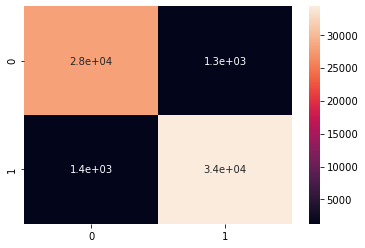

In [28]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

### Hyper parameter Tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [30]:
param = {'max_depth':[2,3,4,5,6,9,7,10,12],'min_samples_split':[6,8,10,13],'min_samples_leaf':[10,8,12,6]}

In [31]:
clf2 = GridSearchCV(dt,param,scoring='roc_auc')

In [33]:
clf2_mod = clf2.fit(x_bal_df,y_bal)

In [34]:
clf2_mod.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 6}

In [16]:
dt_2 = DecisionTreeClassifier(max_depth=7,min_samples_leaf=10,min_samples_split=6)

In [17]:
dt_2.fit(x_bal_df,y_bal)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=6)

In [18]:
ypred_dt2 = dt_2.predict(xtest)

In [21]:
print(classification_report(ytest,ypred_dt2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     29388
           1       0.97      0.98      0.97     35706

    accuracy                           0.97     65094
   macro avg       0.97      0.97      0.97     65094
weighted avg       0.97      0.97      0.97     65094



In [19]:
roc_auc_score(ytest,ypred_dt2)

0.9677544063232061

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt_2,inp_bal,out_bal,cv=5,scoring='roc_auc')
be=np.mean(1-score)
cve=np.std(score)/np.mean(score)
print('Bias error: ',be)
print('variance error',cve)

Bias error:  0.1250025564986195
variance error 0.18070672822303685


### Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf2=RandomForestClassifier()
rf2.fit(x_bal_df,y_bal)
ypred_rf2=rf2.predict(xtest)

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,ypred_rf2)

0.999829118250171

In [28]:
precision_score(y_test,ypred_rf2)

0.9568751350183625

In [30]:
print(classification_report(y_test,ypred_rf2))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29388
           1       0.96      0.99      0.97     35706

    accuracy                           0.97     65094
   macro avg       0.97      0.97      0.97     65094
weighted avg       0.97      0.97      0.97     65094



In [39]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf2,inp_bal,out_bal,cv=5,scoring='roc_auc')
be=np.mean(1-score)
cve=np.std(score)/np.mean(score)
print('Bias error: ',be)
print('variance error',cve)

Bias error:  0.014245454419334802
variance error 0.01770041448658197


In [43]:
print(confusion_matrix(y_test,ypred_rf2))

[[27791  1597]
 [  271 35435]]


In [45]:
yprob = rf2.predict_proba(x_test)
yprob1=yprob[:,1]

In [47]:
fpr,tpr,th=roc_curve(y_test,yprob1)

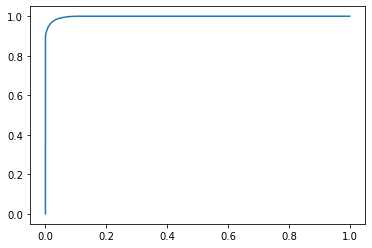

In [48]:
plt.plot(fpr,tpr)

In [45]:
feat=pd.DataFrame({'feature':xtest.columns,
                   'feat_imp':rf2.feature_importances_})
feat.sort_values('feat_imp',ascending=False)


feature  feat_imp
0         0  0.023972
1         1  0.015857
2         2  0.015222
3         3  0.014707
5         5  0.014192
9         9  0.013875
7         7  0.012894
4         4  0.012659
6         6  0.012592
12       12  0.012296
8         8  0.011771
11       11  0.011258
15       15  0.011192
21       21  0.011154
14       14  0.011085
16       16  0.011025
18       18  0.011025
41       41  0.010983
10       10  0.010949
17       17  0.010892
13       13  0.010782
19       19  0.010678
29       29  0.010638
28       28  0.010577
33       33  0.010553
22       22  0.010544
23       23  0.010506
48       48  0.010468
55       55  0.010451
39       39  0.010339
20       20  0.010331
43       43  0.010313
24       24  0.010291
44       44  0.010237
30       30  0.010216
25       25  0.010212
45       45  0.010184
31       31  0.010122
38       38  0.010106
32       32  0.010057
27       27  0.010031
35       35  0.010005
26       26  0.009965
42       42  0.009963
47       47  0.009856
49       49  0.009731
60       60  0.009672
34       34  0.009609
66       66  0.009595
40       40  0.009501
73       73  0.009458
63       63  0.009445
67       67  0.009423
57       57  0.009391
36       36  0.009371
37       37  0.009364
72       72  0.009353
50       50  0.009340
51       51  0.009338
61       61  0.009294
58       58  0.009271
46       46  0.009245
96       96  0.009243
52       52  0.009237
68       68  0.009214
82       82  0.009208
84       84  0.009166
56       56  0.009162
64       64  0.009160
91       91  0.009155
81       81  0.009152
80       80  0.009146
62       62  0.009145
59       59  0.009143
74       74  0.009126
95       95  0.009095
69       69  0.009095
54       54  0.009067
70       70  0.009006
88       88  0.009001
76       76  0.008977
53       53  0.008960
92       92  0.008942
75       75  0.008931
78       78  0.008905
71       71  0.008900
89       89  0.008887
79       79  0.008824
93       93  0.008800
85       85  0.008754
97       97  0.008713
77       77  0.008687
94       94  0.008683
83       83  0.008680
90       90  0.008624
65       65  0.008614
87       87  0.008588
86       86  0.008585